In [177]:
import pandas as pd
import warnings
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

df=pd.concat([train,test],sort=False)

# NullCheck

In [63]:
df.isnull().sum()

id                   0
position             0
age                  0
area                 0
sex                  0
partner              0
num_child            0
education            0
service_length       0
study_time           0
commute              0
overtime             0
salary            9000
dtype: int64

# MissCheck

In [64]:
for i in df.columns:
    print(i)
    print(df[i].unique())


id
[    0     1     2 ... 20997 20998 20999]
position
[1 2 0 3 4]
age
[44 31 36 22 25 23 32 21 43 46 27 50 24 35 26 33 39 48 29 41 55 40 20 53
 34 42 52 45 56 49 47 28 54 30 37 18 51 38 19 57 59 63 58 61 62 65 60 66
 67 64]
area
['愛知県' '奈良県' '山口県' '東京都' '鹿児島県' '兵庫県' '神奈川県' '宮城県' '茨城県' '岩手県' '鳥取県' '岡山県'
 '愛媛県' '新潟県' '島根県' '和歌山県' '高知県' '石川県' '熊本県' '埼玉県' '佐賀県' '香川県' '宮崎県' '福島県'
 '大阪府' '大分県' '岐阜県' '長崎県' '広島県' '北海道' '富山県' '山形県' '徳島県' '青森県' '千葉県' '滋賀県'
 '沖縄県' '三重県' '長野県' '京都府' '栃木県' '福井県' '山梨県' '秋田県' '静岡県' '群馬県' '福岡県']
sex
[2 1]
partner
[1 0]
num_child
[2 0 3 4 1 5 6 7 8 9]
education
[1 0 2 4 3]
service_length
[24 13 14  4  5  3 25  9 30  6 17  0 11 19 28  8 21  2 37 32 18  7  1 35
 20 16 33 26 27 10 22 36 29 34 12 31 15 23 43 39 40 38 41 45 44 42 47 49]
study_time
[ 2.  9.  4.  3.  5. 11.  7.  0.  6. 10.  1.  8. 20. 12. 17. 13. 18. 14.
 15. 16. 19. 21. 24.]
commute
[1.6 0.7 0.4 0.2 1.3 1.7 0.1 0.5 1.4 0.9 0.3 2.1 1.8 1.5 0.6 1.2 0.8 1.1
 1.9 2.2 4.3 2.3 1.  3.6 2.  2.5 2.4 2.9 3.3 4.2 4.  2

# Data visualization

## position ++

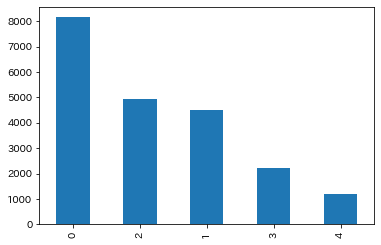

In [65]:
df.position=df.position+1
train['position'].value_counts().plot.bar()

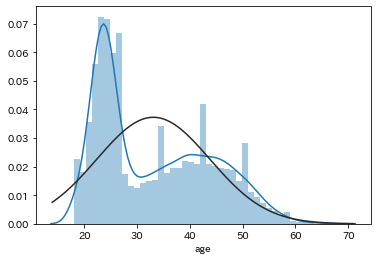

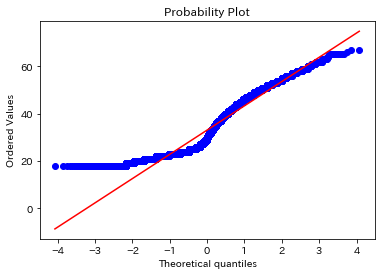

In [66]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df["age"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df["age"], plot=plt)

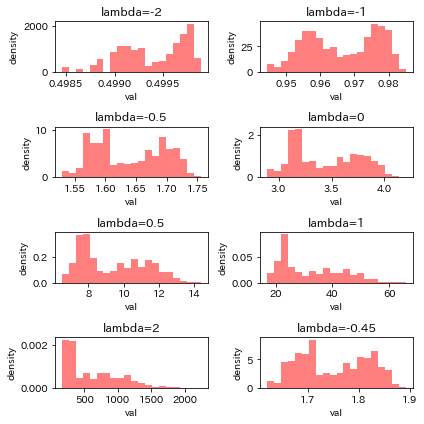

In [67]:

from scipy import stats

fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.age, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.age)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

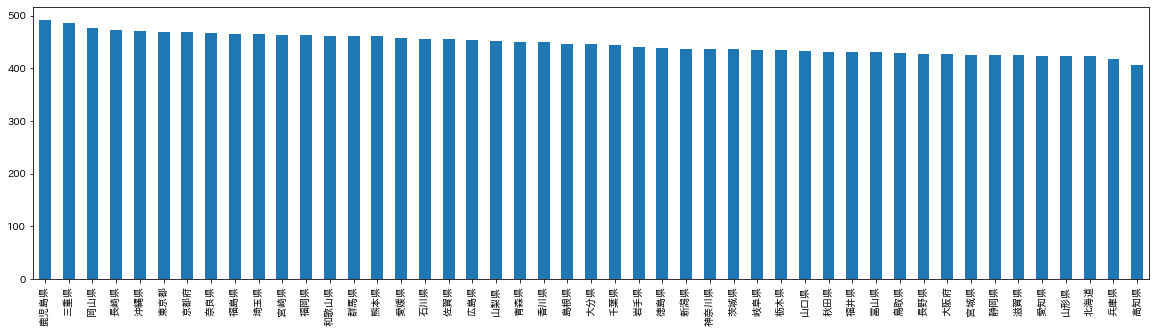

In [68]:
train['area'].value_counts().plot.bar(figsize=(20, 5))


## SEX--

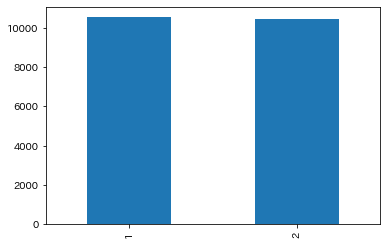

In [69]:
df.sex=df.sex-1
train['sex'].value_counts().plot.bar()

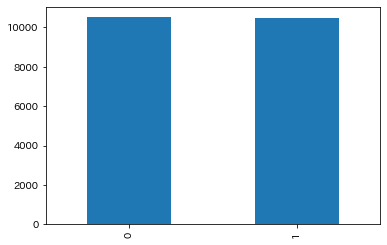

In [70]:
train['partner'].value_counts().plot.bar()

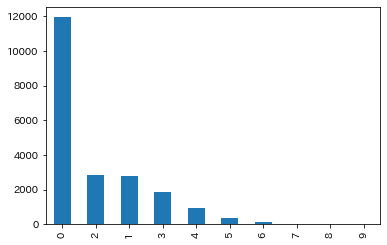

In [71]:
train['num_child'].value_counts().plot.bar()

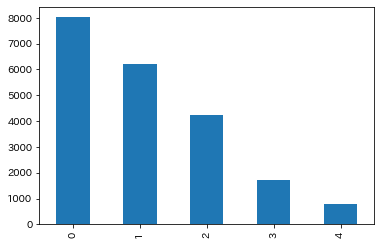

In [72]:
train['education'].value_counts().plot.bar()

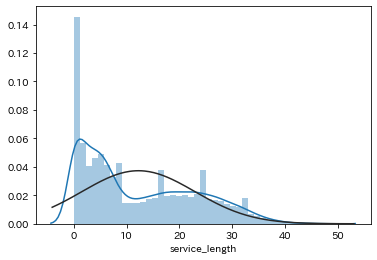

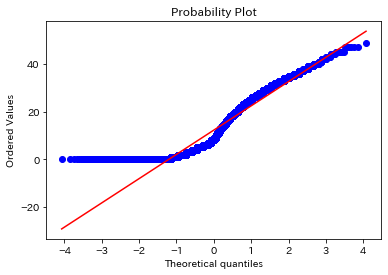

In [73]:
sns.distplot(df['service_length'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['service_length'], plot=plt)

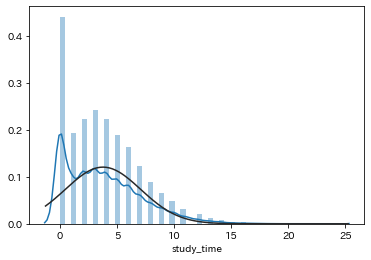

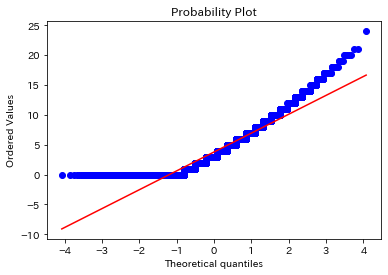

In [74]:


sns.distplot(df['study_time'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['study_time'], plot=plt)

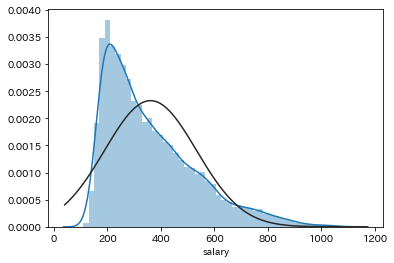

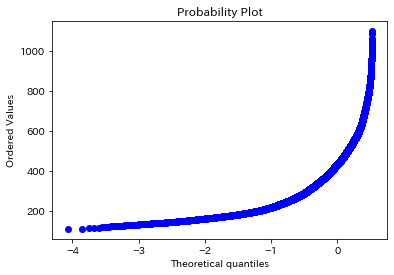

In [75]:
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

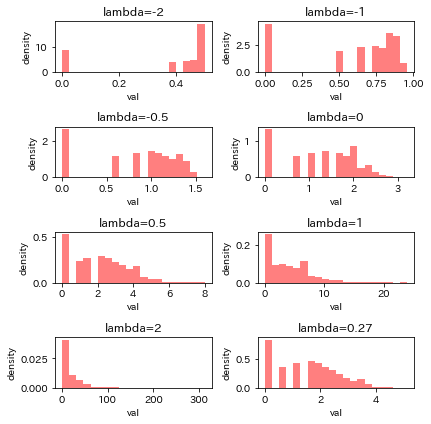

In [76]:
fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.study_time+1, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.study_time+1)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

## log Salary

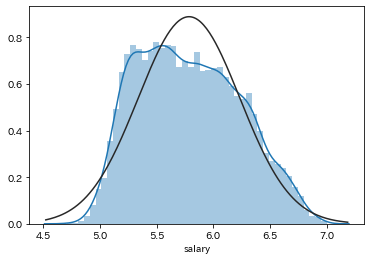

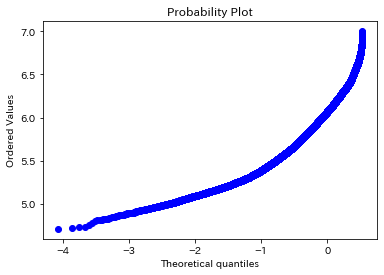

In [77]:
df.salary=np.log(df.salary)
#transformed histogram and normal probability plot
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

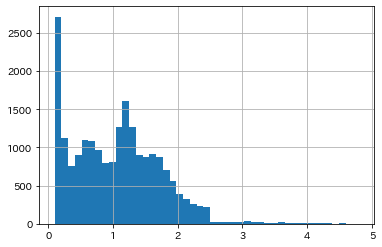

In [78]:
train['commute'].hist(bins=45)

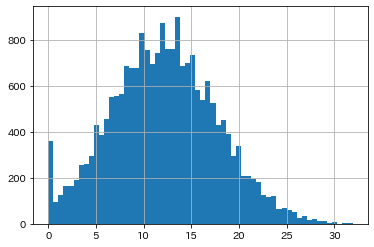

In [79]:
train['overtime'].hist(bins=60)

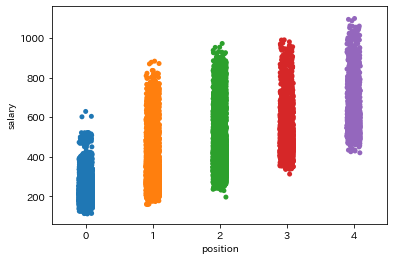

In [80]:
sns.stripplot(x="position",y="salary",data=train)#正の相関あり?

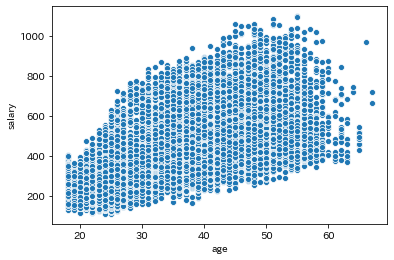

In [81]:
sns.scatterplot(x="age",y="salary",data=train)#正の相関

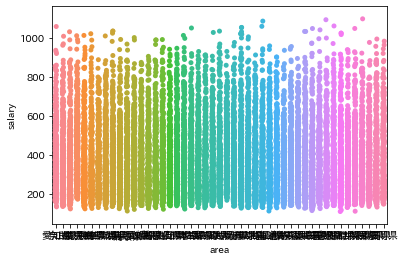

In [82]:
sns.stripplot(x="area",y="salary",data=train)#やや地域差はある

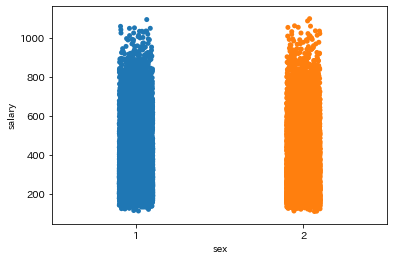

In [83]:
sns.stripplot(x="sex",y="salary",data=train)#そんなに性差はなさそう

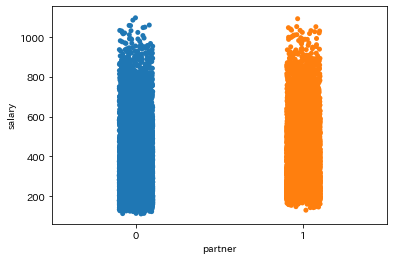

In [84]:
sns.stripplot(x="partner",y="salary",data=train)#正の相関

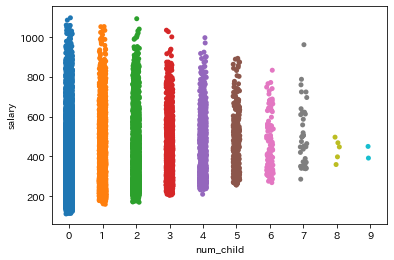

In [85]:
sns.stripplot(x="num_child",y="salary",data=train)#子が多くなるにつれて給与の幅が縮まりそう

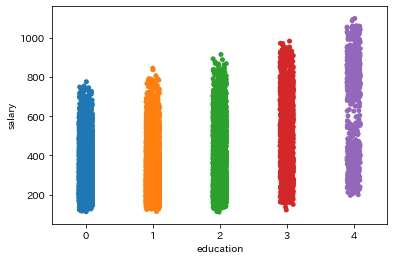

In [86]:
sns.stripplot(x="education",y="salary",data=train)#正の相関

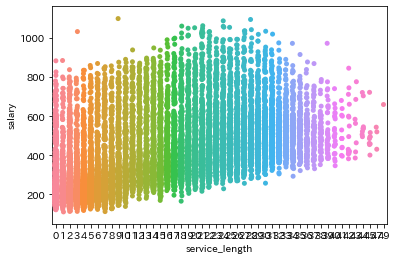

In [87]:
sns.stripplot(x="service_length",y="salary",data=train)#正の相関

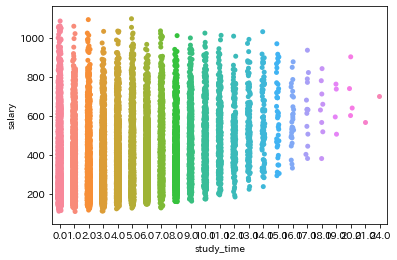

In [88]:
sns.stripplot(x="study_time",y="salary",data=train)#正の相関

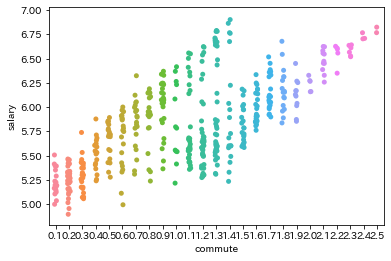

In [150]:
sns.stripplot(x="commute",y="salary",data=df)#意味不明

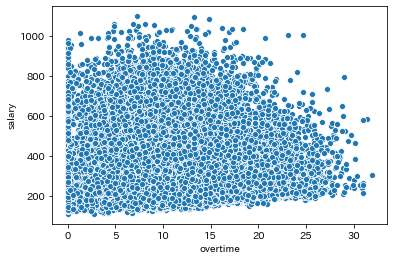

In [90]:
sns.scatterplot(x="overtime",y="salary",data=train)#正の相関

In [185]:
arealist=list(train.groupby("area").mean().salary.sort_values().index)
areadic={}
for i,area in enumerate(arealist):
    areadic[area]=i+1
df.area=df.area.map(areadic)

In [92]:
df["agexposition"]=df.age*df.position

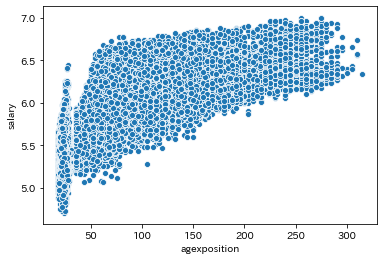

In [93]:
sns.scatterplot(x="agexposition",y="salary",data=df)

In [94]:
df["familiy_num"]=1+df.partner+df.num_child

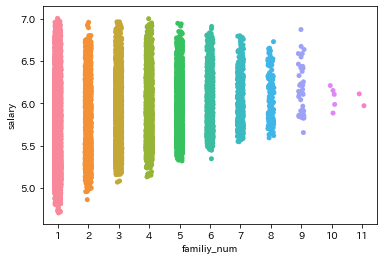

In [95]:
sns.stripplot(x="familiy_num",y="salary",data=df)

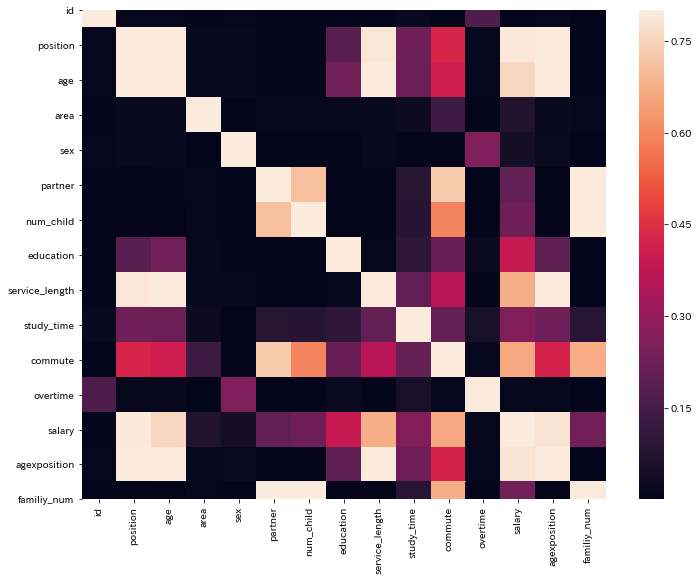

In [161]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(abs(corrmat), vmax=.8, square=True);

## LeakCheck

In [97]:


df[df.drop(["id","salary"],axis=1).duplicated(keep=False)]#リークは一つだけ

,id,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary,agexposition,familiy_num
20627,20627,1,22,6,1,0,0,0,4,0.0,0.1,0.0,4.989063,22,1
245,245,1,23,14,0,0,0,2,0,0.0,0.1,0.0,NaN,23,1
514,514,1,23,13,1,0,0,2,0,0.0,0.2,0.0,NaN,23,1
988,988,1,22,11,0,0,0,0,4,0.0,0.2,0.0,NaN,22,1
1592,1592,1,22,11,0,0,0,0,4,0.0,0.2,0.0,NaN,22,1
3162,3162,1,23,21,0,0,0,0,5,0.0,0.2,0.0,NaN,23,1
4649,4649,1,23,13,1,0,0,2,0,0.0,0.2,0.0,NaN,23,1
5562,5562,1,23,21,0,0,0,0,5,0.0,0.2,0.0,NaN,23,1
6981,6981,1,23,14,0,0,0,2,0,0.0,0.1,0.0,NaN,23,1
7270,7270,1,22,6,1,0,0,0,4,0.0,0.1,0.0,NaN,22,1


# Learning

In [165]:
from sklearn.model_selection import train_test_split, GridSearchCV

train=df.dropna().drop(["id","partner","num_child"],axis=1)
test=df[df.salary.isnull()].drop("id",axis=1)
test= test.drop(["salary",],axis=1)
X = train.drop(["salary"],axis=1)

#　目的変数に家賃単価を代入する
y = train.salary
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

# Liner

In [166]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(valid_X)
model.score(valid_X,valid_y)

0.8242643340521438

# Randomforest+Feature Importances

In [167]:
from sklearn.ensemble import RandomForestRegressor as RFR
import numpy as np
from sklearn.metrics import mean_absolute_error

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(valid_X,valid_y))
from sklearn.metrics import mean_squared_error
score=mean_absolute_error(np.exp(valid_y),np.exp(rg.predict(valid_X)))
print(f'MAE:{score:4f}')
fti = rg.feature_importances_

print('Feature Importances:')
for i,feat in enumerate(valid_X.columns):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))
col_names = test.columns.values
col_names_ = col_names[np.argsort(rg.feature_importances_)[::-1]]
col_names_

0.9538206230679571
MAE:23.990397
Feature Importances:
	position   : 0.006111
	age        : 0.003883
	area       : 0.014562
	sex        : 0.001068
	education  : 0.045481
	service_length : 0.004214
	study_time : 0.004510
	commute    : 0.209305
	overtime   : 0.025054
	agexposition : 0.636526
	familiy_num : 0.049286


array(['commute', 'service_length', 'overtime', 'partner', 'study_time',
       'area', 'position', 'education', 'num_child', 'age', 'sex'],
      dtype=object)

# ModelSelection

 73%|███████▎  | 8/11 [00:50<00:11,  3.96s/it]

[12:16:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

 91%|█████████ | 10/11 [02:34<00:23, 23.98s/it]

0:	learn: 0.4383419	total: 21.1ms	remaining: 21.1s
1:	learn: 0.4277833	total: 53.3ms	remaining: 26.6s
2:	learn: 0.4175749	total: 71.8ms	remaining: 23.9s
3:	learn: 0.4076067	total: 86.5ms	remaining: 21.5s
4:	learn: 0.3981115	total: 101ms	remaining: 20s
5:	learn: 0.3889254	total: 112ms	remaining: 18.5s
6:	learn: 0.3798844	total: 122ms	remaining: 17.3s
7:	learn: 0.3712427	total: 153ms	remaining: 18.9s
8:	learn: 0.3626966	total: 164ms	remaining: 18.1s
9:	learn: 0.3549242	total: 173ms	remaining: 17.1s
10:	learn: 0.3468588	total: 182ms	remaining: 16.4s
11:	learn: 0.3392148	total: 201ms	remaining: 16.5s
12:	learn: 0.3319431	total: 214ms	remaining: 16.2s
13:	learn: 0.3245638	total: 224ms	remaining: 15.8s
14:	learn: 0.3175319	total: 233ms	remaining: 15.3s
15:	learn: 0.3111117	total: 242ms	remaining: 14.9s
16:	learn: 0.3044195	total: 250ms	remaining: 14.4s
17:	learn: 0.2984325	total: 258ms	remaining: 14.1s
18:	learn: 0.2921378	total: 266ms	remaining: 13.7s
19:	learn: 0.2862222	total: 276ms	remai

161:	learn: 0.1145776	total: 2.29s	remaining: 11.9s
162:	learn: 0.1144376	total: 2.3s	remaining: 11.8s
163:	learn: 0.1142423	total: 2.31s	remaining: 11.8s
164:	learn: 0.1139822	total: 2.32s	remaining: 11.8s
165:	learn: 0.1138898	total: 2.33s	remaining: 11.7s
166:	learn: 0.1137937	total: 2.35s	remaining: 11.7s
167:	learn: 0.1136901	total: 2.36s	remaining: 11.7s
168:	learn: 0.1135030	total: 2.36s	remaining: 11.6s
169:	learn: 0.1133045	total: 2.38s	remaining: 11.6s
170:	learn: 0.1132152	total: 2.39s	remaining: 11.6s
171:	learn: 0.1131067	total: 2.4s	remaining: 11.6s
172:	learn: 0.1130184	total: 2.41s	remaining: 11.5s
173:	learn: 0.1128391	total: 2.42s	remaining: 11.5s
174:	learn: 0.1127541	total: 2.43s	remaining: 11.5s
175:	learn: 0.1126269	total: 2.44s	remaining: 11.4s
176:	learn: 0.1124508	total: 2.45s	remaining: 11.4s
177:	learn: 0.1123869	total: 2.46s	remaining: 11.4s
178:	learn: 0.1122659	total: 2.48s	remaining: 11.4s
179:	learn: 0.1119963	total: 2.49s	remaining: 11.3s
180:	learn: 0.

320:	learn: 0.1007361	total: 4.2s	remaining: 8.89s
321:	learn: 0.1006725	total: 4.22s	remaining: 8.88s
322:	learn: 0.1006020	total: 4.23s	remaining: 8.86s
323:	learn: 0.1005597	total: 4.24s	remaining: 8.85s
324:	learn: 0.1005145	total: 4.25s	remaining: 8.83s
325:	learn: 0.1003900	total: 4.26s	remaining: 8.82s
326:	learn: 0.1003437	total: 4.28s	remaining: 8.8s
327:	learn: 0.1002951	total: 4.29s	remaining: 8.79s
328:	learn: 0.1002578	total: 4.3s	remaining: 8.77s
329:	learn: 0.1001993	total: 4.31s	remaining: 8.75s
330:	learn: 0.1001658	total: 4.32s	remaining: 8.74s
331:	learn: 0.1001241	total: 4.33s	remaining: 8.72s
332:	learn: 0.1000837	total: 4.35s	remaining: 8.71s
333:	learn: 0.1000427	total: 4.36s	remaining: 8.69s
334:	learn: 0.0999627	total: 4.37s	remaining: 8.67s
335:	learn: 0.0998891	total: 4.38s	remaining: 8.66s
336:	learn: 0.0998173	total: 4.39s	remaining: 8.64s
337:	learn: 0.0997961	total: 4.4s	remaining: 8.62s
338:	learn: 0.0997523	total: 4.41s	remaining: 8.61s
339:	learn: 0.09

479:	learn: 0.0940924	total: 6.46s	remaining: 7s
480:	learn: 0.0940261	total: 6.47s	remaining: 6.98s
481:	learn: 0.0940063	total: 6.48s	remaining: 6.97s
482:	learn: 0.0939904	total: 6.5s	remaining: 6.96s
483:	learn: 0.0939706	total: 6.51s	remaining: 6.95s
484:	learn: 0.0939555	total: 6.53s	remaining: 6.93s
485:	learn: 0.0939273	total: 6.54s	remaining: 6.92s
486:	learn: 0.0938567	total: 6.56s	remaining: 6.91s
487:	learn: 0.0938345	total: 6.57s	remaining: 6.89s
488:	learn: 0.0938162	total: 6.58s	remaining: 6.88s
489:	learn: 0.0937791	total: 6.59s	remaining: 6.86s
490:	learn: 0.0937477	total: 6.6s	remaining: 6.84s
491:	learn: 0.0937266	total: 6.62s	remaining: 6.83s
492:	learn: 0.0937185	total: 6.63s	remaining: 6.82s
493:	learn: 0.0936830	total: 6.64s	remaining: 6.8s
494:	learn: 0.0936167	total: 6.66s	remaining: 6.79s
495:	learn: 0.0935878	total: 6.68s	remaining: 6.78s
496:	learn: 0.0935633	total: 6.69s	remaining: 6.77s
497:	learn: 0.0935401	total: 6.7s	remaining: 6.75s
498:	learn: 0.09352

638:	learn: 0.0902103	total: 8.47s	remaining: 4.78s
639:	learn: 0.0901785	total: 8.48s	remaining: 4.77s
640:	learn: 0.0901620	total: 8.49s	remaining: 4.76s
641:	learn: 0.0901540	total: 8.51s	remaining: 4.75s
642:	learn: 0.0901397	total: 8.52s	remaining: 4.73s
643:	learn: 0.0901252	total: 8.54s	remaining: 4.72s
644:	learn: 0.0900960	total: 8.55s	remaining: 4.7s
645:	learn: 0.0900756	total: 8.56s	remaining: 4.69s
646:	learn: 0.0900465	total: 8.57s	remaining: 4.68s
647:	learn: 0.0900253	total: 8.58s	remaining: 4.66s
648:	learn: 0.0900030	total: 8.59s	remaining: 4.65s
649:	learn: 0.0899902	total: 8.6s	remaining: 4.63s
650:	learn: 0.0899802	total: 8.62s	remaining: 4.62s
651:	learn: 0.0899598	total: 8.63s	remaining: 4.6s
652:	learn: 0.0899503	total: 8.64s	remaining: 4.59s
653:	learn: 0.0899168	total: 8.65s	remaining: 4.58s
654:	learn: 0.0898943	total: 8.66s	remaining: 4.56s
655:	learn: 0.0898795	total: 8.67s	remaining: 4.55s
656:	learn: 0.0898601	total: 8.69s	remaining: 4.54s
657:	learn: 0.0

797:	learn: 0.0876581	total: 10.5s	remaining: 2.66s
798:	learn: 0.0876534	total: 10.5s	remaining: 2.65s
799:	learn: 0.0876462	total: 10.5s	remaining: 2.63s
800:	learn: 0.0876325	total: 10.5s	remaining: 2.62s
801:	learn: 0.0876005	total: 10.6s	remaining: 2.61s
802:	learn: 0.0875805	total: 10.6s	remaining: 2.59s
803:	learn: 0.0875671	total: 10.6s	remaining: 2.58s
804:	learn: 0.0875458	total: 10.6s	remaining: 2.57s
805:	learn: 0.0875386	total: 10.6s	remaining: 2.55s
806:	learn: 0.0875265	total: 10.6s	remaining: 2.54s
807:	learn: 0.0875114	total: 10.6s	remaining: 2.52s
808:	learn: 0.0875052	total: 10.6s	remaining: 2.51s
809:	learn: 0.0874833	total: 10.7s	remaining: 2.5s
810:	learn: 0.0874575	total: 10.7s	remaining: 2.49s
811:	learn: 0.0874377	total: 10.7s	remaining: 2.47s
812:	learn: 0.0874256	total: 10.7s	remaining: 2.46s
813:	learn: 0.0874170	total: 10.7s	remaining: 2.45s
814:	learn: 0.0874011	total: 10.7s	remaining: 2.43s
815:	learn: 0.0873898	total: 10.7s	remaining: 2.42s
816:	learn: 0

956:	learn: 0.0857023	total: 12.4s	remaining: 559ms
957:	learn: 0.0856909	total: 12.5s	remaining: 546ms
958:	learn: 0.0856822	total: 12.5s	remaining: 534ms
959:	learn: 0.0856668	total: 12.5s	remaining: 521ms
960:	learn: 0.0856607	total: 12.5s	remaining: 508ms
961:	learn: 0.0856519	total: 12.5s	remaining: 495ms
962:	learn: 0.0856479	total: 12.5s	remaining: 482ms
963:	learn: 0.0856253	total: 12.5s	remaining: 469ms
964:	learn: 0.0856179	total: 12.6s	remaining: 456ms
965:	learn: 0.0856126	total: 12.6s	remaining: 443ms
966:	learn: 0.0855996	total: 12.6s	remaining: 430ms
967:	learn: 0.0855773	total: 12.6s	remaining: 417ms
968:	learn: 0.0855633	total: 12.6s	remaining: 404ms
969:	learn: 0.0855583	total: 12.6s	remaining: 391ms
970:	learn: 0.0855525	total: 12.6s	remaining: 377ms
971:	learn: 0.0855477	total: 12.6s	remaining: 364ms
972:	learn: 0.0855437	total: 12.7s	remaining: 351ms
973:	learn: 0.0855319	total: 12.7s	remaining: 338ms
974:	learn: 0.0855237	total: 12.7s	remaining: 325ms
975:	learn: 

116:	learn: 0.1241624	total: 1.6s	remaining: 12.1s
117:	learn: 0.1239530	total: 1.62s	remaining: 12.1s
118:	learn: 0.1235338	total: 1.63s	remaining: 12.1s
119:	learn: 0.1233080	total: 1.64s	remaining: 12s
120:	learn: 0.1229387	total: 1.66s	remaining: 12s
121:	learn: 0.1225565	total: 1.67s	remaining: 12s
122:	learn: 0.1223516	total: 1.68s	remaining: 12s
123:	learn: 0.1221444	total: 1.69s	remaining: 11.9s
124:	learn: 0.1219136	total: 1.7s	remaining: 11.9s
125:	learn: 0.1217288	total: 1.72s	remaining: 11.9s
126:	learn: 0.1215592	total: 1.73s	remaining: 11.9s
127:	learn: 0.1213731	total: 1.74s	remaining: 11.8s
128:	learn: 0.1212305	total: 1.75s	remaining: 11.8s
129:	learn: 0.1210697	total: 1.76s	remaining: 11.8s
130:	learn: 0.1208326	total: 1.77s	remaining: 11.7s
131:	learn: 0.1205033	total: 1.78s	remaining: 11.7s
132:	learn: 0.1201575	total: 1.79s	remaining: 11.7s
133:	learn: 0.1199827	total: 1.81s	remaining: 11.7s
134:	learn: 0.1197697	total: 1.82s	remaining: 11.7s
135:	learn: 0.1194941	

275:	learn: 0.1033260	total: 3.57s	remaining: 9.38s
276:	learn: 0.1032891	total: 3.59s	remaining: 9.36s
277:	learn: 0.1031937	total: 3.6s	remaining: 9.36s
278:	learn: 0.1031282	total: 3.62s	remaining: 9.35s
279:	learn: 0.1030303	total: 3.63s	remaining: 9.33s
280:	learn: 0.1029445	total: 3.64s	remaining: 9.31s
281:	learn: 0.1028787	total: 3.66s	remaining: 9.31s
282:	learn: 0.1028235	total: 3.67s	remaining: 9.3s
283:	learn: 0.1027704	total: 3.68s	remaining: 9.28s
284:	learn: 0.1027053	total: 3.69s	remaining: 9.26s
285:	learn: 0.1026476	total: 3.7s	remaining: 9.24s
286:	learn: 0.1025336	total: 3.71s	remaining: 9.23s
287:	learn: 0.1024811	total: 3.73s	remaining: 9.21s
288:	learn: 0.1024392	total: 3.74s	remaining: 9.2s
289:	learn: 0.1023649	total: 3.75s	remaining: 9.18s
290:	learn: 0.1023282	total: 3.76s	remaining: 9.17s
291:	learn: 0.1022908	total: 3.77s	remaining: 9.15s
292:	learn: 0.1022198	total: 3.79s	remaining: 9.13s
293:	learn: 0.1021370	total: 3.8s	remaining: 9.12s
294:	learn: 0.102

434:	learn: 0.0956068	total: 5.71s	remaining: 7.41s
435:	learn: 0.0955789	total: 5.73s	remaining: 7.41s
436:	learn: 0.0955393	total: 5.74s	remaining: 7.39s
437:	learn: 0.0955179	total: 5.75s	remaining: 7.38s
438:	learn: 0.0954985	total: 5.76s	remaining: 7.36s
439:	learn: 0.0954305	total: 5.77s	remaining: 7.34s
440:	learn: 0.0953679	total: 5.79s	remaining: 7.33s
441:	learn: 0.0953490	total: 5.8s	remaining: 7.32s
442:	learn: 0.0953197	total: 5.81s	remaining: 7.31s
443:	learn: 0.0952960	total: 5.82s	remaining: 7.29s
444:	learn: 0.0952846	total: 5.83s	remaining: 7.27s
445:	learn: 0.0952480	total: 5.84s	remaining: 7.26s
446:	learn: 0.0952046	total: 5.86s	remaining: 7.25s
447:	learn: 0.0951798	total: 5.87s	remaining: 7.23s
448:	learn: 0.0951634	total: 5.88s	remaining: 7.22s
449:	learn: 0.0951441	total: 5.9s	remaining: 7.21s
450:	learn: 0.0951075	total: 5.92s	remaining: 7.2s
451:	learn: 0.0950501	total: 5.93s	remaining: 7.19s
452:	learn: 0.0950356	total: 5.94s	remaining: 7.17s
453:	learn: 0.0

593:	learn: 0.0914160	total: 7.97s	remaining: 5.45s
594:	learn: 0.0914047	total: 7.98s	remaining: 5.43s
595:	learn: 0.0913941	total: 7.99s	remaining: 5.42s
596:	learn: 0.0913782	total: 8s	remaining: 5.4s
597:	learn: 0.0913525	total: 8.01s	remaining: 5.39s
598:	learn: 0.0913241	total: 8.02s	remaining: 5.37s
599:	learn: 0.0912878	total: 8.04s	remaining: 5.36s
600:	learn: 0.0912609	total: 8.05s	remaining: 5.35s
601:	learn: 0.0912431	total: 8.07s	remaining: 5.33s
602:	learn: 0.0912312	total: 8.08s	remaining: 5.32s
603:	learn: 0.0912144	total: 8.09s	remaining: 5.31s
604:	learn: 0.0912017	total: 8.1s	remaining: 5.29s
605:	learn: 0.0911923	total: 8.12s	remaining: 5.28s
606:	learn: 0.0911715	total: 8.13s	remaining: 5.26s
607:	learn: 0.0911451	total: 8.14s	remaining: 5.25s
608:	learn: 0.0911200	total: 8.16s	remaining: 5.24s
609:	learn: 0.0911079	total: 8.17s	remaining: 5.22s
610:	learn: 0.0910880	total: 8.19s	remaining: 5.22s
611:	learn: 0.0910612	total: 8.22s	remaining: 5.21s
612:	learn: 0.091

752:	learn: 0.0888698	total: 9.81s	remaining: 3.22s
753:	learn: 0.0888581	total: 9.82s	remaining: 3.2s
754:	learn: 0.0888365	total: 9.83s	remaining: 3.19s
755:	learn: 0.0888268	total: 9.84s	remaining: 3.18s
756:	learn: 0.0888207	total: 9.85s	remaining: 3.16s
757:	learn: 0.0888070	total: 9.86s	remaining: 3.15s
758:	learn: 0.0887940	total: 9.87s	remaining: 3.13s
759:	learn: 0.0887799	total: 9.88s	remaining: 3.12s
760:	learn: 0.0887669	total: 9.89s	remaining: 3.11s
761:	learn: 0.0887304	total: 9.9s	remaining: 3.09s
762:	learn: 0.0887232	total: 9.92s	remaining: 3.08s
763:	learn: 0.0887120	total: 9.93s	remaining: 3.07s
764:	learn: 0.0887063	total: 9.94s	remaining: 3.05s
765:	learn: 0.0886955	total: 9.95s	remaining: 3.04s
766:	learn: 0.0886850	total: 9.96s	remaining: 3.02s
767:	learn: 0.0886559	total: 9.97s	remaining: 3.01s
768:	learn: 0.0886459	total: 9.98s	remaining: 3s
769:	learn: 0.0886361	total: 10s	remaining: 2.99s
770:	learn: 0.0886192	total: 10s	remaining: 2.97s
771:	learn: 0.0886143

911:	learn: 0.0869347	total: 11.6s	remaining: 1.12s
912:	learn: 0.0869252	total: 11.6s	remaining: 1.11s
913:	learn: 0.0869190	total: 11.7s	remaining: 1.1s
914:	learn: 0.0869071	total: 11.7s	remaining: 1.08s
915:	learn: 0.0869010	total: 11.7s	remaining: 1.07s
916:	learn: 0.0868926	total: 11.7s	remaining: 1.06s
917:	learn: 0.0868828	total: 11.7s	remaining: 1.04s
918:	learn: 0.0868759	total: 11.7s	remaining: 1.03s
919:	learn: 0.0868556	total: 11.7s	remaining: 1.02s
920:	learn: 0.0868501	total: 11.7s	remaining: 1.01s
921:	learn: 0.0868418	total: 11.7s	remaining: 993ms
922:	learn: 0.0868305	total: 11.8s	remaining: 980ms
923:	learn: 0.0868212	total: 11.8s	remaining: 967ms
924:	learn: 0.0868130	total: 11.8s	remaining: 955ms
925:	learn: 0.0868000	total: 11.8s	remaining: 942ms
926:	learn: 0.0867948	total: 11.8s	remaining: 929ms
927:	learn: 0.0867903	total: 11.8s	remaining: 916ms
928:	learn: 0.0867800	total: 11.8s	remaining: 903ms
929:	learn: 0.0867743	total: 11.8s	remaining: 890ms
930:	learn: 0

71:	learn: 0.1488877	total: 991ms	remaining: 12.8s
72:	learn: 0.1480881	total: 999ms	remaining: 12.7s
73:	learn: 0.1472650	total: 1.01s	remaining: 12.6s
74:	learn: 0.1465082	total: 1.01s	remaining: 12.5s
75:	learn: 0.1457183	total: 1.03s	remaining: 12.5s
76:	learn: 0.1449747	total: 1.04s	remaining: 12.5s
77:	learn: 0.1438982	total: 1.05s	remaining: 12.5s
78:	learn: 0.1432177	total: 1.07s	remaining: 12.5s
79:	learn: 0.1424318	total: 1.08s	remaining: 12.5s
80:	learn: 0.1418182	total: 1.11s	remaining: 12.6s
81:	learn: 0.1412112	total: 1.12s	remaining: 12.6s
82:	learn: 0.1406619	total: 1.13s	remaining: 12.5s
83:	learn: 0.1398158	total: 1.15s	remaining: 12.6s
84:	learn: 0.1390571	total: 1.16s	remaining: 12.5s
85:	learn: 0.1384056	total: 1.17s	remaining: 12.5s
86:	learn: 0.1377650	total: 1.19s	remaining: 12.5s
87:	learn: 0.1372403	total: 1.2s	remaining: 12.4s
88:	learn: 0.1367928	total: 1.21s	remaining: 12.4s
89:	learn: 0.1362316	total: 1.22s	remaining: 12.4s
90:	learn: 0.1356835	total: 1.23

230:	learn: 0.1069076	total: 2.91s	remaining: 9.7s
231:	learn: 0.1067458	total: 2.92s	remaining: 9.68s
232:	learn: 0.1066871	total: 2.94s	remaining: 9.67s
233:	learn: 0.1066403	total: 2.95s	remaining: 9.66s
234:	learn: 0.1065982	total: 2.96s	remaining: 9.65s
235:	learn: 0.1065073	total: 2.98s	remaining: 9.64s
236:	learn: 0.1064783	total: 2.99s	remaining: 9.62s
237:	learn: 0.1064290	total: 2.99s	remaining: 9.59s
238:	learn: 0.1063252	total: 3s	remaining: 9.57s
239:	learn: 0.1062253	total: 3.01s	remaining: 9.54s
240:	learn: 0.1061507	total: 3.02s	remaining: 9.53s
241:	learn: 0.1060532	total: 3.04s	remaining: 9.52s
242:	learn: 0.1059934	total: 3.05s	remaining: 9.51s
243:	learn: 0.1059568	total: 3.06s	remaining: 9.5s
244:	learn: 0.1059036	total: 3.08s	remaining: 9.48s
245:	learn: 0.1057645	total: 3.09s	remaining: 9.47s
246:	learn: 0.1056693	total: 3.1s	remaining: 9.46s
247:	learn: 0.1055998	total: 3.12s	remaining: 9.45s
248:	learn: 0.1055005	total: 3.13s	remaining: 9.44s
249:	learn: 0.1053

389:	learn: 0.0977585	total: 4.8s	remaining: 7.52s
390:	learn: 0.0977199	total: 4.82s	remaining: 7.5s
391:	learn: 0.0976963	total: 4.83s	remaining: 7.48s
392:	learn: 0.0976700	total: 4.84s	remaining: 7.47s
393:	learn: 0.0976417	total: 4.85s	remaining: 7.46s
394:	learn: 0.0975966	total: 4.86s	remaining: 7.45s
395:	learn: 0.0975117	total: 4.87s	remaining: 7.43s
396:	learn: 0.0974907	total: 4.88s	remaining: 7.42s
397:	learn: 0.0974458	total: 4.9s	remaining: 7.41s
398:	learn: 0.0974183	total: 4.91s	remaining: 7.39s
399:	learn: 0.0973611	total: 4.92s	remaining: 7.38s
400:	learn: 0.0972623	total: 4.93s	remaining: 7.37s
401:	learn: 0.0972268	total: 4.94s	remaining: 7.36s
402:	learn: 0.0971950	total: 4.95s	remaining: 7.34s
403:	learn: 0.0971718	total: 4.97s	remaining: 7.33s
404:	learn: 0.0971424	total: 4.98s	remaining: 7.31s
405:	learn: 0.0971179	total: 4.99s	remaining: 7.3s
406:	learn: 0.0970566	total: 5s	remaining: 7.29s
407:	learn: 0.0970236	total: 5.01s	remaining: 7.27s
408:	learn: 0.09697

548:	learn: 0.0926144	total: 6.73s	remaining: 5.53s
549:	learn: 0.0925987	total: 6.74s	remaining: 5.52s
550:	learn: 0.0925904	total: 6.75s	remaining: 5.5s
551:	learn: 0.0925591	total: 6.76s	remaining: 5.49s
552:	learn: 0.0925453	total: 6.78s	remaining: 5.48s
553:	learn: 0.0925351	total: 6.79s	remaining: 5.46s
554:	learn: 0.0925242	total: 6.8s	remaining: 5.45s
555:	learn: 0.0924666	total: 6.81s	remaining: 5.44s
556:	learn: 0.0924523	total: 6.82s	remaining: 5.42s
557:	learn: 0.0924473	total: 6.83s	remaining: 5.41s
558:	learn: 0.0924104	total: 6.84s	remaining: 5.4s
559:	learn: 0.0923912	total: 6.86s	remaining: 5.39s
560:	learn: 0.0923816	total: 6.87s	remaining: 5.38s
561:	learn: 0.0923623	total: 6.88s	remaining: 5.36s
562:	learn: 0.0923490	total: 6.89s	remaining: 5.35s
563:	learn: 0.0923197	total: 6.91s	remaining: 5.34s
564:	learn: 0.0922845	total: 6.92s	remaining: 5.33s
565:	learn: 0.0922595	total: 6.93s	remaining: 5.31s
566:	learn: 0.0922302	total: 6.93s	remaining: 5.3s
567:	learn: 0.09

707:	learn: 0.0894630	total: 8.83s	remaining: 3.64s
708:	learn: 0.0894507	total: 8.85s	remaining: 3.63s
709:	learn: 0.0894271	total: 8.86s	remaining: 3.62s
710:	learn: 0.0894133	total: 8.87s	remaining: 3.61s
711:	learn: 0.0894108	total: 8.88s	remaining: 3.59s
712:	learn: 0.0893955	total: 8.89s	remaining: 3.58s
713:	learn: 0.0893843	total: 8.9s	remaining: 3.57s
714:	learn: 0.0893597	total: 8.92s	remaining: 3.55s
715:	learn: 0.0893520	total: 8.94s	remaining: 3.54s
716:	learn: 0.0893349	total: 8.95s	remaining: 3.53s
717:	learn: 0.0893185	total: 8.99s	remaining: 3.53s
718:	learn: 0.0893041	total: 9.03s	remaining: 3.53s
719:	learn: 0.0892981	total: 9.06s	remaining: 3.52s
720:	learn: 0.0892821	total: 9.08s	remaining: 3.51s
721:	learn: 0.0892657	total: 9.09s	remaining: 3.5s
722:	learn: 0.0892507	total: 9.12s	remaining: 3.49s
723:	learn: 0.0892324	total: 9.13s	remaining: 3.48s
724:	learn: 0.0892204	total: 9.15s	remaining: 3.47s
725:	learn: 0.0892076	total: 9.17s	remaining: 3.46s
726:	learn: 0.

866:	learn: 0.0872997	total: 11.2s	remaining: 1.72s
867:	learn: 0.0872861	total: 11.2s	remaining: 1.71s
868:	learn: 0.0872725	total: 11.2s	remaining: 1.7s
869:	learn: 0.0872606	total: 11.3s	remaining: 1.68s
870:	learn: 0.0872547	total: 11.3s	remaining: 1.67s
871:	learn: 0.0872424	total: 11.3s	remaining: 1.66s
872:	learn: 0.0872303	total: 11.3s	remaining: 1.64s
873:	learn: 0.0872136	total: 11.3s	remaining: 1.63s
874:	learn: 0.0871944	total: 11.3s	remaining: 1.62s
875:	learn: 0.0871870	total: 11.3s	remaining: 1.6s
876:	learn: 0.0871823	total: 11.3s	remaining: 1.59s
877:	learn: 0.0871720	total: 11.4s	remaining: 1.58s
878:	learn: 0.0871712	total: 11.4s	remaining: 1.56s
879:	learn: 0.0871580	total: 11.4s	remaining: 1.55s
880:	learn: 0.0871394	total: 11.4s	remaining: 1.54s
881:	learn: 0.0871228	total: 11.4s	remaining: 1.53s
882:	learn: 0.0870914	total: 11.4s	remaining: 1.51s
883:	learn: 0.0870832	total: 11.4s	remaining: 1.5s
884:	learn: 0.0870613	total: 11.4s	remaining: 1.49s
885:	learn: 0.0

25:	learn: 0.2550629	total: 342ms	remaining: 12.8s
26:	learn: 0.2504204	total: 353ms	remaining: 12.7s
27:	learn: 0.2458959	total: 366ms	remaining: 12.7s
28:	learn: 0.2418463	total: 378ms	remaining: 12.7s
29:	learn: 0.2374997	total: 388ms	remaining: 12.5s
30:	learn: 0.2335686	total: 399ms	remaining: 12.5s
31:	learn: 0.2297065	total: 410ms	remaining: 12.4s
32:	learn: 0.2260532	total: 425ms	remaining: 12.5s
33:	learn: 0.2222710	total: 453ms	remaining: 12.9s
34:	learn: 0.2186025	total: 469ms	remaining: 12.9s
35:	learn: 0.2153133	total: 484ms	remaining: 12.9s
36:	learn: 0.2121200	total: 496ms	remaining: 12.9s
37:	learn: 0.2088001	total: 509ms	remaining: 12.9s
38:	learn: 0.2057063	total: 522ms	remaining: 12.9s
39:	learn: 0.2026280	total: 533ms	remaining: 12.8s
40:	learn: 0.1995951	total: 546ms	remaining: 12.8s
41:	learn: 0.1968713	total: 557ms	remaining: 12.7s
42:	learn: 0.1943070	total: 573ms	remaining: 12.7s
43:	learn: 0.1919251	total: 590ms	remaining: 12.8s
44:	learn: 0.1896138	total: 602

185:	learn: 0.1115022	total: 2.65s	remaining: 11.6s
186:	learn: 0.1113008	total: 2.66s	remaining: 11.6s
187:	learn: 0.1112190	total: 2.67s	remaining: 11.5s
188:	learn: 0.1110748	total: 2.69s	remaining: 11.5s
189:	learn: 0.1109511	total: 2.7s	remaining: 11.5s
190:	learn: 0.1107771	total: 2.71s	remaining: 11.5s
191:	learn: 0.1107140	total: 2.72s	remaining: 11.5s
192:	learn: 0.1105412	total: 2.74s	remaining: 11.4s
193:	learn: 0.1104653	total: 2.75s	remaining: 11.4s
194:	learn: 0.1103140	total: 2.77s	remaining: 11.4s
195:	learn: 0.1102033	total: 2.78s	remaining: 11.4s
196:	learn: 0.1101498	total: 2.79s	remaining: 11.4s
197:	learn: 0.1100132	total: 2.8s	remaining: 11.3s
198:	learn: 0.1099016	total: 2.81s	remaining: 11.3s
199:	learn: 0.1098477	total: 2.83s	remaining: 11.3s
200:	learn: 0.1097072	total: 2.84s	remaining: 11.3s
201:	learn: 0.1096602	total: 2.85s	remaining: 11.3s
202:	learn: 0.1095661	total: 2.86s	remaining: 11.2s
203:	learn: 0.1095145	total: 2.87s	remaining: 11.2s
204:	learn: 0.

344:	learn: 0.0992603	total: 4.8s	remaining: 9.12s
345:	learn: 0.0992140	total: 4.83s	remaining: 9.12s
346:	learn: 0.0991464	total: 4.84s	remaining: 9.1s
347:	learn: 0.0991007	total: 4.85s	remaining: 9.08s
348:	learn: 0.0990155	total: 4.86s	remaining: 9.06s
349:	learn: 0.0989722	total: 4.87s	remaining: 9.04s
350:	learn: 0.0989060	total: 4.88s	remaining: 9.02s
351:	learn: 0.0988472	total: 4.89s	remaining: 9s
352:	learn: 0.0988129	total: 4.9s	remaining: 8.99s
353:	learn: 0.0987714	total: 4.92s	remaining: 8.97s
354:	learn: 0.0986740	total: 4.93s	remaining: 8.96s
355:	learn: 0.0986190	total: 4.94s	remaining: 8.94s
356:	learn: 0.0985913	total: 4.95s	remaining: 8.92s
357:	learn: 0.0985506	total: 4.96s	remaining: 8.9s
358:	learn: 0.0985165	total: 4.98s	remaining: 8.89s
359:	learn: 0.0984832	total: 4.99s	remaining: 8.86s
360:	learn: 0.0984358	total: 5s	remaining: 8.85s
361:	learn: 0.0983695	total: 5.01s	remaining: 8.83s
362:	learn: 0.0983425	total: 5.02s	remaining: 8.81s
363:	learn: 0.0982646	

503:	learn: 0.0932297	total: 6.78s	remaining: 6.67s
504:	learn: 0.0932159	total: 6.79s	remaining: 6.66s
505:	learn: 0.0931813	total: 6.81s	remaining: 6.64s
506:	learn: 0.0931458	total: 6.82s	remaining: 6.63s
507:	learn: 0.0930912	total: 6.83s	remaining: 6.62s
508:	learn: 0.0930521	total: 6.84s	remaining: 6.6s
509:	learn: 0.0930223	total: 6.85s	remaining: 6.58s
510:	learn: 0.0929841	total: 6.87s	remaining: 6.57s
511:	learn: 0.0929692	total: 6.88s	remaining: 6.55s
512:	learn: 0.0929596	total: 6.89s	remaining: 6.54s
513:	learn: 0.0929499	total: 6.9s	remaining: 6.53s
514:	learn: 0.0929451	total: 6.92s	remaining: 6.51s
515:	learn: 0.0929214	total: 6.93s	remaining: 6.5s
516:	learn: 0.0928828	total: 6.94s	remaining: 6.49s
517:	learn: 0.0928582	total: 6.95s	remaining: 6.47s
518:	learn: 0.0928328	total: 6.97s	remaining: 6.46s
519:	learn: 0.0928146	total: 6.98s	remaining: 6.45s
520:	learn: 0.0927964	total: 7s	remaining: 6.43s
521:	learn: 0.0927651	total: 7.01s	remaining: 6.42s
522:	learn: 0.0927

662:	learn: 0.0898711	total: 8.82s	remaining: 4.48s
663:	learn: 0.0898517	total: 8.84s	remaining: 4.47s
664:	learn: 0.0898442	total: 8.85s	remaining: 4.46s
665:	learn: 0.0898266	total: 8.86s	remaining: 4.44s
666:	learn: 0.0898077	total: 8.87s	remaining: 4.43s
667:	learn: 0.0898015	total: 8.88s	remaining: 4.42s
668:	learn: 0.0897895	total: 8.9s	remaining: 4.4s
669:	learn: 0.0897680	total: 8.91s	remaining: 4.39s
670:	learn: 0.0897582	total: 8.92s	remaining: 4.38s
671:	learn: 0.0897486	total: 8.93s	remaining: 4.36s
672:	learn: 0.0897321	total: 8.94s	remaining: 4.34s
673:	learn: 0.0897303	total: 8.95s	remaining: 4.33s
674:	learn: 0.0897223	total: 8.96s	remaining: 4.32s
675:	learn: 0.0896987	total: 8.97s	remaining: 4.3s
676:	learn: 0.0896604	total: 8.98s	remaining: 4.29s
677:	learn: 0.0896270	total: 9.01s	remaining: 4.28s
678:	learn: 0.0896050	total: 9.02s	remaining: 4.26s
679:	learn: 0.0895787	total: 9.04s	remaining: 4.25s
680:	learn: 0.0895612	total: 9.05s	remaining: 4.24s
681:	learn: 0.0

821:	learn: 0.0874353	total: 10.8s	remaining: 2.34s
822:	learn: 0.0874263	total: 10.8s	remaining: 2.33s
823:	learn: 0.0874158	total: 10.8s	remaining: 2.31s
824:	learn: 0.0874002	total: 10.8s	remaining: 2.3s
825:	learn: 0.0873796	total: 10.9s	remaining: 2.29s
826:	learn: 0.0873473	total: 10.9s	remaining: 2.27s
827:	learn: 0.0873402	total: 10.9s	remaining: 2.26s
828:	learn: 0.0873357	total: 10.9s	remaining: 2.25s
829:	learn: 0.0873120	total: 10.9s	remaining: 2.24s
830:	learn: 0.0873049	total: 10.9s	remaining: 2.22s
831:	learn: 0.0872991	total: 10.9s	remaining: 2.21s
832:	learn: 0.0872894	total: 11s	remaining: 2.19s
833:	learn: 0.0872822	total: 11s	remaining: 2.18s
834:	learn: 0.0872691	total: 11s	remaining: 2.17s
835:	learn: 0.0872646	total: 11s	remaining: 2.15s
836:	learn: 0.0872597	total: 11s	remaining: 2.14s
837:	learn: 0.0872402	total: 11s	remaining: 2.13s
838:	learn: 0.0872115	total: 11s	remaining: 2.12s
839:	learn: 0.0871900	total: 11s	remaining: 2.1s
840:	learn: 0.0871834	total: 1

980:	learn: 0.0856456	total: 13s	remaining: 251ms
981:	learn: 0.0856370	total: 13s	remaining: 238ms
982:	learn: 0.0856287	total: 13s	remaining: 225ms
983:	learn: 0.0856220	total: 13s	remaining: 212ms
984:	learn: 0.0856121	total: 13s	remaining: 199ms
985:	learn: 0.0856004	total: 13.1s	remaining: 186ms
986:	learn: 0.0855937	total: 13.1s	remaining: 172ms
987:	learn: 0.0855873	total: 13.1s	remaining: 159ms
988:	learn: 0.0855757	total: 13.1s	remaining: 146ms
989:	learn: 0.0855616	total: 13.1s	remaining: 133ms
990:	learn: 0.0855548	total: 13.1s	remaining: 119ms
991:	learn: 0.0855482	total: 13.1s	remaining: 106ms
992:	learn: 0.0855400	total: 13.1s	remaining: 92.6ms
993:	learn: 0.0855313	total: 13.2s	remaining: 79.4ms
994:	learn: 0.0855183	total: 13.2s	remaining: 66.2ms
995:	learn: 0.0855074	total: 13.2s	remaining: 52.9ms
996:	learn: 0.0854980	total: 13.2s	remaining: 39.7ms
997:	learn: 0.0854904	total: 13.2s	remaining: 26.5ms
998:	learn: 0.0854702	total: 13.2s	remaining: 13.2ms
999:	learn: 0.0

141:	learn: 0.1184667	total: 1.92s	remaining: 11.6s
142:	learn: 0.1182831	total: 1.93s	remaining: 11.6s
143:	learn: 0.1180935	total: 1.95s	remaining: 11.6s
144:	learn: 0.1178506	total: 1.97s	remaining: 11.6s
145:	learn: 0.1177115	total: 1.99s	remaining: 11.6s
146:	learn: 0.1175160	total: 2s	remaining: 11.6s
147:	learn: 0.1173030	total: 2.02s	remaining: 11.6s
148:	learn: 0.1171137	total: 2.03s	remaining: 11.6s
149:	learn: 0.1169569	total: 2.04s	remaining: 11.6s
150:	learn: 0.1168543	total: 2.06s	remaining: 11.6s
151:	learn: 0.1167044	total: 2.07s	remaining: 11.6s
152:	learn: 0.1164663	total: 2.09s	remaining: 11.6s
153:	learn: 0.1162485	total: 2.1s	remaining: 11.6s
154:	learn: 0.1160949	total: 2.11s	remaining: 11.5s
155:	learn: 0.1158191	total: 2.13s	remaining: 11.5s
156:	learn: 0.1156518	total: 2.14s	remaining: 11.5s
157:	learn: 0.1155622	total: 2.15s	remaining: 11.5s
158:	learn: 0.1153724	total: 2.17s	remaining: 11.5s
159:	learn: 0.1152021	total: 2.18s	remaining: 11.5s
160:	learn: 0.11

300:	learn: 0.1016198	total: 4s	remaining: 9.29s
301:	learn: 0.1015312	total: 4.01s	remaining: 9.28s
302:	learn: 0.1014649	total: 4.03s	remaining: 9.27s
303:	learn: 0.1014072	total: 4.04s	remaining: 9.26s
304:	learn: 0.1013252	total: 4.05s	remaining: 9.24s
305:	learn: 0.1012618	total: 4.08s	remaining: 9.26s
306:	learn: 0.1012351	total: 4.09s	remaining: 9.24s
307:	learn: 0.1011825	total: 4.11s	remaining: 9.23s
308:	learn: 0.1011226	total: 4.13s	remaining: 9.24s
309:	learn: 0.1010884	total: 4.14s	remaining: 9.22s
310:	learn: 0.1010011	total: 4.15s	remaining: 9.2s
311:	learn: 0.1009457	total: 4.17s	remaining: 9.21s
312:	learn: 0.1009151	total: 4.19s	remaining: 9.19s
313:	learn: 0.1008618	total: 4.2s	remaining: 9.18s
314:	learn: 0.1007839	total: 4.21s	remaining: 9.17s
315:	learn: 0.1007350	total: 4.23s	remaining: 9.15s
316:	learn: 0.1006842	total: 4.24s	remaining: 9.13s
317:	learn: 0.1006329	total: 4.25s	remaining: 9.11s
318:	learn: 0.1005503	total: 4.26s	remaining: 9.1s
319:	learn: 0.1004

459:	learn: 0.0946288	total: 6.05s	remaining: 7.1s
460:	learn: 0.0946060	total: 6.06s	remaining: 7.09s
461:	learn: 0.0945675	total: 6.07s	remaining: 7.07s
462:	learn: 0.0945383	total: 6.08s	remaining: 7.05s
463:	learn: 0.0945144	total: 6.09s	remaining: 7.04s
464:	learn: 0.0944908	total: 6.11s	remaining: 7.03s
465:	learn: 0.0944352	total: 6.12s	remaining: 7.01s
466:	learn: 0.0944064	total: 6.13s	remaining: 7s
467:	learn: 0.0943680	total: 6.15s	remaining: 6.99s
468:	learn: 0.0943506	total: 6.16s	remaining: 6.97s
469:	learn: 0.0943252	total: 6.17s	remaining: 6.96s
470:	learn: 0.0942966	total: 6.18s	remaining: 6.94s
471:	learn: 0.0942641	total: 6.2s	remaining: 6.94s
472:	learn: 0.0942301	total: 6.21s	remaining: 6.92s
473:	learn: 0.0942025	total: 6.22s	remaining: 6.91s
474:	learn: 0.0941750	total: 6.24s	remaining: 6.9s
475:	learn: 0.0941439	total: 6.25s	remaining: 6.88s
476:	learn: 0.0940968	total: 6.27s	remaining: 6.87s
477:	learn: 0.0940747	total: 6.28s	remaining: 6.86s
478:	learn: 0.0940

618:	learn: 0.0906806	total: 8.15s	remaining: 5.01s
619:	learn: 0.0906682	total: 8.18s	remaining: 5.02s
620:	learn: 0.0906442	total: 8.2s	remaining: 5s
621:	learn: 0.0906266	total: 8.21s	remaining: 4.99s
622:	learn: 0.0906111	total: 8.22s	remaining: 4.97s
623:	learn: 0.0905796	total: 8.23s	remaining: 4.96s
624:	learn: 0.0905601	total: 8.25s	remaining: 4.95s
625:	learn: 0.0905379	total: 8.26s	remaining: 4.93s
626:	learn: 0.0905241	total: 8.27s	remaining: 4.92s
627:	learn: 0.0905145	total: 8.28s	remaining: 4.9s
628:	learn: 0.0904842	total: 8.28s	remaining: 4.88s
629:	learn: 0.0904577	total: 8.29s	remaining: 4.87s
630:	learn: 0.0904135	total: 8.3s	remaining: 4.85s
631:	learn: 0.0903718	total: 8.31s	remaining: 4.84s
632:	learn: 0.0903555	total: 8.32s	remaining: 4.82s
633:	learn: 0.0903479	total: 8.33s	remaining: 4.81s
634:	learn: 0.0903362	total: 8.33s	remaining: 4.79s
635:	learn: 0.0903247	total: 8.34s	remaining: 4.77s
636:	learn: 0.0903146	total: 8.35s	remaining: 4.76s
637:	learn: 0.0903

777:	learn: 0.0880374	total: 10.1s	remaining: 2.88s
778:	learn: 0.0880285	total: 10.1s	remaining: 2.87s
779:	learn: 0.0880124	total: 10.1s	remaining: 2.86s
780:	learn: 0.0879977	total: 10.1s	remaining: 2.84s
781:	learn: 0.0879886	total: 10.2s	remaining: 2.83s
782:	learn: 0.0879821	total: 10.2s	remaining: 2.82s
783:	learn: 0.0879737	total: 10.2s	remaining: 2.81s
784:	learn: 0.0879691	total: 10.2s	remaining: 2.79s
785:	learn: 0.0879451	total: 10.2s	remaining: 2.78s
786:	learn: 0.0879380	total: 10.2s	remaining: 2.77s
787:	learn: 0.0879294	total: 10.3s	remaining: 2.76s
788:	learn: 0.0879206	total: 10.3s	remaining: 2.75s
789:	learn: 0.0879011	total: 10.3s	remaining: 2.74s
790:	learn: 0.0878895	total: 10.3s	remaining: 2.72s
791:	learn: 0.0878728	total: 10.3s	remaining: 2.71s
792:	learn: 0.0878665	total: 10.3s	remaining: 2.7s
793:	learn: 0.0878516	total: 10.3s	remaining: 2.68s
794:	learn: 0.0878451	total: 10.4s	remaining: 2.67s
795:	learn: 0.0878260	total: 10.4s	remaining: 2.66s
796:	learn: 0

936:	learn: 0.0860741	total: 12.2s	remaining: 820ms
937:	learn: 0.0860693	total: 12.2s	remaining: 807ms
938:	learn: 0.0860545	total: 12.2s	remaining: 793ms
939:	learn: 0.0860499	total: 12.2s	remaining: 781ms
940:	learn: 0.0860397	total: 12.3s	remaining: 768ms
941:	learn: 0.0860334	total: 12.3s	remaining: 755ms
942:	learn: 0.0860252	total: 12.3s	remaining: 742ms
943:	learn: 0.0860143	total: 12.3s	remaining: 729ms
944:	learn: 0.0859997	total: 12.3s	remaining: 716ms
945:	learn: 0.0859950	total: 12.3s	remaining: 703ms
946:	learn: 0.0859891	total: 12.3s	remaining: 690ms
947:	learn: 0.0859819	total: 12.3s	remaining: 677ms
948:	learn: 0.0859546	total: 12.3s	remaining: 664ms
949:	learn: 0.0859462	total: 12.4s	remaining: 651ms
950:	learn: 0.0859419	total: 12.4s	remaining: 638ms
951:	learn: 0.0859190	total: 12.4s	remaining: 625ms
952:	learn: 0.0859114	total: 12.4s	remaining: 612ms
953:	learn: 0.0858964	total: 12.4s	remaining: 599ms
954:	learn: 0.0858791	total: 12.4s	remaining: 586ms
955:	learn: 

97:	learn: 0.1319330	total: 1.18s	remaining: 10.9s
98:	learn: 0.1315590	total: 1.19s	remaining: 10.9s
99:	learn: 0.1310406	total: 1.21s	remaining: 10.9s
100:	learn: 0.1306888	total: 1.22s	remaining: 10.9s
101:	learn: 0.1302891	total: 1.23s	remaining: 10.9s
102:	learn: 0.1297842	total: 1.24s	remaining: 10.8s
103:	learn: 0.1293851	total: 1.25s	remaining: 10.8s
104:	learn: 0.1290572	total: 1.27s	remaining: 10.8s
105:	learn: 0.1285825	total: 1.28s	remaining: 10.8s
106:	learn: 0.1279818	total: 1.29s	remaining: 10.8s
107:	learn: 0.1276686	total: 1.3s	remaining: 10.7s
108:	learn: 0.1273643	total: 1.31s	remaining: 10.7s
109:	learn: 0.1270499	total: 1.33s	remaining: 10.7s
110:	learn: 0.1266515	total: 1.34s	remaining: 10.7s
111:	learn: 0.1263841	total: 1.35s	remaining: 10.7s
112:	learn: 0.1259836	total: 1.36s	remaining: 10.7s
113:	learn: 0.1257413	total: 1.37s	remaining: 10.7s
114:	learn: 0.1255139	total: 1.39s	remaining: 10.7s
115:	learn: 0.1251540	total: 1.4s	remaining: 10.7s
116:	learn: 0.124

256:	learn: 0.1049544	total: 3.04s	remaining: 8.78s
257:	learn: 0.1048578	total: 3.05s	remaining: 8.76s
258:	learn: 0.1047971	total: 3.06s	remaining: 8.75s
259:	learn: 0.1046379	total: 3.07s	remaining: 8.73s
260:	learn: 0.1045824	total: 3.08s	remaining: 8.71s
261:	learn: 0.1045082	total: 3.09s	remaining: 8.7s
262:	learn: 0.1044114	total: 3.1s	remaining: 8.69s
263:	learn: 0.1043524	total: 3.11s	remaining: 8.68s
264:	learn: 0.1042872	total: 3.12s	remaining: 8.66s
265:	learn: 0.1042264	total: 3.14s	remaining: 8.66s
266:	learn: 0.1041466	total: 3.15s	remaining: 8.64s
267:	learn: 0.1041061	total: 3.16s	remaining: 8.63s
268:	learn: 0.1040629	total: 3.17s	remaining: 8.62s
269:	learn: 0.1039846	total: 3.18s	remaining: 8.61s
270:	learn: 0.1039003	total: 3.19s	remaining: 8.59s
271:	learn: 0.1038373	total: 3.21s	remaining: 8.58s
272:	learn: 0.1037477	total: 3.22s	remaining: 8.56s
273:	learn: 0.1036573	total: 3.25s	remaining: 8.61s
274:	learn: 0.1035780	total: 3.26s	remaining: 8.59s
275:	learn: 0.

415:	learn: 0.0965436	total: 4.87s	remaining: 6.83s
416:	learn: 0.0965265	total: 4.88s	remaining: 6.82s
417:	learn: 0.0965087	total: 4.89s	remaining: 6.81s
418:	learn: 0.0964753	total: 4.9s	remaining: 6.79s
419:	learn: 0.0964468	total: 4.91s	remaining: 6.78s
420:	learn: 0.0964082	total: 4.92s	remaining: 6.77s
421:	learn: 0.0963586	total: 4.93s	remaining: 6.75s
422:	learn: 0.0963419	total: 4.94s	remaining: 6.74s
423:	learn: 0.0963027	total: 4.95s	remaining: 6.73s
424:	learn: 0.0962822	total: 4.96s	remaining: 6.72s
425:	learn: 0.0962208	total: 4.97s	remaining: 6.7s
426:	learn: 0.0961714	total: 4.99s	remaining: 6.69s
427:	learn: 0.0960941	total: 5.03s	remaining: 6.73s
428:	learn: 0.0960653	total: 5.05s	remaining: 6.72s
429:	learn: 0.0960031	total: 5.07s	remaining: 6.71s
430:	learn: 0.0959806	total: 5.07s	remaining: 6.7s
431:	learn: 0.0959040	total: 5.09s	remaining: 6.69s
432:	learn: 0.0958654	total: 5.1s	remaining: 6.67s
433:	learn: 0.0958207	total: 5.11s	remaining: 6.67s
434:	learn: 0.09

574:	learn: 0.0915542	total: 6.64s	remaining: 4.91s
575:	learn: 0.0915343	total: 6.65s	remaining: 4.89s
576:	learn: 0.0915002	total: 6.66s	remaining: 4.88s
577:	learn: 0.0914709	total: 6.67s	remaining: 4.87s
578:	learn: 0.0914480	total: 6.68s	remaining: 4.86s
579:	learn: 0.0914371	total: 6.68s	remaining: 4.84s
580:	learn: 0.0914105	total: 6.7s	remaining: 4.83s
581:	learn: 0.0913813	total: 6.71s	remaining: 4.82s
582:	learn: 0.0913640	total: 6.72s	remaining: 4.81s
583:	learn: 0.0913569	total: 6.73s	remaining: 4.79s
584:	learn: 0.0913262	total: 6.74s	remaining: 4.78s
585:	learn: 0.0913085	total: 6.75s	remaining: 4.77s
586:	learn: 0.0912961	total: 6.76s	remaining: 4.76s
587:	learn: 0.0912786	total: 6.77s	remaining: 4.75s
588:	learn: 0.0912515	total: 6.78s	remaining: 4.73s
589:	learn: 0.0912434	total: 6.79s	remaining: 4.72s
590:	learn: 0.0912293	total: 6.8s	remaining: 4.71s
591:	learn: 0.0912034	total: 6.81s	remaining: 4.7s
592:	learn: 0.0911910	total: 6.82s	remaining: 4.68s
593:	learn: 0.0

733:	learn: 0.0887662	total: 8.49s	remaining: 3.08s
734:	learn: 0.0887531	total: 8.51s	remaining: 3.07s
735:	learn: 0.0887378	total: 8.52s	remaining: 3.06s
736:	learn: 0.0887301	total: 8.53s	remaining: 3.04s
737:	learn: 0.0887232	total: 8.54s	remaining: 3.03s
738:	learn: 0.0887094	total: 8.55s	remaining: 3.02s
739:	learn: 0.0886906	total: 8.56s	remaining: 3.01s
740:	learn: 0.0886633	total: 8.57s	remaining: 3s
741:	learn: 0.0886596	total: 8.58s	remaining: 2.98s
742:	learn: 0.0886428	total: 8.59s	remaining: 2.97s
743:	learn: 0.0886293	total: 8.6s	remaining: 2.96s
744:	learn: 0.0886217	total: 8.62s	remaining: 2.95s
745:	learn: 0.0886127	total: 8.63s	remaining: 2.94s
746:	learn: 0.0885945	total: 8.64s	remaining: 2.93s
747:	learn: 0.0885880	total: 8.65s	remaining: 2.91s
748:	learn: 0.0885865	total: 8.66s	remaining: 2.9s
749:	learn: 0.0885756	total: 8.68s	remaining: 2.89s
750:	learn: 0.0885713	total: 8.68s	remaining: 2.88s
751:	learn: 0.0885486	total: 8.69s	remaining: 2.87s
752:	learn: 0.088

892:	learn: 0.0867646	total: 10.2s	remaining: 1.22s
893:	learn: 0.0867515	total: 10.2s	remaining: 1.21s
894:	learn: 0.0867415	total: 10.2s	remaining: 1.2s
895:	learn: 0.0867329	total: 10.2s	remaining: 1.19s
896:	learn: 0.0867281	total: 10.2s	remaining: 1.18s
897:	learn: 0.0867168	total: 10.3s	remaining: 1.16s
898:	learn: 0.0867092	total: 10.3s	remaining: 1.15s
899:	learn: 0.0866956	total: 10.3s	remaining: 1.14s
900:	learn: 0.0866786	total: 10.3s	remaining: 1.13s
901:	learn: 0.0866638	total: 10.3s	remaining: 1.12s
902:	learn: 0.0866510	total: 10.3s	remaining: 1.11s
903:	learn: 0.0866342	total: 10.3s	remaining: 1.1s
904:	learn: 0.0866242	total: 10.3s	remaining: 1.08s
905:	learn: 0.0866220	total: 10.3s	remaining: 1.07s
906:	learn: 0.0866167	total: 10.4s	remaining: 1.06s
907:	learn: 0.0866093	total: 10.4s	remaining: 1.05s
908:	learn: 0.0866006	total: 10.4s	remaining: 1.04s
909:	learn: 0.0865993	total: 10.4s	remaining: 1.03s
910:	learn: 0.0865882	total: 10.4s	remaining: 1.01s
911:	learn: 0.

51:	learn: 0.1748769	total: 577ms	remaining: 10.5s
52:	learn: 0.1731755	total: 587ms	remaining: 10.5s
53:	learn: 0.1715061	total: 596ms	remaining: 10.4s
54:	learn: 0.1697118	total: 613ms	remaining: 10.5s
55:	learn: 0.1680846	total: 622ms	remaining: 10.5s
56:	learn: 0.1663696	total: 636ms	remaining: 10.5s
57:	learn: 0.1648627	total: 646ms	remaining: 10.5s
58:	learn: 0.1634298	total: 668ms	remaining: 10.7s
59:	learn: 0.1620770	total: 678ms	remaining: 10.6s
60:	learn: 0.1607729	total: 697ms	remaining: 10.7s
61:	learn: 0.1595634	total: 708ms	remaining: 10.7s
62:	learn: 0.1583877	total: 718ms	remaining: 10.7s
63:	learn: 0.1569530	total: 730ms	remaining: 10.7s
64:	learn: 0.1558996	total: 740ms	remaining: 10.6s
65:	learn: 0.1546442	total: 751ms	remaining: 10.6s
66:	learn: 0.1534510	total: 762ms	remaining: 10.6s
67:	learn: 0.1524228	total: 773ms	remaining: 10.6s
68:	learn: 0.1514276	total: 783ms	remaining: 10.6s
69:	learn: 0.1504899	total: 792ms	remaining: 10.5s
70:	learn: 0.1496037	total: 804

210:	learn: 0.1085746	total: 2.28s	remaining: 8.53s
211:	learn: 0.1084652	total: 2.29s	remaining: 8.52s
212:	learn: 0.1083585	total: 2.3s	remaining: 8.5s
213:	learn: 0.1082688	total: 2.31s	remaining: 8.48s
214:	learn: 0.1081808	total: 2.32s	remaining: 8.48s
215:	learn: 0.1080341	total: 2.33s	remaining: 8.47s
216:	learn: 0.1079304	total: 2.34s	remaining: 8.45s
217:	learn: 0.1078864	total: 2.35s	remaining: 8.44s
218:	learn: 0.1077319	total: 2.36s	remaining: 8.43s
219:	learn: 0.1076343	total: 2.38s	remaining: 8.42s
220:	learn: 0.1075911	total: 2.38s	remaining: 8.4s
221:	learn: 0.1074688	total: 2.4s	remaining: 8.39s
222:	learn: 0.1074152	total: 2.4s	remaining: 8.38s
223:	learn: 0.1073222	total: 2.42s	remaining: 8.37s
224:	learn: 0.1072667	total: 2.43s	remaining: 8.36s
225:	learn: 0.1070950	total: 2.44s	remaining: 8.36s
226:	learn: 0.1069416	total: 2.45s	remaining: 8.35s
227:	learn: 0.1068094	total: 2.47s	remaining: 8.37s
228:	learn: 0.1067526	total: 2.48s	remaining: 8.35s
229:	learn: 0.106

369:	learn: 0.0979705	total: 4.07s	remaining: 6.93s
370:	learn: 0.0979444	total: 4.08s	remaining: 6.92s
371:	learn: 0.0978774	total: 4.09s	remaining: 6.9s
372:	learn: 0.0978451	total: 4.1s	remaining: 6.89s
373:	learn: 0.0977798	total: 4.11s	remaining: 6.88s
374:	learn: 0.0977431	total: 4.12s	remaining: 6.86s
375:	learn: 0.0977051	total: 4.13s	remaining: 6.85s
376:	learn: 0.0976830	total: 4.14s	remaining: 6.84s
377:	learn: 0.0976440	total: 4.15s	remaining: 6.83s
378:	learn: 0.0975603	total: 4.16s	remaining: 6.82s
379:	learn: 0.0975281	total: 4.17s	remaining: 6.81s
380:	learn: 0.0974873	total: 4.18s	remaining: 6.79s
381:	learn: 0.0974092	total: 4.2s	remaining: 6.79s
382:	learn: 0.0973543	total: 4.2s	remaining: 6.77s
383:	learn: 0.0973292	total: 4.21s	remaining: 6.76s
384:	learn: 0.0972923	total: 4.22s	remaining: 6.75s
385:	learn: 0.0972405	total: 4.23s	remaining: 6.73s
386:	learn: 0.0971474	total: 4.24s	remaining: 6.72s
387:	learn: 0.0971142	total: 4.25s	remaining: 6.71s
388:	learn: 0.09

528:	learn: 0.0924856	total: 5.8s	remaining: 5.16s
529:	learn: 0.0924609	total: 5.81s	remaining: 5.15s
530:	learn: 0.0924393	total: 5.82s	remaining: 5.14s
531:	learn: 0.0924056	total: 5.83s	remaining: 5.13s
532:	learn: 0.0924002	total: 5.84s	remaining: 5.11s
533:	learn: 0.0923690	total: 5.85s	remaining: 5.1s
534:	learn: 0.0923386	total: 5.86s	remaining: 5.09s
535:	learn: 0.0923159	total: 5.87s	remaining: 5.08s
536:	learn: 0.0922990	total: 5.88s	remaining: 5.07s
537:	learn: 0.0922517	total: 5.89s	remaining: 5.06s
538:	learn: 0.0921965	total: 5.9s	remaining: 5.05s
539:	learn: 0.0921703	total: 5.91s	remaining: 5.04s
540:	learn: 0.0921477	total: 5.92s	remaining: 5.02s
541:	learn: 0.0921358	total: 5.93s	remaining: 5.01s
542:	learn: 0.0921216	total: 5.94s	remaining: 5s
543:	learn: 0.0921009	total: 5.95s	remaining: 4.99s
544:	learn: 0.0920702	total: 5.97s	remaining: 4.98s
545:	learn: 0.0920424	total: 5.98s	remaining: 4.97s
546:	learn: 0.0920367	total: 5.99s	remaining: 4.96s
547:	learn: 0.0920

687:	learn: 0.0892134	total: 7.59s	remaining: 3.44s
688:	learn: 0.0892057	total: 7.6s	remaining: 3.43s
689:	learn: 0.0891872	total: 7.61s	remaining: 3.42s
690:	learn: 0.0891778	total: 7.62s	remaining: 3.41s
691:	learn: 0.0891663	total: 7.63s	remaining: 3.4s
692:	learn: 0.0891296	total: 7.64s	remaining: 3.39s
693:	learn: 0.0891147	total: 7.66s	remaining: 3.38s
694:	learn: 0.0891004	total: 7.67s	remaining: 3.37s
695:	learn: 0.0890906	total: 7.68s	remaining: 3.35s
696:	learn: 0.0890728	total: 7.69s	remaining: 3.34s
697:	learn: 0.0890435	total: 7.7s	remaining: 3.33s
698:	learn: 0.0890362	total: 7.71s	remaining: 3.32s
699:	learn: 0.0890234	total: 7.72s	remaining: 3.31s
700:	learn: 0.0890086	total: 7.73s	remaining: 3.3s
701:	learn: 0.0889896	total: 7.74s	remaining: 3.29s
702:	learn: 0.0889712	total: 7.76s	remaining: 3.28s
703:	learn: 0.0889496	total: 7.77s	remaining: 3.27s
704:	learn: 0.0889348	total: 7.78s	remaining: 3.25s
705:	learn: 0.0889131	total: 7.79s	remaining: 3.24s
706:	learn: 0.08

846:	learn: 0.0870449	total: 9.37s	remaining: 1.69s
847:	learn: 0.0870214	total: 9.38s	remaining: 1.68s
848:	learn: 0.0870006	total: 9.39s	remaining: 1.67s
849:	learn: 0.0869849	total: 9.41s	remaining: 1.66s
850:	learn: 0.0869706	total: 9.42s	remaining: 1.65s
851:	learn: 0.0869562	total: 9.43s	remaining: 1.64s
852:	learn: 0.0869440	total: 9.44s	remaining: 1.63s
853:	learn: 0.0869297	total: 9.46s	remaining: 1.62s
854:	learn: 0.0869163	total: 9.47s	remaining: 1.61s
855:	learn: 0.0869026	total: 9.48s	remaining: 1.59s
856:	learn: 0.0868845	total: 9.5s	remaining: 1.58s
857:	learn: 0.0868765	total: 9.51s	remaining: 1.57s
858:	learn: 0.0868635	total: 9.52s	remaining: 1.56s
859:	learn: 0.0868510	total: 9.53s	remaining: 1.55s
860:	learn: 0.0868454	total: 9.55s	remaining: 1.54s
861:	learn: 0.0868313	total: 9.56s	remaining: 1.53s
862:	learn: 0.0868189	total: 9.57s	remaining: 1.52s
863:	learn: 0.0868056	total: 9.58s	remaining: 1.51s
864:	learn: 0.0867974	total: 9.59s	remaining: 1.5s
865:	learn: 0.

5:	learn: 0.3884054	total: 57.4ms	remaining: 9.52s
6:	learn: 0.3794075	total: 67.9ms	remaining: 9.63s
7:	learn: 0.3707671	total: 78.8ms	remaining: 9.78s
8:	learn: 0.3622321	total: 90.1ms	remaining: 9.92s
9:	learn: 0.3544532	total: 101ms	remaining: 10s
10:	learn: 0.3464615	total: 110ms	remaining: 9.89s
11:	learn: 0.3390169	total: 122ms	remaining: 10.1s
12:	learn: 0.3317624	total: 131ms	remaining: 9.98s
13:	learn: 0.3243956	total: 145ms	remaining: 10.2s
14:	learn: 0.3173748	total: 155ms	remaining: 10.2s
15:	learn: 0.3110434	total: 168ms	remaining: 10.3s
16:	learn: 0.3043397	total: 177ms	remaining: 10.2s
17:	learn: 0.2982117	total: 190ms	remaining: 10.4s
18:	learn: 0.2920409	total: 200ms	remaining: 10.3s
19:	learn: 0.2863055	total: 212ms	remaining: 10.4s
20:	learn: 0.2807117	total: 221ms	remaining: 10.3s
21:	learn: 0.2752612	total: 233ms	remaining: 10.4s
22:	learn: 0.2697725	total: 244ms	remaining: 10.3s
23:	learn: 0.2646568	total: 254ms	remaining: 10.3s
24:	learn: 0.2596889	total: 265ms	

165:	learn: 0.1139401	total: 2.8s	remaining: 14s
166:	learn: 0.1138314	total: 2.82s	remaining: 14.1s
167:	learn: 0.1136691	total: 2.83s	remaining: 14s
168:	learn: 0.1134496	total: 2.84s	remaining: 14s
169:	learn: 0.1133124	total: 2.86s	remaining: 14s
170:	learn: 0.1132234	total: 2.87s	remaining: 13.9s
171:	learn: 0.1131408	total: 2.88s	remaining: 13.9s
172:	learn: 0.1130566	total: 2.9s	remaining: 13.9s
173:	learn: 0.1128609	total: 2.92s	remaining: 13.9s
174:	learn: 0.1127714	total: 2.95s	remaining: 13.9s
175:	learn: 0.1126849	total: 2.96s	remaining: 13.9s
176:	learn: 0.1125954	total: 2.98s	remaining: 13.8s
177:	learn: 0.1125227	total: 3s	remaining: 13.9s
178:	learn: 0.1124174	total: 3.01s	remaining: 13.8s
179:	learn: 0.1122057	total: 3.04s	remaining: 13.9s
180:	learn: 0.1121237	total: 3.06s	remaining: 13.8s
181:	learn: 0.1119463	total: 3.09s	remaining: 13.9s
182:	learn: 0.1118687	total: 3.1s	remaining: 13.8s
183:	learn: 0.1116790	total: 3.11s	remaining: 13.8s
184:	learn: 0.1115280	tota

324:	learn: 0.1002877	total: 5.12s	remaining: 10.6s
325:	learn: 0.1001934	total: 5.13s	remaining: 10.6s
326:	learn: 0.1001314	total: 5.15s	remaining: 10.6s
327:	learn: 0.1000809	total: 5.16s	remaining: 10.6s
328:	learn: 0.0999724	total: 5.17s	remaining: 10.6s
329:	learn: 0.0999267	total: 5.19s	remaining: 10.5s
330:	learn: 0.0999008	total: 5.2s	remaining: 10.5s
331:	learn: 0.0998758	total: 5.21s	remaining: 10.5s
332:	learn: 0.0998291	total: 5.22s	remaining: 10.5s
333:	learn: 0.0997939	total: 5.23s	remaining: 10.4s
334:	learn: 0.0997526	total: 5.24s	remaining: 10.4s
335:	learn: 0.0997102	total: 5.25s	remaining: 10.4s
336:	learn: 0.0996654	total: 5.26s	remaining: 10.4s
337:	learn: 0.0995878	total: 5.28s	remaining: 10.3s
338:	learn: 0.0995321	total: 5.29s	remaining: 10.3s
339:	learn: 0.0995051	total: 5.31s	remaining: 10.3s
340:	learn: 0.0994688	total: 5.33s	remaining: 10.3s
341:	learn: 0.0994196	total: 5.34s	remaining: 10.3s
342:	learn: 0.0994001	total: 5.36s	remaining: 10.3s
343:	learn: 0

483:	learn: 0.0936749	total: 6.96s	remaining: 7.42s
484:	learn: 0.0936612	total: 6.97s	remaining: 7.4s
485:	learn: 0.0936180	total: 6.98s	remaining: 7.38s
486:	learn: 0.0936063	total: 6.99s	remaining: 7.36s
487:	learn: 0.0935635	total: 7s	remaining: 7.34s
488:	learn: 0.0935185	total: 7.01s	remaining: 7.33s
489:	learn: 0.0934940	total: 7.02s	remaining: 7.31s
490:	learn: 0.0934709	total: 7.03s	remaining: 7.29s
491:	learn: 0.0934506	total: 7.04s	remaining: 7.27s
492:	learn: 0.0934073	total: 7.05s	remaining: 7.25s
493:	learn: 0.0933771	total: 7.07s	remaining: 7.24s
494:	learn: 0.0933477	total: 7.07s	remaining: 7.22s
495:	learn: 0.0933250	total: 7.09s	remaining: 7.2s
496:	learn: 0.0933105	total: 7.09s	remaining: 7.18s
497:	learn: 0.0932654	total: 7.14s	remaining: 7.2s
498:	learn: 0.0932480	total: 7.15s	remaining: 7.18s
499:	learn: 0.0932286	total: 7.16s	remaining: 7.16s
500:	learn: 0.0931785	total: 7.18s	remaining: 7.15s
501:	learn: 0.0931585	total: 7.19s	remaining: 7.13s
502:	learn: 0.0931

642:	learn: 0.0903642	total: 8.75s	remaining: 4.86s
643:	learn: 0.0903592	total: 8.76s	remaining: 4.84s
644:	learn: 0.0903441	total: 8.77s	remaining: 4.83s
645:	learn: 0.0903112	total: 8.78s	remaining: 4.81s
646:	learn: 0.0902998	total: 8.79s	remaining: 4.79s
647:	learn: 0.0902783	total: 8.8s	remaining: 4.78s
648:	learn: 0.0902551	total: 8.81s	remaining: 4.76s
649:	learn: 0.0902349	total: 8.82s	remaining: 4.75s
650:	learn: 0.0902203	total: 8.83s	remaining: 4.73s
651:	learn: 0.0901807	total: 8.84s	remaining: 4.72s
652:	learn: 0.0901639	total: 8.85s	remaining: 4.7s
653:	learn: 0.0901461	total: 8.86s	remaining: 4.69s
654:	learn: 0.0901191	total: 8.87s	remaining: 4.67s
655:	learn: 0.0901059	total: 8.88s	remaining: 4.66s
656:	learn: 0.0900900	total: 8.89s	remaining: 4.64s
657:	learn: 0.0900730	total: 8.9s	remaining: 4.63s
658:	learn: 0.0900428	total: 8.91s	remaining: 4.61s
659:	learn: 0.0900221	total: 8.93s	remaining: 4.6s
660:	learn: 0.0899957	total: 8.94s	remaining: 4.58s
661:	learn: 0.08

801:	learn: 0.0879266	total: 10.4s	remaining: 2.58s
802:	learn: 0.0879182	total: 10.5s	remaining: 2.56s
803:	learn: 0.0878952	total: 10.5s	remaining: 2.55s
804:	learn: 0.0878839	total: 10.5s	remaining: 2.54s
805:	learn: 0.0878645	total: 10.5s	remaining: 2.52s
806:	learn: 0.0878445	total: 10.5s	remaining: 2.51s
807:	learn: 0.0878190	total: 10.5s	remaining: 2.5s
808:	learn: 0.0877948	total: 10.5s	remaining: 2.48s
809:	learn: 0.0877825	total: 10.5s	remaining: 2.47s
810:	learn: 0.0877739	total: 10.5s	remaining: 2.46s
811:	learn: 0.0877458	total: 10.6s	remaining: 2.44s
812:	learn: 0.0877400	total: 10.6s	remaining: 2.43s
813:	learn: 0.0877256	total: 10.6s	remaining: 2.42s
814:	learn: 0.0877173	total: 10.6s	remaining: 2.4s
815:	learn: 0.0877104	total: 10.6s	remaining: 2.39s
816:	learn: 0.0876918	total: 10.6s	remaining: 2.38s
817:	learn: 0.0876824	total: 10.6s	remaining: 2.36s
818:	learn: 0.0876564	total: 10.6s	remaining: 2.35s
819:	learn: 0.0876430	total: 10.6s	remaining: 2.34s
820:	learn: 0.

960:	learn: 0.0859379	total: 12.2s	remaining: 494ms
961:	learn: 0.0859315	total: 12.2s	remaining: 481ms
962:	learn: 0.0859181	total: 12.2s	remaining: 469ms
963:	learn: 0.0859129	total: 12.2s	remaining: 456ms
964:	learn: 0.0859076	total: 12.2s	remaining: 443ms
965:	learn: 0.0858986	total: 12.2s	remaining: 430ms
966:	learn: 0.0858926	total: 12.2s	remaining: 418ms
967:	learn: 0.0858738	total: 12.2s	remaining: 405ms
968:	learn: 0.0858675	total: 12.3s	remaining: 392ms
969:	learn: 0.0858590	total: 12.3s	remaining: 380ms
970:	learn: 0.0858489	total: 12.3s	remaining: 367ms
971:	learn: 0.0858348	total: 12.3s	remaining: 354ms
972:	learn: 0.0858261	total: 12.3s	remaining: 341ms
973:	learn: 0.0858247	total: 12.3s	remaining: 329ms
974:	learn: 0.0858024	total: 12.3s	remaining: 316ms
975:	learn: 0.0857903	total: 12.3s	remaining: 303ms
976:	learn: 0.0857833	total: 12.3s	remaining: 291ms
977:	learn: 0.0857750	total: 12.4s	remaining: 278ms
978:	learn: 0.0857703	total: 12.4s	remaining: 265ms
979:	learn: 

120:	learn: 0.1228567	total: 1.33s	remaining: 9.69s
121:	learn: 0.1224744	total: 1.34s	remaining: 9.66s
122:	learn: 0.1221951	total: 1.35s	remaining: 9.65s
123:	learn: 0.1219710	total: 1.36s	remaining: 9.64s
124:	learn: 0.1217398	total: 1.38s	remaining: 9.66s
125:	learn: 0.1215477	total: 1.4s	remaining: 9.69s
126:	learn: 0.1213661	total: 1.41s	remaining: 9.67s
127:	learn: 0.1212076	total: 1.42s	remaining: 9.65s
128:	learn: 0.1210585	total: 1.43s	remaining: 9.64s
129:	learn: 0.1206398	total: 1.44s	remaining: 9.65s
130:	learn: 0.1203734	total: 1.45s	remaining: 9.63s
131:	learn: 0.1200310	total: 1.46s	remaining: 9.61s
132:	learn: 0.1198128	total: 1.47s	remaining: 9.6s
133:	learn: 0.1196538	total: 1.49s	remaining: 9.63s
134:	learn: 0.1193366	total: 1.5s	remaining: 9.62s
135:	learn: 0.1190755	total: 1.51s	remaining: 9.6s
136:	learn: 0.1189179	total: 1.52s	remaining: 9.59s
137:	learn: 0.1185881	total: 1.54s	remaining: 9.61s
138:	learn: 0.1182449	total: 1.55s	remaining: 9.6s
139:	learn: 0.118

279:	learn: 0.1027388	total: 2.99s	remaining: 7.68s
280:	learn: 0.1027077	total: 3s	remaining: 7.68s
281:	learn: 0.1026722	total: 3.01s	remaining: 7.66s
282:	learn: 0.1026127	total: 3.02s	remaining: 7.64s
283:	learn: 0.1025238	total: 3.03s	remaining: 7.63s
284:	learn: 0.1024985	total: 3.04s	remaining: 7.62s
285:	learn: 0.1024403	total: 3.05s	remaining: 7.61s
286:	learn: 0.1023557	total: 3.06s	remaining: 7.6s
287:	learn: 0.1022345	total: 3.07s	remaining: 7.58s
288:	learn: 0.1021757	total: 3.08s	remaining: 7.58s
289:	learn: 0.1021292	total: 3.09s	remaining: 7.56s
290:	learn: 0.1020833	total: 3.1s	remaining: 7.55s
291:	learn: 0.1020574	total: 3.11s	remaining: 7.54s
292:	learn: 0.1020139	total: 3.12s	remaining: 7.53s
293:	learn: 0.1019689	total: 3.13s	remaining: 7.52s
294:	learn: 0.1019422	total: 3.14s	remaining: 7.5s
295:	learn: 0.1019194	total: 3.16s	remaining: 7.53s
296:	learn: 0.1018739	total: 3.18s	remaining: 7.53s
297:	learn: 0.1018086	total: 3.19s	remaining: 7.52s
298:	learn: 0.1017

438:	learn: 0.0951529	total: 4.65s	remaining: 5.94s
439:	learn: 0.0951176	total: 4.66s	remaining: 5.93s
440:	learn: 0.0950954	total: 4.67s	remaining: 5.92s
441:	learn: 0.0950782	total: 4.68s	remaining: 5.9s
442:	learn: 0.0950466	total: 4.68s	remaining: 5.89s
443:	learn: 0.0950135	total: 4.7s	remaining: 5.88s
444:	learn: 0.0949850	total: 4.71s	remaining: 5.87s
445:	learn: 0.0949565	total: 4.71s	remaining: 5.86s
446:	learn: 0.0949324	total: 4.72s	remaining: 5.84s
447:	learn: 0.0949175	total: 4.73s	remaining: 5.83s
448:	learn: 0.0948990	total: 4.75s	remaining: 5.82s
449:	learn: 0.0948559	total: 4.75s	remaining: 5.81s
450:	learn: 0.0948002	total: 4.77s	remaining: 5.8s
451:	learn: 0.0947371	total: 4.78s	remaining: 5.79s
452:	learn: 0.0946908	total: 4.79s	remaining: 5.78s
453:	learn: 0.0946750	total: 4.8s	remaining: 5.77s
454:	learn: 0.0946381	total: 4.81s	remaining: 5.76s
455:	learn: 0.0946248	total: 4.82s	remaining: 5.75s
456:	learn: 0.0945948	total: 4.83s	remaining: 5.74s
457:	learn: 0.09

597:	learn: 0.0908608	total: 6.34s	remaining: 4.26s
598:	learn: 0.0908527	total: 6.35s	remaining: 4.25s
599:	learn: 0.0908088	total: 6.36s	remaining: 4.24s
600:	learn: 0.0907909	total: 6.37s	remaining: 4.23s
601:	learn: 0.0907549	total: 6.38s	remaining: 4.22s
602:	learn: 0.0907377	total: 6.39s	remaining: 4.21s
603:	learn: 0.0907300	total: 6.41s	remaining: 4.2s
604:	learn: 0.0907032	total: 6.41s	remaining: 4.19s
605:	learn: 0.0906897	total: 6.43s	remaining: 4.18s
606:	learn: 0.0906742	total: 6.44s	remaining: 4.17s
607:	learn: 0.0906508	total: 6.45s	remaining: 4.16s
608:	learn: 0.0906260	total: 6.46s	remaining: 4.15s
609:	learn: 0.0905823	total: 6.47s	remaining: 4.13s
610:	learn: 0.0905676	total: 6.48s	remaining: 4.13s
611:	learn: 0.0905298	total: 6.49s	remaining: 4.11s
612:	learn: 0.0905106	total: 6.5s	remaining: 4.1s
613:	learn: 0.0904909	total: 6.51s	remaining: 4.09s
614:	learn: 0.0904575	total: 6.52s	remaining: 4.08s
615:	learn: 0.0904374	total: 6.53s	remaining: 4.07s
616:	learn: 0.0

756:	learn: 0.0882794	total: 8.08s	remaining: 2.59s
757:	learn: 0.0882558	total: 8.09s	remaining: 2.58s
758:	learn: 0.0882484	total: 8.1s	remaining: 2.57s
759:	learn: 0.0882370	total: 8.11s	remaining: 2.56s
760:	learn: 0.0882291	total: 8.12s	remaining: 2.55s
761:	learn: 0.0882210	total: 8.13s	remaining: 2.54s
762:	learn: 0.0882155	total: 8.14s	remaining: 2.53s
763:	learn: 0.0882071	total: 8.15s	remaining: 2.52s
764:	learn: 0.0881801	total: 8.17s	remaining: 2.51s
765:	learn: 0.0881388	total: 8.18s	remaining: 2.5s
766:	learn: 0.0881274	total: 8.19s	remaining: 2.49s
767:	learn: 0.0881151	total: 8.2s	remaining: 2.48s
768:	learn: 0.0880941	total: 8.21s	remaining: 2.46s
769:	learn: 0.0880850	total: 8.22s	remaining: 2.46s
770:	learn: 0.0880751	total: 8.23s	remaining: 2.44s
771:	learn: 0.0880544	total: 8.24s	remaining: 2.43s
772:	learn: 0.0880488	total: 8.25s	remaining: 2.42s
773:	learn: 0.0880432	total: 8.27s	remaining: 2.42s
774:	learn: 0.0880340	total: 8.28s	remaining: 2.4s
775:	learn: 0.08

915:	learn: 0.0862480	total: 10.1s	remaining: 924ms
916:	learn: 0.0862278	total: 10.1s	remaining: 914ms
917:	learn: 0.0862226	total: 10.1s	remaining: 902ms
918:	learn: 0.0862064	total: 10.1s	remaining: 891ms
919:	learn: 0.0862011	total: 10.1s	remaining: 881ms
920:	learn: 0.0861924	total: 10.1s	remaining: 869ms
921:	learn: 0.0861807	total: 10.1s	remaining: 858ms
922:	learn: 0.0861614	total: 10.2s	remaining: 847ms
923:	learn: 0.0861550	total: 10.2s	remaining: 836ms
924:	learn: 0.0861446	total: 10.2s	remaining: 825ms
925:	learn: 0.0861413	total: 10.2s	remaining: 814ms
926:	learn: 0.0861335	total: 10.2s	remaining: 803ms
927:	learn: 0.0861234	total: 10.2s	remaining: 792ms
928:	learn: 0.0861140	total: 10.2s	remaining: 781ms
929:	learn: 0.0861052	total: 10.2s	remaining: 770ms
930:	learn: 0.0860881	total: 10.2s	remaining: 759ms
931:	learn: 0.0860832	total: 10.3s	remaining: 748ms
932:	learn: 0.0860752	total: 10.3s	remaining: 737ms
933:	learn: 0.0860550	total: 10.3s	remaining: 726ms
934:	learn: 

75:	learn: 0.1443605	total: 870ms	remaining: 10.6s
76:	learn: 0.1435647	total: 880ms	remaining: 10.5s
77:	learn: 0.1427827	total: 890ms	remaining: 10.5s
78:	learn: 0.1419907	total: 901ms	remaining: 10.5s
79:	learn: 0.1411890	total: 915ms	remaining: 10.5s
80:	learn: 0.1406027	total: 925ms	remaining: 10.5s
81:	learn: 0.1399446	total: 939ms	remaining: 10.5s
82:	learn: 0.1392594	total: 949ms	remaining: 10.5s
83:	learn: 0.1384076	total: 963ms	remaining: 10.5s
84:	learn: 0.1377889	total: 973ms	remaining: 10.5s
85:	learn: 0.1371569	total: 986ms	remaining: 10.5s
86:	learn: 0.1365252	total: 997ms	remaining: 10.5s
87:	learn: 0.1359473	total: 1.01s	remaining: 10.4s
88:	learn: 0.1354229	total: 1.02s	remaining: 10.4s
89:	learn: 0.1348603	total: 1.03s	remaining: 10.4s
90:	learn: 0.1343314	total: 1.04s	remaining: 10.4s
91:	learn: 0.1337332	total: 1.06s	remaining: 10.4s
92:	learn: 0.1332606	total: 1.07s	remaining: 10.4s
93:	learn: 0.1327221	total: 1.08s	remaining: 10.4s
94:	learn: 0.1320870	total: 1.0

234:	learn: 0.1059886	total: 2.67s	remaining: 8.7s
235:	learn: 0.1058974	total: 2.68s	remaining: 8.69s
236:	learn: 0.1058442	total: 2.69s	remaining: 8.68s
237:	learn: 0.1057957	total: 2.71s	remaining: 8.69s
238:	learn: 0.1057011	total: 2.72s	remaining: 8.67s
239:	learn: 0.1056463	total: 2.74s	remaining: 8.66s
240:	learn: 0.1055803	total: 2.75s	remaining: 8.66s
241:	learn: 0.1054797	total: 2.76s	remaining: 8.65s
242:	learn: 0.1054193	total: 2.77s	remaining: 8.63s
243:	learn: 0.1053841	total: 2.78s	remaining: 8.62s
244:	learn: 0.1053164	total: 2.79s	remaining: 8.61s
245:	learn: 0.1052711	total: 2.8s	remaining: 8.59s
246:	learn: 0.1051823	total: 2.81s	remaining: 8.58s
247:	learn: 0.1051239	total: 2.83s	remaining: 8.57s
248:	learn: 0.1050617	total: 2.84s	remaining: 8.56s
249:	learn: 0.1050212	total: 2.85s	remaining: 8.54s
250:	learn: 0.1049514	total: 2.86s	remaining: 8.54s
251:	learn: 0.1048849	total: 2.87s	remaining: 8.52s
252:	learn: 0.1047975	total: 2.88s	remaining: 8.51s
253:	learn: 0.

393:	learn: 0.0969025	total: 4.4s	remaining: 6.77s
394:	learn: 0.0968850	total: 4.41s	remaining: 6.76s
395:	learn: 0.0968446	total: 4.42s	remaining: 6.75s
396:	learn: 0.0968094	total: 4.43s	remaining: 6.73s
397:	learn: 0.0967715	total: 4.44s	remaining: 6.72s
398:	learn: 0.0967495	total: 4.46s	remaining: 6.71s
399:	learn: 0.0967236	total: 4.46s	remaining: 6.7s
400:	learn: 0.0966698	total: 4.47s	remaining: 6.68s
401:	learn: 0.0966486	total: 4.49s	remaining: 6.67s
402:	learn: 0.0966112	total: 4.5s	remaining: 6.66s
403:	learn: 0.0965783	total: 4.5s	remaining: 6.65s
404:	learn: 0.0965288	total: 4.52s	remaining: 6.63s
405:	learn: 0.0964931	total: 4.53s	remaining: 6.63s
406:	learn: 0.0964658	total: 4.54s	remaining: 6.61s
407:	learn: 0.0964471	total: 4.55s	remaining: 6.6s
408:	learn: 0.0964005	total: 4.56s	remaining: 6.59s
409:	learn: 0.0963677	total: 4.57s	remaining: 6.58s
410:	learn: 0.0963123	total: 4.58s	remaining: 6.56s
411:	learn: 0.0962517	total: 4.59s	remaining: 6.55s
412:	learn: 0.096

552:	learn: 0.0917619	total: 6.25s	remaining: 5.05s
553:	learn: 0.0917265	total: 6.26s	remaining: 5.04s
554:	learn: 0.0916939	total: 6.28s	remaining: 5.03s
555:	learn: 0.0916677	total: 6.28s	remaining: 5.02s
556:	learn: 0.0916417	total: 6.29s	remaining: 5.01s
557:	learn: 0.0916253	total: 6.3s	remaining: 4.99s
558:	learn: 0.0916143	total: 6.32s	remaining: 4.98s
559:	learn: 0.0915872	total: 6.33s	remaining: 4.97s
560:	learn: 0.0915589	total: 6.34s	remaining: 4.96s
561:	learn: 0.0915245	total: 6.36s	remaining: 4.95s
562:	learn: 0.0915028	total: 6.37s	remaining: 4.94s
563:	learn: 0.0914804	total: 6.38s	remaining: 4.93s
564:	learn: 0.0914581	total: 6.39s	remaining: 4.92s
565:	learn: 0.0914193	total: 6.4s	remaining: 4.91s
566:	learn: 0.0914042	total: 6.41s	remaining: 4.89s
567:	learn: 0.0913764	total: 6.42s	remaining: 4.89s
568:	learn: 0.0913323	total: 6.43s	remaining: 4.87s
569:	learn: 0.0913034	total: 6.45s	remaining: 4.87s
570:	learn: 0.0912762	total: 6.46s	remaining: 4.86s
571:	learn: 0.

711:	learn: 0.0887193	total: 8.28s	remaining: 3.35s
712:	learn: 0.0887007	total: 8.3s	remaining: 3.34s
713:	learn: 0.0886582	total: 8.31s	remaining: 3.33s
714:	learn: 0.0886460	total: 8.32s	remaining: 3.32s
715:	learn: 0.0886376	total: 8.33s	remaining: 3.3s
716:	learn: 0.0886261	total: 8.34s	remaining: 3.29s
717:	learn: 0.0886157	total: 8.35s	remaining: 3.28s
718:	learn: 0.0886070	total: 8.37s	remaining: 3.27s
719:	learn: 0.0885975	total: 8.38s	remaining: 3.26s
720:	learn: 0.0885765	total: 8.39s	remaining: 3.25s
721:	learn: 0.0885526	total: 8.4s	remaining: 3.23s
722:	learn: 0.0885416	total: 8.42s	remaining: 3.23s
723:	learn: 0.0885265	total: 8.43s	remaining: 3.21s
724:	learn: 0.0885196	total: 8.45s	remaining: 3.2s
725:	learn: 0.0885039	total: 8.46s	remaining: 3.19s
726:	learn: 0.0884810	total: 8.47s	remaining: 3.18s
727:	learn: 0.0884595	total: 8.48s	remaining: 3.17s
728:	learn: 0.0884469	total: 8.49s	remaining: 3.16s
729:	learn: 0.0884328	total: 8.51s	remaining: 3.15s
730:	learn: 0.08

870:	learn: 0.0867065	total: 10.4s	remaining: 1.54s
871:	learn: 0.0867004	total: 10.4s	remaining: 1.53s
872:	learn: 0.0866915	total: 10.5s	remaining: 1.52s
873:	learn: 0.0866836	total: 10.5s	remaining: 1.51s
874:	learn: 0.0866805	total: 10.5s	remaining: 1.5s
875:	learn: 0.0866718	total: 10.5s	remaining: 1.49s
876:	learn: 0.0866642	total: 10.5s	remaining: 1.48s
877:	learn: 0.0866493	total: 10.5s	remaining: 1.46s
878:	learn: 0.0866393	total: 10.6s	remaining: 1.45s
879:	learn: 0.0866256	total: 10.6s	remaining: 1.44s
880:	learn: 0.0866109	total: 10.6s	remaining: 1.43s
881:	learn: 0.0866085	total: 10.6s	remaining: 1.42s
882:	learn: 0.0865961	total: 10.6s	remaining: 1.41s
883:	learn: 0.0865674	total: 10.6s	remaining: 1.39s
884:	learn: 0.0865540	total: 10.6s	remaining: 1.38s
885:	learn: 0.0865412	total: 10.7s	remaining: 1.37s
886:	learn: 0.0865135	total: 10.7s	remaining: 1.36s
887:	learn: 0.0865060	total: 10.7s	remaining: 1.35s
888:	learn: 0.0864982	total: 10.7s	remaining: 1.34s
889:	learn: 0

100%|██████████| 11/11 [04:54<00:00, 26.74s/it]


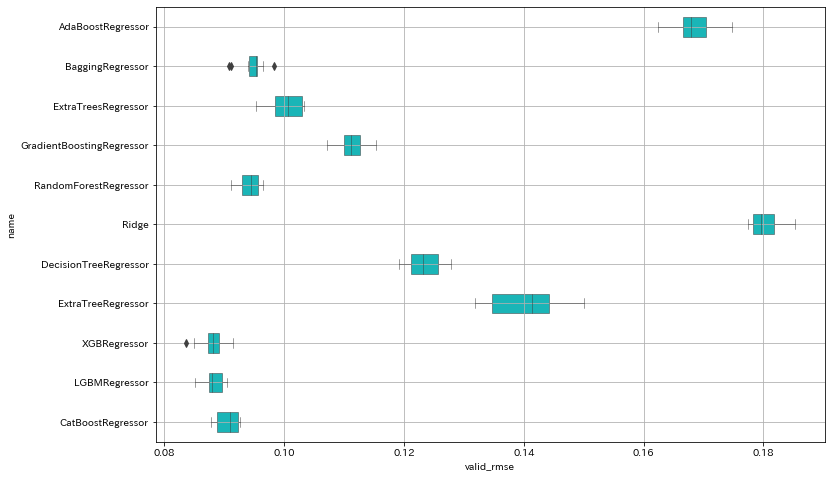

In [102]:
# 特徴量を選択して、複数のモデルで精度を調査する
from scipy.stats import mstats
from tqdm import tqdm
import matplotlib
from sklearn import metrics,  feature_selection, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis, model_selection
from imblearn import under_sampling, over_sampling
from sklearn.metrics import make_scorer
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
base_color = 'darkturquoise'
base_color2 = 'gray'

def generate_cmap(colors):
    
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v/vmax, c))
    return matplotlib.colors.LinearSegmentedColormap.from_list('custom_cmap', color_list)
cm = generate_cmap([base_color2, 'white', base_color])

def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

params={'booster': 'dart', 
        'alpha': 0.009385870161072372, 
        'max_depth': 9, 'eta': 2.3698818355249718e-07,
        'gamma': 3.167530221746867e-05, 
        'grow_policy': 'lossguide',
        'sample_type': 'weighted',
        'normalize_type': 'forest',
        'rate_drop': 3.1207262366715483e-08,
        'skip_drop': 1.2650261386504368e-05}


models = [
 
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
 
    #Gaussian Processes
#     gaussian_process.GaussianProcessRegressor(),
    
    #GLM
    linear_model.Ridge(),

    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
 
    #xgboost
    xgb. XGBRegressor(**params),
    lgb.LGBMRegressor(**{'iterations': 146, 'depth': 20, 'learning_rate': 0.1376935200649686, 'random_strength': 99, 'bagging_temperature': 9.271358711287812, 'od_type': 'Iter', 'od_wait': 35}),
    cat.CatBoostRegressor(),
    
]
 
df_compare = pd.DataFrame(columns=['name', 'train_rmse', 'valid_rmse', 'time'])
score_funcs = {
    'rmse': make_scorer(rmse_score),
}

for model in tqdm(models):
    
    name = model.__class__.__name__
    
    cv_rlts = model_selection.cross_validate(model,X,y, scoring=score_funcs, cv=10, return_train_score=True)
 
    for i in range(10):
        s = pd.Series([name, cv_rlts['train_rmse'][i], cv_rlts['test_rmse'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name=name+str(i))
        df_compare = df_compare.append(s)
        
plt.figure(figsize=(12,8))
sns.boxplot(data=df_compare, y='name', x='valid_rmse', orient='h', color=base_color, linewidth=0.5, width=0.5)
plt.grid()
plt.show()

## XGBoost+optuna

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import r2_score

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(r2_score(model.predict(X_test), y_test))

        score = np.array(scores).mean()
        return score

import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 9)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        return score

xgbr = XGBRegressorCV(n_trials=20)
# xgbr.fit(train_X, train_y)


## LightGBM+optuna

In [43]:
import lightgbm as lgb
# from sklearn.metrics import log_loss

class LGBRegressorCV(RidgeCV):
    model_cls = lgb.LGBMRegressor
    def __call__(self, trial):
        params = {
            'loss_function': 'RMSE',
            'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 4, 20),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(**params)
        score = self.kfold_cv(model)
        return score

model=LGBRegressorCV()
model.fit(X,y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(model.predict(valid_X)))
print(f'MAE:{score:4f}')
pred=model.predict(test)


[I 2019-11-14 10:17:32,504] Finished trial#0 resulted in value: 0.957888048326869. Current best value is 0.957888048326869 with parameters: {'iterations': 194, 'depth': 9, 'learning_rate': 0.2802224446991248, 'random_strength': 59, 'bagging_temperature': 3.7844292495798846, 'od_type': 'Iter', 'od_wait': 33}.
[I 2019-11-14 10:17:33,854] Finished trial#1 resulted in value: 0.9591579444412124. Current best value is 0.9591579444412124 with parameters: {'iterations': 219, 'depth': 6, 'learning_rate': 0.1326380200945958, 'random_strength': 12, 'bagging_temperature': 3.387969512346988, 'od_type': 'Iter', 'od_wait': 21}.
[I 2019-11-14 10:17:35,117] Finished trial#2 resulted in value: 0.9584278754470029. Current best value is 0.9591579444412124 with parameters: {'iterations': 219, 'depth': 6, 'learning_rate': 0.1326380200945958, 'random_strength': 12, 'bagging_temperature': 3.387969512346988, 'od_type': 'Iter', 'od_wait': 21}.
[I 2019-11-14 10:17:36,264] Finished trial#3 resulted in value: 0.95

KeyboardInterrupt: 

## CatBoost+optuna(non recomended)

In [47]:
from catboost import CatBoost
# from sklearn.metrics import log_loss

class CatRegressorCV(RidgeCV):
    model_cls = CatBoost
    def __call__(self, trial):
        params = {
            'loss_function': 'RMSE',
#             'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 4, 16),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(params)
        score = self.kfold_cv(model)
        return score
model=CatRegressorCV()
model.fit(X,y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(model.predict(valid_X)))
print(f'MAE:{score:4f}')
pred=model.predict(test)

0:	learn: 0.3825715	total: 21.2ms	remaining: 21.2s
1:	learn: 0.3328721	total: 33.1ms	remaining: 16.5s
2:	learn: 0.2907086	total: 50ms	remaining: 16.6s
3:	learn: 0.2583376	total: 60.2ms	remaining: 15s
4:	learn: 0.2372345	total: 73.5ms	remaining: 14.6s
5:	learn: 0.2087676	total: 89.7ms	remaining: 14.9s
6:	learn: 0.1934342	total: 109ms	remaining: 15.4s
7:	learn: 0.1847466	total: 131ms	remaining: 16.3s
8:	learn: 0.1741020	total: 148ms	remaining: 16.3s
9:	learn: 0.1657340	total: 170ms	remaining: 16.8s
10:	learn: 0.1593621	total: 189ms	remaining: 17s
11:	learn: 0.1551797	total: 205ms	remaining: 16.9s
12:	learn: 0.1500469	total: 212ms	remaining: 16.1s
13:	learn: 0.1468797	total: 263ms	remaining: 18.5s
14:	learn: 0.1444752	total: 279ms	remaining: 18.3s
15:	learn: 0.1428580	total: 294ms	remaining: 18.1s
16:	learn: 0.1370294	total: 316ms	remaining: 18.3s
17:	learn: 0.1318885	total: 333ms	remaining: 18.1s
18:	learn: 0.1300253	total: 351ms	remaining: 18.1s
19:	learn: 0.1282051	total: 375ms	remaini

161:	learn: 0.0689087	total: 3.17s	remaining: 16.4s
162:	learn: 0.0687801	total: 3.19s	remaining: 16.4s
163:	learn: 0.0686657	total: 3.21s	remaining: 16.4s
164:	learn: 0.0685422	total: 3.23s	remaining: 16.4s
165:	learn: 0.0684318	total: 3.25s	remaining: 16.3s
166:	learn: 0.0683537	total: 3.27s	remaining: 16.3s
167:	learn: 0.0681699	total: 3.29s	remaining: 16.3s
168:	learn: 0.0680900	total: 3.31s	remaining: 16.3s
169:	learn: 0.0679576	total: 3.33s	remaining: 16.3s
170:	learn: 0.0678415	total: 3.35s	remaining: 16.2s
171:	learn: 0.0676793	total: 3.37s	remaining: 16.2s
172:	learn: 0.0675757	total: 3.39s	remaining: 16.2s
173:	learn: 0.0675391	total: 3.41s	remaining: 16.2s
174:	learn: 0.0673824	total: 3.42s	remaining: 16.1s
175:	learn: 0.0671974	total: 3.45s	remaining: 16.1s
176:	learn: 0.0671059	total: 3.46s	remaining: 16.1s
177:	learn: 0.0669941	total: 3.48s	remaining: 16.1s
178:	learn: 0.0669495	total: 3.5s	remaining: 16.1s
179:	learn: 0.0668364	total: 3.54s	remaining: 16.1s
180:	learn: 0

320:	learn: 0.0535622	total: 6.47s	remaining: 13.7s
321:	learn: 0.0534878	total: 6.49s	remaining: 13.7s
322:	learn: 0.0534426	total: 6.51s	remaining: 13.7s
323:	learn: 0.0533732	total: 6.53s	remaining: 13.6s
324:	learn: 0.0532447	total: 6.56s	remaining: 13.6s
325:	learn: 0.0531331	total: 6.57s	remaining: 13.6s
326:	learn: 0.0530520	total: 6.59s	remaining: 13.6s
327:	learn: 0.0529013	total: 6.61s	remaining: 13.5s
328:	learn: 0.0528411	total: 6.63s	remaining: 13.5s
329:	learn: 0.0527623	total: 6.65s	remaining: 13.5s
330:	learn: 0.0527260	total: 6.67s	remaining: 13.5s
331:	learn: 0.0526980	total: 6.69s	remaining: 13.5s
332:	learn: 0.0526524	total: 6.71s	remaining: 13.4s
333:	learn: 0.0525733	total: 6.72s	remaining: 13.4s
334:	learn: 0.0525572	total: 6.75s	remaining: 13.4s
335:	learn: 0.0524980	total: 6.76s	remaining: 13.4s
336:	learn: 0.0524561	total: 6.78s	remaining: 13.3s
337:	learn: 0.0523621	total: 6.8s	remaining: 13.3s
338:	learn: 0.0522802	total: 6.82s	remaining: 13.3s
339:	learn: 0

479:	learn: 0.0436744	total: 9.61s	remaining: 10.4s
480:	learn: 0.0436378	total: 9.62s	remaining: 10.4s
481:	learn: 0.0435762	total: 9.65s	remaining: 10.4s
482:	learn: 0.0435422	total: 9.67s	remaining: 10.4s
483:	learn: 0.0434843	total: 9.69s	remaining: 10.3s
484:	learn: 0.0434488	total: 9.71s	remaining: 10.3s
485:	learn: 0.0434175	total: 9.73s	remaining: 10.3s
486:	learn: 0.0433884	total: 9.75s	remaining: 10.3s
487:	learn: 0.0433170	total: 9.77s	remaining: 10.3s
488:	learn: 0.0432577	total: 9.79s	remaining: 10.2s
489:	learn: 0.0432219	total: 9.81s	remaining: 10.2s
490:	learn: 0.0431736	total: 9.83s	remaining: 10.2s
491:	learn: 0.0430938	total: 9.85s	remaining: 10.2s
492:	learn: 0.0430742	total: 9.87s	remaining: 10.2s
493:	learn: 0.0430245	total: 9.89s	remaining: 10.1s
494:	learn: 0.0429686	total: 9.91s	remaining: 10.1s
495:	learn: 0.0429054	total: 9.93s	remaining: 10.1s
496:	learn: 0.0428372	total: 9.95s	remaining: 10.1s
497:	learn: 0.0427981	total: 9.97s	remaining: 10.1s
498:	learn: 

638:	learn: 0.0369790	total: 13.7s	remaining: 7.73s
639:	learn: 0.0369532	total: 13.7s	remaining: 7.71s
640:	learn: 0.0369223	total: 13.7s	remaining: 7.69s
641:	learn: 0.0368934	total: 13.8s	remaining: 7.67s
642:	learn: 0.0368586	total: 13.8s	remaining: 7.65s
643:	learn: 0.0368270	total: 13.8s	remaining: 7.63s
644:	learn: 0.0367865	total: 13.8s	remaining: 7.61s
645:	learn: 0.0367499	total: 13.9s	remaining: 7.59s
646:	learn: 0.0366578	total: 13.9s	remaining: 7.58s
647:	learn: 0.0365928	total: 13.9s	remaining: 7.57s
648:	learn: 0.0365252	total: 14s	remaining: 7.55s
649:	learn: 0.0364655	total: 14s	remaining: 7.53s
650:	learn: 0.0364118	total: 14s	remaining: 7.51s
651:	learn: 0.0363586	total: 14s	remaining: 7.5s
652:	learn: 0.0363362	total: 14.1s	remaining: 7.48s
653:	learn: 0.0362928	total: 14.1s	remaining: 7.46s
654:	learn: 0.0362683	total: 14.1s	remaining: 7.44s
655:	learn: 0.0362434	total: 14.2s	remaining: 7.42s
656:	learn: 0.0362090	total: 14.2s	remaining: 7.4s
657:	learn: 0.0361871	

797:	learn: 0.0316187	total: 17.2s	remaining: 4.35s
798:	learn: 0.0316058	total: 17.2s	remaining: 4.33s
799:	learn: 0.0315798	total: 17.2s	remaining: 4.31s
800:	learn: 0.0315382	total: 17.3s	remaining: 4.29s
801:	learn: 0.0315217	total: 17.3s	remaining: 4.26s
802:	learn: 0.0314751	total: 17.3s	remaining: 4.24s
803:	learn: 0.0314299	total: 17.3s	remaining: 4.22s
804:	learn: 0.0313763	total: 17.3s	remaining: 4.2s
805:	learn: 0.0313554	total: 17.3s	remaining: 4.17s
806:	learn: 0.0313283	total: 17.4s	remaining: 4.15s
807:	learn: 0.0312868	total: 17.4s	remaining: 4.13s
808:	learn: 0.0312463	total: 17.4s	remaining: 4.1s
809:	learn: 0.0312238	total: 17.4s	remaining: 4.08s
810:	learn: 0.0311747	total: 17.4s	remaining: 4.06s
811:	learn: 0.0311465	total: 17.4s	remaining: 4.04s
812:	learn: 0.0311026	total: 17.5s	remaining: 4.01s
813:	learn: 0.0310880	total: 17.5s	remaining: 3.99s
814:	learn: 0.0310738	total: 17.5s	remaining: 3.97s
815:	learn: 0.0310454	total: 17.5s	remaining: 3.95s
816:	learn: 0.

956:	learn: 0.0271380	total: 20s	remaining: 897ms
957:	learn: 0.0271197	total: 20s	remaining: 877ms
958:	learn: 0.0270980	total: 20s	remaining: 856ms
959:	learn: 0.0270696	total: 20s	remaining: 835ms
960:	learn: 0.0270497	total: 20.1s	remaining: 814ms
961:	learn: 0.0270118	total: 20.1s	remaining: 793ms
962:	learn: 0.0269820	total: 20.1s	remaining: 773ms
963:	learn: 0.0269632	total: 20.1s	remaining: 752ms
964:	learn: 0.0269457	total: 20.2s	remaining: 731ms
965:	learn: 0.0269251	total: 20.2s	remaining: 710ms
966:	learn: 0.0269102	total: 20.2s	remaining: 689ms
967:	learn: 0.0268775	total: 20.2s	remaining: 669ms
968:	learn: 0.0268734	total: 20.2s	remaining: 648ms
969:	learn: 0.0268632	total: 20.3s	remaining: 627ms
970:	learn: 0.0268404	total: 20.3s	remaining: 606ms
971:	learn: 0.0268349	total: 20.3s	remaining: 585ms
972:	learn: 0.0268084	total: 20.3s	remaining: 565ms
973:	learn: 0.0267773	total: 20.4s	remaining: 544ms
974:	learn: 0.0267455	total: 20.4s	remaining: 523ms
975:	learn: 0.026721

117:	learn: 0.0769147	total: 2.85s	remaining: 21.3s
118:	learn: 0.0769035	total: 2.88s	remaining: 21.3s
119:	learn: 0.0767841	total: 2.92s	remaining: 21.4s
120:	learn: 0.0765676	total: 2.94s	remaining: 21.3s
121:	learn: 0.0763420	total: 2.95s	remaining: 21.3s
122:	learn: 0.0761312	total: 2.98s	remaining: 21.3s
123:	learn: 0.0759724	total: 3.01s	remaining: 21.2s
124:	learn: 0.0758360	total: 3.03s	remaining: 21.2s
125:	learn: 0.0756498	total: 3.06s	remaining: 21.3s
126:	learn: 0.0754501	total: 3.08s	remaining: 21.2s
127:	learn: 0.0752572	total: 3.1s	remaining: 21.1s
128:	learn: 0.0751371	total: 3.13s	remaining: 21.1s
129:	learn: 0.0749899	total: 3.15s	remaining: 21.1s
130:	learn: 0.0748238	total: 3.17s	remaining: 21.1s
131:	learn: 0.0745952	total: 3.2s	remaining: 21s
132:	learn: 0.0744062	total: 3.22s	remaining: 21s
133:	learn: 0.0743232	total: 3.24s	remaining: 21s
134:	learn: 0.0742255	total: 3.26s	remaining: 20.9s
135:	learn: 0.0741231	total: 3.28s	remaining: 20.8s
136:	learn: 0.074020

276:	learn: 0.0589959	total: 9.48s	remaining: 24.7s
277:	learn: 0.0588961	total: 9.51s	remaining: 24.7s
278:	learn: 0.0588872	total: 9.55s	remaining: 24.7s
279:	learn: 0.0587495	total: 9.58s	remaining: 24.6s
280:	learn: 0.0586726	total: 9.62s	remaining: 24.6s
281:	learn: 0.0586423	total: 9.65s	remaining: 24.6s
282:	learn: 0.0585442	total: 9.69s	remaining: 24.5s
283:	learn: 0.0584947	total: 9.72s	remaining: 24.5s
284:	learn: 0.0584214	total: 9.76s	remaining: 24.5s
285:	learn: 0.0583568	total: 9.8s	remaining: 24.5s
286:	learn: 0.0582937	total: 9.84s	remaining: 24.4s
287:	learn: 0.0581903	total: 9.88s	remaining: 24.4s
288:	learn: 0.0580482	total: 9.9s	remaining: 24.4s
289:	learn: 0.0580471	total: 9.94s	remaining: 24.3s
290:	learn: 0.0579424	total: 9.97s	remaining: 24.3s
291:	learn: 0.0578394	total: 10s	remaining: 24.3s
292:	learn: 0.0576959	total: 10s	remaining: 24.2s
293:	learn: 0.0575980	total: 10.1s	remaining: 24.2s
294:	learn: 0.0574717	total: 10.1s	remaining: 24.2s
295:	learn: 0.0574

435:	learn: 0.0478110	total: 16.9s	remaining: 21.9s
436:	learn: 0.0477452	total: 16.9s	remaining: 21.8s
437:	learn: 0.0476924	total: 17s	remaining: 21.8s
438:	learn: 0.0476404	total: 17s	remaining: 21.7s
439:	learn: 0.0476150	total: 17s	remaining: 21.7s
440:	learn: 0.0475492	total: 17s	remaining: 21.6s
441:	learn: 0.0474831	total: 17.1s	remaining: 21.6s
442:	learn: 0.0474281	total: 17.1s	remaining: 21.5s
443:	learn: 0.0473683	total: 17.2s	remaining: 21.5s
444:	learn: 0.0473200	total: 17.2s	remaining: 21.5s
445:	learn: 0.0472729	total: 17.2s	remaining: 21.4s
446:	learn: 0.0471638	total: 17.3s	remaining: 21.4s
447:	learn: 0.0470761	total: 17.3s	remaining: 21.3s
448:	learn: 0.0470285	total: 17.3s	remaining: 21.2s
449:	learn: 0.0469737	total: 17.3s	remaining: 21.2s
450:	learn: 0.0469027	total: 17.4s	remaining: 21.1s
451:	learn: 0.0468326	total: 17.4s	remaining: 21.1s
452:	learn: 0.0467689	total: 17.4s	remaining: 21s
453:	learn: 0.0467226	total: 17.5s	remaining: 21s
454:	learn: 0.0466299	to

594:	learn: 0.0397542	total: 21.8s	remaining: 14.9s
595:	learn: 0.0397250	total: 21.9s	remaining: 14.8s
596:	learn: 0.0396896	total: 21.9s	remaining: 14.8s
597:	learn: 0.0396538	total: 21.9s	remaining: 14.7s
598:	learn: 0.0396023	total: 22s	remaining: 14.7s
599:	learn: 0.0395643	total: 22s	remaining: 14.7s
600:	learn: 0.0395228	total: 22s	remaining: 14.6s
601:	learn: 0.0394834	total: 22.1s	remaining: 14.6s
602:	learn: 0.0394134	total: 22.1s	remaining: 14.5s
603:	learn: 0.0393624	total: 22.1s	remaining: 14.5s
604:	learn: 0.0393306	total: 22.1s	remaining: 14.5s
605:	learn: 0.0392883	total: 22.2s	remaining: 14.4s
606:	learn: 0.0392143	total: 22.2s	remaining: 14.4s
607:	learn: 0.0392030	total: 22.3s	remaining: 14.3s
608:	learn: 0.0391591	total: 22.3s	remaining: 14.3s
609:	learn: 0.0391111	total: 22.3s	remaining: 14.3s
610:	learn: 0.0390779	total: 22.3s	remaining: 14.2s
611:	learn: 0.0390279	total: 22.4s	remaining: 14.2s
612:	learn: 0.0390105	total: 22.4s	remaining: 14.2s
613:	learn: 0.0389

753:	learn: 0.0337869	total: 26.6s	remaining: 8.69s
754:	learn: 0.0337429	total: 26.6s	remaining: 8.64s
755:	learn: 0.0337133	total: 26.7s	remaining: 8.61s
756:	learn: 0.0336705	total: 26.7s	remaining: 8.57s
757:	learn: 0.0336482	total: 26.7s	remaining: 8.53s
758:	learn: 0.0336198	total: 26.8s	remaining: 8.5s
759:	learn: 0.0335920	total: 26.8s	remaining: 8.46s
760:	learn: 0.0335600	total: 26.8s	remaining: 8.43s
761:	learn: 0.0334889	total: 26.9s	remaining: 8.39s
762:	learn: 0.0334661	total: 26.9s	remaining: 8.35s
763:	learn: 0.0334328	total: 26.9s	remaining: 8.31s
764:	learn: 0.0333855	total: 26.9s	remaining: 8.27s
765:	learn: 0.0333762	total: 27s	remaining: 8.23s
766:	learn: 0.0333388	total: 27s	remaining: 8.2s
767:	learn: 0.0333179	total: 27s	remaining: 8.16s
768:	learn: 0.0332827	total: 27s	remaining: 8.12s
769:	learn: 0.0332425	total: 27.1s	remaining: 8.08s
770:	learn: 0.0332320	total: 27.1s	remaining: 8.04s
771:	learn: 0.0332003	total: 27.1s	remaining: 8.01s
772:	learn: 0.0331623	

912:	learn: 0.0289233	total: 30.6s	remaining: 2.92s
913:	learn: 0.0289021	total: 30.6s	remaining: 2.88s
914:	learn: 0.0288951	total: 30.7s	remaining: 2.85s
915:	learn: 0.0288728	total: 30.7s	remaining: 2.81s
916:	learn: 0.0288521	total: 30.7s	remaining: 2.78s
917:	learn: 0.0288313	total: 30.8s	remaining: 2.75s
918:	learn: 0.0288061	total: 30.8s	remaining: 2.71s
919:	learn: 0.0287723	total: 30.8s	remaining: 2.68s
920:	learn: 0.0287502	total: 30.8s	remaining: 2.65s
921:	learn: 0.0287005	total: 30.9s	remaining: 2.61s
922:	learn: 0.0286786	total: 30.9s	remaining: 2.58s
923:	learn: 0.0286631	total: 30.9s	remaining: 2.54s
924:	learn: 0.0286386	total: 31s	remaining: 2.51s
925:	learn: 0.0286050	total: 31s	remaining: 2.48s
926:	learn: 0.0285815	total: 31s	remaining: 2.44s
927:	learn: 0.0285602	total: 31s	remaining: 2.41s
928:	learn: 0.0285427	total: 31.1s	remaining: 2.37s
929:	learn: 0.0285248	total: 31.1s	remaining: 2.34s
930:	learn: 0.0285097	total: 31.1s	remaining: 2.31s
931:	learn: 0.028496

72:	learn: 0.0896712	total: 1.58s	remaining: 20s
73:	learn: 0.0891827	total: 1.6s	remaining: 20s
74:	learn: 0.0888218	total: 1.62s	remaining: 20s
75:	learn: 0.0884472	total: 1.65s	remaining: 20s
76:	learn: 0.0880738	total: 1.67s	remaining: 20s
77:	learn: 0.0877050	total: 1.7s	remaining: 20.1s
78:	learn: 0.0873852	total: 1.72s	remaining: 20.1s
79:	learn: 0.0870374	total: 1.75s	remaining: 20.1s
80:	learn: 0.0867319	total: 1.77s	remaining: 20.1s
81:	learn: 0.0860986	total: 1.79s	remaining: 20.1s
82:	learn: 0.0858115	total: 1.82s	remaining: 20.1s
83:	learn: 0.0854823	total: 1.84s	remaining: 20.1s
84:	learn: 0.0851500	total: 1.86s	remaining: 20.1s
85:	learn: 0.0846976	total: 1.92s	remaining: 20.4s
86:	learn: 0.0844043	total: 1.95s	remaining: 20.4s
87:	learn: 0.0841775	total: 1.98s	remaining: 20.5s
88:	learn: 0.0839257	total: 2.01s	remaining: 20.5s
89:	learn: 0.0834850	total: 2.03s	remaining: 20.6s
90:	learn: 0.0832687	total: 2.06s	remaining: 20.6s
91:	learn: 0.0830361	total: 2.09s	remaining

231:	learn: 0.0631955	total: 5.51s	remaining: 18.2s
232:	learn: 0.0631258	total: 5.53s	remaining: 18.2s
233:	learn: 0.0629877	total: 5.55s	remaining: 18.2s
234:	learn: 0.0629605	total: 5.58s	remaining: 18.2s
235:	learn: 0.0628643	total: 5.6s	remaining: 18.1s
236:	learn: 0.0627126	total: 5.63s	remaining: 18.1s
237:	learn: 0.0625276	total: 5.65s	remaining: 18.1s
238:	learn: 0.0623792	total: 5.68s	remaining: 18.1s
239:	learn: 0.0622909	total: 5.7s	remaining: 18.1s
240:	learn: 0.0621570	total: 5.73s	remaining: 18s
241:	learn: 0.0620341	total: 5.75s	remaining: 18s
242:	learn: 0.0620087	total: 5.76s	remaining: 18s
243:	learn: 0.0620075	total: 5.79s	remaining: 17.9s
244:	learn: 0.0618656	total: 5.81s	remaining: 17.9s
245:	learn: 0.0618145	total: 5.84s	remaining: 17.9s
246:	learn: 0.0616857	total: 5.86s	remaining: 17.9s
247:	learn: 0.0615725	total: 5.89s	remaining: 17.8s
248:	learn: 0.0614477	total: 5.91s	remaining: 17.8s
249:	learn: 0.0613667	total: 5.93s	remaining: 17.8s
250:	learn: 0.061296

390:	learn: 0.0502861	total: 9.56s	remaining: 14.9s
391:	learn: 0.0502160	total: 9.59s	remaining: 14.9s
392:	learn: 0.0501231	total: 9.62s	remaining: 14.9s
393:	learn: 0.0500542	total: 9.65s	remaining: 14.8s
394:	learn: 0.0499853	total: 9.68s	remaining: 14.8s
395:	learn: 0.0499440	total: 9.71s	remaining: 14.8s
396:	learn: 0.0499300	total: 9.72s	remaining: 14.8s
397:	learn: 0.0499298	total: 9.75s	remaining: 14.7s
398:	learn: 0.0498559	total: 9.78s	remaining: 14.7s
399:	learn: 0.0497883	total: 9.82s	remaining: 14.7s
400:	learn: 0.0497300	total: 9.84s	remaining: 14.7s
401:	learn: 0.0496828	total: 9.87s	remaining: 14.7s
402:	learn: 0.0496018	total: 9.89s	remaining: 14.7s
403:	learn: 0.0495223	total: 9.93s	remaining: 14.6s
404:	learn: 0.0494213	total: 9.96s	remaining: 14.6s
405:	learn: 0.0493749	total: 9.99s	remaining: 14.6s
406:	learn: 0.0493180	total: 10s	remaining: 14.6s
407:	learn: 0.0492406	total: 10.1s	remaining: 14.6s
408:	learn: 0.0492038	total: 10.1s	remaining: 14.6s
409:	learn: 0.

549:	learn: 0.0416976	total: 14.3s	remaining: 11.7s
550:	learn: 0.0416684	total: 14.3s	remaining: 11.7s
551:	learn: 0.0415869	total: 14.4s	remaining: 11.7s
552:	learn: 0.0415468	total: 14.4s	remaining: 11.6s
553:	learn: 0.0414798	total: 14.4s	remaining: 11.6s
554:	learn: 0.0414144	total: 14.5s	remaining: 11.6s
555:	learn: 0.0413963	total: 14.5s	remaining: 11.6s
556:	learn: 0.0413585	total: 14.5s	remaining: 11.6s
557:	learn: 0.0413001	total: 14.6s	remaining: 11.5s
558:	learn: 0.0412822	total: 14.6s	remaining: 11.5s
559:	learn: 0.0412218	total: 14.6s	remaining: 11.5s
560:	learn: 0.0412007	total: 14.7s	remaining: 11.5s
561:	learn: 0.0411492	total: 14.7s	remaining: 11.4s
562:	learn: 0.0411033	total: 14.7s	remaining: 11.4s
563:	learn: 0.0410667	total: 14.7s	remaining: 11.4s
564:	learn: 0.0410365	total: 14.8s	remaining: 11.4s
565:	learn: 0.0409947	total: 14.8s	remaining: 11.4s
566:	learn: 0.0409146	total: 14.8s	remaining: 11.3s
567:	learn: 0.0408705	total: 14.9s	remaining: 11.3s
568:	learn: 

708:	learn: 0.0353329	total: 19.5s	remaining: 7.99s
709:	learn: 0.0352986	total: 19.5s	remaining: 7.96s
710:	learn: 0.0352518	total: 19.5s	remaining: 7.93s
711:	learn: 0.0352123	total: 19.6s	remaining: 7.91s
712:	learn: 0.0351829	total: 19.6s	remaining: 7.88s
713:	learn: 0.0351694	total: 19.6s	remaining: 7.86s
714:	learn: 0.0351363	total: 19.6s	remaining: 7.83s
715:	learn: 0.0350715	total: 19.7s	remaining: 7.8s
716:	learn: 0.0350341	total: 19.7s	remaining: 7.78s
717:	learn: 0.0350154	total: 19.7s	remaining: 7.75s
718:	learn: 0.0349838	total: 19.8s	remaining: 7.73s
719:	learn: 0.0349703	total: 19.8s	remaining: 7.71s
720:	learn: 0.0349103	total: 19.9s	remaining: 7.69s
721:	learn: 0.0348657	total: 19.9s	remaining: 7.66s
722:	learn: 0.0348509	total: 19.9s	remaining: 7.63s
723:	learn: 0.0348190	total: 20s	remaining: 7.61s
724:	learn: 0.0347813	total: 20s	remaining: 7.58s
725:	learn: 0.0347270	total: 20s	remaining: 7.55s
726:	learn: 0.0347131	total: 20s	remaining: 7.53s
727:	learn: 0.0346583

867:	learn: 0.0303849	total: 24s	remaining: 3.66s
868:	learn: 0.0303507	total: 24.1s	remaining: 3.63s
869:	learn: 0.0303004	total: 24.1s	remaining: 3.6s
870:	learn: 0.0302732	total: 24.1s	remaining: 3.57s
871:	learn: 0.0302474	total: 24.2s	remaining: 3.54s
872:	learn: 0.0302233	total: 24.2s	remaining: 3.52s
873:	learn: 0.0301896	total: 24.2s	remaining: 3.49s
874:	learn: 0.0301481	total: 24.2s	remaining: 3.46s
875:	learn: 0.0301187	total: 24.3s	remaining: 3.43s
876:	learn: 0.0300631	total: 24.3s	remaining: 3.4s
877:	learn: 0.0300112	total: 24.3s	remaining: 3.38s
878:	learn: 0.0299865	total: 24.3s	remaining: 3.35s
879:	learn: 0.0299662	total: 24.4s	remaining: 3.32s
880:	learn: 0.0299509	total: 24.4s	remaining: 3.29s
881:	learn: 0.0299127	total: 24.4s	remaining: 3.27s
882:	learn: 0.0298876	total: 24.4s	remaining: 3.24s
883:	learn: 0.0298509	total: 24.5s	remaining: 3.21s
884:	learn: 0.0298126	total: 24.5s	remaining: 3.18s
885:	learn: 0.0297921	total: 24.5s	remaining: 3.15s
886:	learn: 0.02

26:	learn: 0.1219959	total: 893ms	remaining: 32.2s
27:	learn: 0.1206948	total: 921ms	remaining: 32s
28:	learn: 0.1193002	total: 953ms	remaining: 31.9s
29:	learn: 0.1190005	total: 979ms	remaining: 31.6s
30:	learn: 0.1185023	total: 1.01s	remaining: 31.5s
31:	learn: 0.1169861	total: 1.04s	remaining: 31.5s
32:	learn: 0.1169004	total: 1.05s	remaining: 30.9s
33:	learn: 0.1165999	total: 1.08s	remaining: 30.8s
34:	learn: 0.1164673	total: 1.1s	remaining: 30.3s
35:	learn: 0.1155310	total: 1.14s	remaining: 30.5s
36:	learn: 0.1152657	total: 1.17s	remaining: 30.4s
37:	learn: 0.1139473	total: 1.19s	remaining: 30.2s
38:	learn: 0.1132704	total: 1.22s	remaining: 30.1s
39:	learn: 0.1129633	total: 1.25s	remaining: 29.9s
40:	learn: 0.1123568	total: 1.27s	remaining: 29.8s
41:	learn: 0.1118862	total: 1.3s	remaining: 29.7s
42:	learn: 0.1116274	total: 1.33s	remaining: 29.6s
43:	learn: 0.1112936	total: 1.36s	remaining: 29.5s
44:	learn: 0.1105399	total: 1.38s	remaining: 29.4s
45:	learn: 0.1101338	total: 1.41s	r

187:	learn: 0.0668254	total: 5.88s	remaining: 25.4s
188:	learn: 0.0667506	total: 5.9s	remaining: 25.3s
189:	learn: 0.0666302	total: 5.93s	remaining: 25.3s
190:	learn: 0.0664745	total: 5.96s	remaining: 25.2s
191:	learn: 0.0664018	total: 5.99s	remaining: 25.2s
192:	learn: 0.0662384	total: 6.01s	remaining: 25.1s
193:	learn: 0.0661139	total: 6.03s	remaining: 25.1s
194:	learn: 0.0659973	total: 6.06s	remaining: 25s
195:	learn: 0.0658414	total: 6.09s	remaining: 25s
196:	learn: 0.0657612	total: 6.11s	remaining: 24.9s
197:	learn: 0.0656332	total: 6.13s	remaining: 24.9s
198:	learn: 0.0655561	total: 6.16s	remaining: 24.8s
199:	learn: 0.0654436	total: 6.19s	remaining: 24.7s
200:	learn: 0.0653795	total: 6.21s	remaining: 24.7s
201:	learn: 0.0653546	total: 6.23s	remaining: 24.6s
202:	learn: 0.0651943	total: 6.26s	remaining: 24.6s
203:	learn: 0.0651297	total: 6.28s	remaining: 24.5s
204:	learn: 0.0650473	total: 6.31s	remaining: 24.5s
205:	learn: 0.0649504	total: 6.34s	remaining: 24.4s
206:	learn: 0.064

346:	learn: 0.0524901	total: 9.92s	remaining: 18.7s
347:	learn: 0.0524587	total: 9.94s	remaining: 18.6s
348:	learn: 0.0523658	total: 9.97s	remaining: 18.6s
349:	learn: 0.0522535	total: 10s	remaining: 18.6s
350:	learn: 0.0521467	total: 10s	remaining: 18.5s
351:	learn: 0.0520946	total: 10s	remaining: 18.5s
352:	learn: 0.0520197	total: 10.1s	remaining: 18.5s
353:	learn: 0.0519896	total: 10.1s	remaining: 18.4s
354:	learn: 0.0519215	total: 10.1s	remaining: 18.4s
355:	learn: 0.0518843	total: 10.1s	remaining: 18.3s
356:	learn: 0.0518173	total: 10.2s	remaining: 18.3s
357:	learn: 0.0517545	total: 10.2s	remaining: 18.3s
358:	learn: 0.0516860	total: 10.2s	remaining: 18.2s
359:	learn: 0.0515574	total: 10.2s	remaining: 18.2s
360:	learn: 0.0515018	total: 10.3s	remaining: 18.2s
361:	learn: 0.0514677	total: 10.3s	remaining: 18.1s
362:	learn: 0.0514130	total: 10.3s	remaining: 18.1s
363:	learn: 0.0513751	total: 10.3s	remaining: 18.1s
364:	learn: 0.0512233	total: 10.4s	remaining: 18s
365:	learn: 0.051185

505:	learn: 0.0433017	total: 14.5s	remaining: 14.2s
506:	learn: 0.0432551	total: 14.5s	remaining: 14.1s
507:	learn: 0.0431804	total: 14.6s	remaining: 14.1s
508:	learn: 0.0431693	total: 14.6s	remaining: 14.1s
509:	learn: 0.0431072	total: 14.6s	remaining: 14s
510:	learn: 0.0430547	total: 14.6s	remaining: 14s
511:	learn: 0.0430109	total: 14.7s	remaining: 14s
512:	learn: 0.0429758	total: 14.7s	remaining: 13.9s
513:	learn: 0.0429516	total: 14.7s	remaining: 13.9s
514:	learn: 0.0429210	total: 14.7s	remaining: 13.9s
515:	learn: 0.0428544	total: 14.8s	remaining: 13.9s
516:	learn: 0.0428359	total: 14.8s	remaining: 13.8s
517:	learn: 0.0427803	total: 14.8s	remaining: 13.8s
518:	learn: 0.0427066	total: 14.9s	remaining: 13.8s
519:	learn: 0.0426314	total: 14.9s	remaining: 13.7s
520:	learn: 0.0425548	total: 14.9s	remaining: 13.7s
521:	learn: 0.0425203	total: 14.9s	remaining: 13.7s
522:	learn: 0.0424711	total: 15s	remaining: 13.7s
523:	learn: 0.0424319	total: 15s	remaining: 13.6s
524:	learn: 0.0423724	

664:	learn: 0.0365331	total: 17.6s	remaining: 8.86s
665:	learn: 0.0364898	total: 17.6s	remaining: 8.83s
666:	learn: 0.0364375	total: 17.6s	remaining: 8.8s
667:	learn: 0.0363889	total: 17.6s	remaining: 8.77s
668:	learn: 0.0363394	total: 17.7s	remaining: 8.74s
669:	learn: 0.0362757	total: 17.7s	remaining: 8.7s
670:	learn: 0.0362286	total: 17.7s	remaining: 8.67s
671:	learn: 0.0361880	total: 17.7s	remaining: 8.64s
672:	learn: 0.0361675	total: 17.7s	remaining: 8.61s
673:	learn: 0.0361172	total: 17.7s	remaining: 8.58s
674:	learn: 0.0361094	total: 17.8s	remaining: 8.55s
675:	learn: 0.0360836	total: 17.8s	remaining: 8.52s
676:	learn: 0.0360577	total: 17.8s	remaining: 8.49s
677:	learn: 0.0360231	total: 17.8s	remaining: 8.46s
678:	learn: 0.0359943	total: 17.8s	remaining: 8.42s
679:	learn: 0.0359709	total: 17.8s	remaining: 8.39s
680:	learn: 0.0359149	total: 17.9s	remaining: 8.36s
681:	learn: 0.0358752	total: 17.9s	remaining: 8.33s
682:	learn: 0.0358611	total: 17.9s	remaining: 8.3s
683:	learn: 0.0

823:	learn: 0.0310568	total: 22s	remaining: 4.7s
824:	learn: 0.0310410	total: 22.1s	remaining: 4.68s
825:	learn: 0.0309951	total: 22.1s	remaining: 4.66s
826:	learn: 0.0309813	total: 22.2s	remaining: 4.64s
827:	learn: 0.0309811	total: 22.2s	remaining: 4.61s
828:	learn: 0.0309628	total: 22.2s	remaining: 4.58s
829:	learn: 0.0309313	total: 22.3s	remaining: 4.56s
830:	learn: 0.0308955	total: 22.3s	remaining: 4.53s
831:	learn: 0.0308907	total: 22.3s	remaining: 4.5s
832:	learn: 0.0308419	total: 22.3s	remaining: 4.48s
833:	learn: 0.0308076	total: 22.4s	remaining: 4.45s
834:	learn: 0.0307640	total: 22.4s	remaining: 4.42s
835:	learn: 0.0307444	total: 22.4s	remaining: 4.4s
836:	learn: 0.0307404	total: 22.5s	remaining: 4.38s
837:	learn: 0.0307148	total: 22.5s	remaining: 4.35s
838:	learn: 0.0307003	total: 22.5s	remaining: 4.32s
839:	learn: 0.0306792	total: 22.5s	remaining: 4.29s
840:	learn: 0.0306464	total: 22.6s	remaining: 4.27s
841:	learn: 0.0306003	total: 22.6s	remaining: 4.24s
842:	learn: 0.030

982:	learn: 0.0270918	total: 27.8s	remaining: 481ms
983:	learn: 0.0270754	total: 27.9s	remaining: 454ms
984:	learn: 0.0270600	total: 28s	remaining: 426ms
985:	learn: 0.0270558	total: 28s	remaining: 398ms
986:	learn: 0.0270418	total: 28s	remaining: 369ms
987:	learn: 0.0270228	total: 28.1s	remaining: 341ms
988:	learn: 0.0269961	total: 28.2s	remaining: 314ms
989:	learn: 0.0269497	total: 28.3s	remaining: 285ms
990:	learn: 0.0269151	total: 28.3s	remaining: 257ms
991:	learn: 0.0269012	total: 28.3s	remaining: 228ms
992:	learn: 0.0268721	total: 28.5s	remaining: 201ms
993:	learn: 0.0268589	total: 28.7s	remaining: 173ms
994:	learn: 0.0267945	total: 28.8s	remaining: 145ms
995:	learn: 0.0267567	total: 29s	remaining: 116ms
996:	learn: 0.0267289	total: 29.2s	remaining: 87.8ms
997:	learn: 0.0266887	total: 29.3s	remaining: 58.6ms
998:	learn: 0.0266604	total: 29.3s	remaining: 29.4ms
999:	learn: 0.0266127	total: 29.4s	remaining: 0us
0:	learn: 0.3825866	total: 41ms	remaining: 41s
1:	learn: 0.3324756	tota

143:	learn: 0.0725991	total: 4.23s	remaining: 25.1s
144:	learn: 0.0725639	total: 4.26s	remaining: 25.1s
145:	learn: 0.0724176	total: 4.28s	remaining: 25.1s
146:	learn: 0.0721829	total: 4.31s	remaining: 25s
147:	learn: 0.0720131	total: 4.33s	remaining: 24.9s
148:	learn: 0.0718190	total: 4.36s	remaining: 24.9s
149:	learn: 0.0716382	total: 4.38s	remaining: 24.9s
150:	learn: 0.0715006	total: 4.41s	remaining: 24.8s
151:	learn: 0.0714197	total: 4.44s	remaining: 24.8s
152:	learn: 0.0713718	total: 4.46s	remaining: 24.7s
153:	learn: 0.0712307	total: 4.49s	remaining: 24.7s
154:	learn: 0.0710121	total: 4.52s	remaining: 24.7s
155:	learn: 0.0709053	total: 4.55s	remaining: 24.6s
156:	learn: 0.0708170	total: 4.57s	remaining: 24.6s
157:	learn: 0.0706794	total: 4.6s	remaining: 24.5s
158:	learn: 0.0705931	total: 4.71s	remaining: 24.9s
159:	learn: 0.0705068	total: 4.76s	remaining: 25s
160:	learn: 0.0702770	total: 4.79s	remaining: 25s
161:	learn: 0.0701540	total: 4.81s	remaining: 24.9s
162:	learn: 0.07002

302:	learn: 0.0569147	total: 11.9s	remaining: 27.5s
303:	learn: 0.0568697	total: 12s	remaining: 27.4s
304:	learn: 0.0567445	total: 12s	remaining: 27.4s
305:	learn: 0.0566496	total: 12s	remaining: 27.3s
306:	learn: 0.0565499	total: 12.1s	remaining: 27.3s
307:	learn: 0.0565250	total: 12.1s	remaining: 27.2s
308:	learn: 0.0564427	total: 12.2s	remaining: 27.2s
309:	learn: 0.0563799	total: 12.2s	remaining: 27.2s
310:	learn: 0.0562832	total: 12.3s	remaining: 27.2s
311:	learn: 0.0562155	total: 12.3s	remaining: 27.1s
312:	learn: 0.0561659	total: 12.3s	remaining: 27.1s
313:	learn: 0.0560483	total: 12.4s	remaining: 27s
314:	learn: 0.0559663	total: 12.4s	remaining: 27s
315:	learn: 0.0558488	total: 12.4s	remaining: 26.9s
316:	learn: 0.0557349	total: 12.5s	remaining: 26.9s
317:	learn: 0.0556694	total: 12.5s	remaining: 26.8s
318:	learn: 0.0555871	total: 12.5s	remaining: 26.8s
319:	learn: 0.0554912	total: 12.6s	remaining: 26.8s
320:	learn: 0.0554256	total: 12.6s	remaining: 26.7s
321:	learn: 0.0553436	

461:	learn: 0.0464535	total: 17.7s	remaining: 20.6s
462:	learn: 0.0463931	total: 17.7s	remaining: 20.5s
463:	learn: 0.0463489	total: 17.7s	remaining: 20.5s
464:	learn: 0.0462789	total: 17.8s	remaining: 20.4s
465:	learn: 0.0462332	total: 17.8s	remaining: 20.4s
466:	learn: 0.0462061	total: 17.9s	remaining: 20.4s
467:	learn: 0.0461338	total: 17.9s	remaining: 20.4s
468:	learn: 0.0459955	total: 17.9s	remaining: 20.3s
469:	learn: 0.0459428	total: 18s	remaining: 20.3s
470:	learn: 0.0458838	total: 18s	remaining: 20.2s
471:	learn: 0.0458436	total: 18s	remaining: 20.2s
472:	learn: 0.0457348	total: 18.1s	remaining: 20.1s
473:	learn: 0.0456914	total: 18.1s	remaining: 20.1s
474:	learn: 0.0456468	total: 18.1s	remaining: 20s
475:	learn: 0.0456126	total: 18.2s	remaining: 20s
476:	learn: 0.0455759	total: 18.2s	remaining: 20s
477:	learn: 0.0455411	total: 18.3s	remaining: 19.9s
478:	learn: 0.0454937	total: 18.3s	remaining: 19.9s
479:	learn: 0.0454285	total: 18.3s	remaining: 19.9s
480:	learn: 0.0453369	to

620:	learn: 0.0387930	total: 22.6s	remaining: 13.8s
621:	learn: 0.0387641	total: 22.7s	remaining: 13.8s
622:	learn: 0.0387250	total: 22.7s	remaining: 13.7s
623:	learn: 0.0387027	total: 22.7s	remaining: 13.7s
624:	learn: 0.0386436	total: 22.8s	remaining: 13.7s
625:	learn: 0.0386060	total: 22.8s	remaining: 13.6s
626:	learn: 0.0385792	total: 22.9s	remaining: 13.6s
627:	learn: 0.0385353	total: 22.9s	remaining: 13.6s
628:	learn: 0.0384945	total: 22.9s	remaining: 13.5s
629:	learn: 0.0384719	total: 22.9s	remaining: 13.5s
630:	learn: 0.0384583	total: 23s	remaining: 13.4s
631:	learn: 0.0384166	total: 23s	remaining: 13.4s
632:	learn: 0.0383691	total: 23s	remaining: 13.3s
633:	learn: 0.0383341	total: 23s	remaining: 13.3s
634:	learn: 0.0383182	total: 23.1s	remaining: 13.3s
635:	learn: 0.0382888	total: 23.1s	remaining: 13.2s
636:	learn: 0.0382652	total: 23.1s	remaining: 13.2s
637:	learn: 0.0382015	total: 23.2s	remaining: 13.1s
638:	learn: 0.0381893	total: 23.2s	remaining: 13.1s
639:	learn: 0.038175

779:	learn: 0.0332334	total: 27.7s	remaining: 7.81s
780:	learn: 0.0331977	total: 27.7s	remaining: 7.77s
781:	learn: 0.0331503	total: 27.8s	remaining: 7.74s
782:	learn: 0.0331132	total: 27.8s	remaining: 7.7s
783:	learn: 0.0330719	total: 27.8s	remaining: 7.67s
784:	learn: 0.0330234	total: 27.9s	remaining: 7.63s
785:	learn: 0.0329948	total: 27.9s	remaining: 7.59s
786:	learn: 0.0329789	total: 27.9s	remaining: 7.55s
787:	learn: 0.0329630	total: 27.9s	remaining: 7.52s
788:	learn: 0.0329400	total: 28s	remaining: 7.48s
789:	learn: 0.0329120	total: 28s	remaining: 7.45s
790:	learn: 0.0328828	total: 28s	remaining: 7.41s
791:	learn: 0.0328643	total: 28.1s	remaining: 7.37s
792:	learn: 0.0328305	total: 28.1s	remaining: 7.33s
793:	learn: 0.0328095	total: 28.1s	remaining: 7.3s
794:	learn: 0.0327715	total: 28.2s	remaining: 7.26s
795:	learn: 0.0327516	total: 28.2s	remaining: 7.22s
796:	learn: 0.0327349	total: 28.2s	remaining: 7.19s
797:	learn: 0.0327106	total: 28.2s	remaining: 7.15s
798:	learn: 0.032672

938:	learn: 0.0285982	total: 33.2s	remaining: 2.15s
939:	learn: 0.0285657	total: 33.2s	remaining: 2.12s
940:	learn: 0.0285452	total: 33.2s	remaining: 2.08s
941:	learn: 0.0285310	total: 33.3s	remaining: 2.05s
942:	learn: 0.0284761	total: 33.3s	remaining: 2.01s
943:	learn: 0.0284574	total: 33.4s	remaining: 1.98s
944:	learn: 0.0284341	total: 33.4s	remaining: 1.94s
945:	learn: 0.0284187	total: 33.4s	remaining: 1.91s
946:	learn: 0.0283807	total: 33.5s	remaining: 1.87s
947:	learn: 0.0283536	total: 33.5s	remaining: 1.84s
948:	learn: 0.0283204	total: 33.5s	remaining: 1.8s
949:	learn: 0.0283009	total: 33.5s	remaining: 1.76s
950:	learn: 0.0282575	total: 33.6s	remaining: 1.73s
951:	learn: 0.0282426	total: 33.6s	remaining: 1.69s
952:	learn: 0.0282332	total: 33.6s	remaining: 1.66s
953:	learn: 0.0281980	total: 33.7s	remaining: 1.62s
954:	learn: 0.0281738	total: 33.7s	remaining: 1.59s
955:	learn: 0.0281619	total: 33.7s	remaining: 1.55s
956:	learn: 0.0281331	total: 33.7s	remaining: 1.52s
957:	learn: 0

[I 2019-11-14 10:31:46,460] Finished trial#0 resulted in value: 0.9535416272357716. Current best value is 0.9535416272357716 with parameters: {'depth': 10, 'learning_rate': 0.21815119657029322, 'random_strength': 20, 'bagging_temperature': 75.81787093172561, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.4334519	total: 12.5ms	remaining: 12.5s
1:	learn: 0.4226809	total: 22.2ms	remaining: 11.1s
2:	learn: 0.4097695	total: 37.7ms	remaining: 12.5s
3:	learn: 0.3968373	total: 44.7ms	remaining: 11.1s
4:	learn: 0.3838645	total: 55.7ms	remaining: 11.1s
5:	learn: 0.3760745	total: 67ms	remaining: 11.1s
6:	learn: 0.3636740	total: 76.5ms	remaining: 10.8s
7:	learn: 0.3531771	total: 83.5ms	remaining: 10.4s
8:	learn: 0.3439012	total: 95.1ms	remaining: 10.5s
9:	learn: 0.3353550	total: 105ms	remaining: 10.4s
10:	learn: 0.3284625	total: 118ms	remaining: 10.6s
11:	learn: 0.3181875	total: 125ms	remaining: 10.3s
12:	learn: 0.3119612	total: 145ms	remaining: 11s
13:	learn: 0.3055758	total: 161ms	remaining: 11.3s
14:	learn: 0.3003542	total: 183ms	remaining: 12s
15:	learn: 0.2965898	total: 203ms	remaining: 12.5s
16:	learn: 0.2913927	total: 213ms	remaining: 12.3s
17:	learn: 0.2836139	total: 225ms	remaining: 12.3s
18:	learn: 0.2756303	total: 233ms	remaining: 12s
19:	learn: 0.2708425	total: 246ms	remain

161:	learn: 0.1597250	total: 1.83s	remaining: 9.45s
162:	learn: 0.1592789	total: 1.83s	remaining: 9.43s
163:	learn: 0.1590111	total: 1.85s	remaining: 9.41s
164:	learn: 0.1588578	total: 1.86s	remaining: 9.39s
165:	learn: 0.1585058	total: 1.87s	remaining: 9.39s
166:	learn: 0.1573239	total: 1.88s	remaining: 9.36s
167:	learn: 0.1572719	total: 1.89s	remaining: 9.37s
168:	learn: 0.1569117	total: 1.9s	remaining: 9.34s
169:	learn: 0.1568562	total: 1.91s	remaining: 9.35s
170:	learn: 0.1558211	total: 1.92s	remaining: 9.32s
171:	learn: 0.1556531	total: 1.93s	remaining: 9.31s
172:	learn: 0.1547155	total: 1.94s	remaining: 9.29s
173:	learn: 0.1545570	total: 1.96s	remaining: 9.29s
174:	learn: 0.1543970	total: 1.97s	remaining: 9.28s
175:	learn: 0.1542280	total: 1.98s	remaining: 9.26s
176:	learn: 0.1541943	total: 1.99s	remaining: 9.23s
177:	learn: 0.1531196	total: 2s	remaining: 9.24s
178:	learn: 0.1530805	total: 2.01s	remaining: 9.23s
179:	learn: 0.1528528	total: 2.02s	remaining: 9.2s
180:	learn: 0.152

320:	learn: 0.1125721	total: 3.64s	remaining: 7.71s
321:	learn: 0.1125080	total: 3.66s	remaining: 7.7s
322:	learn: 0.1123629	total: 3.67s	remaining: 7.7s
323:	learn: 0.1121704	total: 3.69s	remaining: 7.69s
324:	learn: 0.1120694	total: 3.7s	remaining: 7.68s
325:	learn: 0.1119739	total: 3.71s	remaining: 7.67s
326:	learn: 0.1118801	total: 3.72s	remaining: 7.65s
327:	learn: 0.1118205	total: 3.73s	remaining: 7.65s
328:	learn: 0.1117523	total: 3.74s	remaining: 7.64s
329:	learn: 0.1116472	total: 3.76s	remaining: 7.63s
330:	learn: 0.1116019	total: 3.77s	remaining: 7.61s
331:	learn: 0.1115299	total: 3.78s	remaining: 7.6s
332:	learn: 0.1114448	total: 3.79s	remaining: 7.59s
333:	learn: 0.1112943	total: 3.8s	remaining: 7.58s
334:	learn: 0.1112151	total: 3.81s	remaining: 7.56s
335:	learn: 0.1110825	total: 3.82s	remaining: 7.55s
336:	learn: 0.1108532	total: 3.83s	remaining: 7.53s
337:	learn: 0.1107481	total: 3.84s	remaining: 7.51s
338:	learn: 0.1105568	total: 3.84s	remaining: 7.49s
339:	learn: 0.110

479:	learn: 0.1009313	total: 5.46s	remaining: 5.92s
480:	learn: 0.1009048	total: 5.47s	remaining: 5.91s
481:	learn: 0.1008529	total: 5.49s	remaining: 5.9s
482:	learn: 0.1008262	total: 5.5s	remaining: 5.89s
483:	learn: 0.1008027	total: 5.51s	remaining: 5.88s
484:	learn: 0.1006644	total: 5.52s	remaining: 5.86s
485:	learn: 0.1006491	total: 5.53s	remaining: 5.85s
486:	learn: 0.1006198	total: 5.54s	remaining: 5.84s
487:	learn: 0.1005611	total: 5.56s	remaining: 5.83s
488:	learn: 0.1005384	total: 5.57s	remaining: 5.82s
489:	learn: 0.1004041	total: 5.58s	remaining: 5.81s
490:	learn: 0.1003756	total: 5.59s	remaining: 5.8s
491:	learn: 0.1002555	total: 5.6s	remaining: 5.79s
492:	learn: 0.1002248	total: 5.61s	remaining: 5.77s
493:	learn: 0.1001985	total: 5.63s	remaining: 5.76s
494:	learn: 0.1001632	total: 5.63s	remaining: 5.75s
495:	learn: 0.1001387	total: 5.65s	remaining: 5.74s
496:	learn: 0.1000237	total: 5.66s	remaining: 5.73s
497:	learn: 0.0999984	total: 5.67s	remaining: 5.72s
498:	learn: 0.09

638:	learn: 0.0955313	total: 7.3s	remaining: 4.12s
639:	learn: 0.0955170	total: 7.31s	remaining: 4.11s
640:	learn: 0.0954970	total: 7.32s	remaining: 4.1s
641:	learn: 0.0954879	total: 7.33s	remaining: 4.09s
642:	learn: 0.0954542	total: 7.34s	remaining: 4.08s
643:	learn: 0.0954447	total: 7.35s	remaining: 4.07s
644:	learn: 0.0954331	total: 7.36s	remaining: 4.05s
645:	learn: 0.0954250	total: 7.37s	remaining: 4.04s
646:	learn: 0.0954118	total: 7.38s	remaining: 4.03s
647:	learn: 0.0953719	total: 7.39s	remaining: 4.01s
648:	learn: 0.0953448	total: 7.4s	remaining: 4s
649:	learn: 0.0953339	total: 7.41s	remaining: 3.99s
650:	learn: 0.0953210	total: 7.42s	remaining: 3.98s
651:	learn: 0.0953088	total: 7.43s	remaining: 3.96s
652:	learn: 0.0952709	total: 7.44s	remaining: 3.95s
653:	learn: 0.0952375	total: 7.45s	remaining: 3.94s
654:	learn: 0.0952205	total: 7.46s	remaining: 3.93s
655:	learn: 0.0951846	total: 7.49s	remaining: 3.93s
656:	learn: 0.0951556	total: 7.5s	remaining: 3.91s
657:	learn: 0.09514

797:	learn: 0.0925223	total: 9.06s	remaining: 2.29s
798:	learn: 0.0925059	total: 9.07s	remaining: 2.28s
799:	learn: 0.0924921	total: 9.09s	remaining: 2.27s
800:	learn: 0.0924874	total: 9.1s	remaining: 2.26s
801:	learn: 0.0924700	total: 9.1s	remaining: 2.25s
802:	learn: 0.0924617	total: 9.12s	remaining: 2.24s
803:	learn: 0.0924415	total: 9.13s	remaining: 2.23s
804:	learn: 0.0924337	total: 9.14s	remaining: 2.21s
805:	learn: 0.0923992	total: 9.15s	remaining: 2.2s
806:	learn: 0.0923914	total: 9.16s	remaining: 2.19s
807:	learn: 0.0923809	total: 9.17s	remaining: 2.18s
808:	learn: 0.0923416	total: 9.19s	remaining: 2.17s
809:	learn: 0.0923351	total: 9.2s	remaining: 2.16s
810:	learn: 0.0923188	total: 9.21s	remaining: 2.15s
811:	learn: 0.0922811	total: 9.23s	remaining: 2.14s
812:	learn: 0.0922720	total: 9.24s	remaining: 2.13s
813:	learn: 0.0922550	total: 9.25s	remaining: 2.11s
814:	learn: 0.0922480	total: 9.26s	remaining: 2.1s
815:	learn: 0.0921933	total: 9.28s	remaining: 2.09s
816:	learn: 0.092

956:	learn: 0.0903173	total: 10.9s	remaining: 489ms
957:	learn: 0.0903074	total: 10.9s	remaining: 477ms
958:	learn: 0.0903003	total: 10.9s	remaining: 466ms
959:	learn: 0.0902916	total: 10.9s	remaining: 455ms
960:	learn: 0.0902780	total: 10.9s	remaining: 443ms
961:	learn: 0.0902706	total: 10.9s	remaining: 432ms
962:	learn: 0.0902647	total: 10.9s	remaining: 421ms
963:	learn: 0.0902594	total: 11s	remaining: 409ms
964:	learn: 0.0902527	total: 11s	remaining: 398ms
965:	learn: 0.0902430	total: 11s	remaining: 386ms
966:	learn: 0.0902344	total: 11s	remaining: 375ms
967:	learn: 0.0902289	total: 11s	remaining: 363ms
968:	learn: 0.0902219	total: 11s	remaining: 352ms
969:	learn: 0.0902168	total: 11s	remaining: 341ms
970:	learn: 0.0902030	total: 11s	remaining: 329ms
971:	learn: 0.0901964	total: 11s	remaining: 318ms
972:	learn: 0.0901887	total: 11.1s	remaining: 307ms
973:	learn: 0.0901729	total: 11.1s	remaining: 295ms
974:	learn: 0.0901640	total: 11.1s	remaining: 284ms
975:	learn: 0.0901586	total: 1

117:	learn: 0.1673330	total: 1.32s	remaining: 9.86s
118:	learn: 0.1668073	total: 1.33s	remaining: 9.82s
119:	learn: 0.1659958	total: 1.34s	remaining: 9.83s
120:	learn: 0.1658408	total: 1.35s	remaining: 9.79s
121:	learn: 0.1657894	total: 1.35s	remaining: 9.75s
122:	learn: 0.1657439	total: 1.37s	remaining: 9.74s
123:	learn: 0.1657350	total: 1.38s	remaining: 9.73s
124:	learn: 0.1656243	total: 1.39s	remaining: 9.74s
125:	learn: 0.1652035	total: 1.4s	remaining: 9.7s
126:	learn: 0.1650007	total: 1.41s	remaining: 9.72s
127:	learn: 0.1648725	total: 1.42s	remaining: 9.69s
128:	learn: 0.1645495	total: 1.44s	remaining: 9.69s
129:	learn: 0.1645059	total: 1.44s	remaining: 9.65s
130:	learn: 0.1643227	total: 1.46s	remaining: 9.67s
131:	learn: 0.1641694	total: 1.47s	remaining: 9.64s
132:	learn: 0.1641529	total: 1.48s	remaining: 9.64s
133:	learn: 0.1640198	total: 1.49s	remaining: 9.61s
134:	learn: 0.1639828	total: 1.5s	remaining: 9.62s
135:	learn: 0.1634834	total: 1.51s	remaining: 9.59s
136:	learn: 0.1

276:	learn: 0.1177477	total: 3.21s	remaining: 8.39s
277:	learn: 0.1176293	total: 3.23s	remaining: 8.38s
278:	learn: 0.1174791	total: 3.23s	remaining: 8.36s
279:	learn: 0.1173185	total: 3.25s	remaining: 8.36s
280:	learn: 0.1170363	total: 3.26s	remaining: 8.34s
281:	learn: 0.1169416	total: 3.27s	remaining: 8.34s
282:	learn: 0.1168194	total: 3.28s	remaining: 8.32s
283:	learn: 0.1166054	total: 3.3s	remaining: 8.31s
284:	learn: 0.1164868	total: 3.31s	remaining: 8.29s
285:	learn: 0.1162644	total: 3.32s	remaining: 8.29s
286:	learn: 0.1161108	total: 3.33s	remaining: 8.27s
287:	learn: 0.1159827	total: 3.34s	remaining: 8.26s
288:	learn: 0.1157599	total: 3.35s	remaining: 8.24s
289:	learn: 0.1156580	total: 3.36s	remaining: 8.24s
290:	learn: 0.1154634	total: 3.37s	remaining: 8.22s
291:	learn: 0.1153335	total: 3.39s	remaining: 8.21s
292:	learn: 0.1150125	total: 3.4s	remaining: 8.19s
293:	learn: 0.1148941	total: 3.41s	remaining: 8.19s
294:	learn: 0.1147845	total: 3.42s	remaining: 8.17s
295:	learn: 0.

435:	learn: 0.1030409	total: 5.23s	remaining: 6.76s
436:	learn: 0.1029913	total: 5.24s	remaining: 6.75s
437:	learn: 0.1029293	total: 5.25s	remaining: 6.74s
438:	learn: 0.1028843	total: 5.26s	remaining: 6.73s
439:	learn: 0.1028399	total: 5.28s	remaining: 6.72s
440:	learn: 0.1027748	total: 5.29s	remaining: 6.71s
441:	learn: 0.1026341	total: 5.31s	remaining: 6.7s
442:	learn: 0.1025766	total: 5.32s	remaining: 6.69s
443:	learn: 0.1025285	total: 5.33s	remaining: 6.68s
444:	learn: 0.1024415	total: 5.34s	remaining: 6.66s
445:	learn: 0.1023964	total: 5.35s	remaining: 6.65s
446:	learn: 0.1023451	total: 5.36s	remaining: 6.63s
447:	learn: 0.1022858	total: 5.38s	remaining: 6.63s
448:	learn: 0.1022477	total: 5.38s	remaining: 6.61s
449:	learn: 0.1022253	total: 5.4s	remaining: 6.6s
450:	learn: 0.1021887	total: 5.41s	remaining: 6.58s
451:	learn: 0.1021709	total: 5.42s	remaining: 6.57s
452:	learn: 0.1021239	total: 5.44s	remaining: 6.57s
453:	learn: 0.1020844	total: 5.45s	remaining: 6.55s
454:	learn: 0.1

594:	learn: 0.0970923	total: 7.15s	remaining: 4.87s
595:	learn: 0.0970495	total: 7.16s	remaining: 4.85s
596:	learn: 0.0970390	total: 7.17s	remaining: 4.84s
597:	learn: 0.0969826	total: 7.19s	remaining: 4.83s
598:	learn: 0.0969403	total: 7.2s	remaining: 4.82s
599:	learn: 0.0969342	total: 7.21s	remaining: 4.81s
600:	learn: 0.0969017	total: 7.22s	remaining: 4.79s
601:	learn: 0.0968903	total: 7.24s	remaining: 4.79s
602:	learn: 0.0968801	total: 7.26s	remaining: 4.78s
603:	learn: 0.0968434	total: 7.28s	remaining: 4.77s
604:	learn: 0.0968178	total: 7.29s	remaining: 4.76s
605:	learn: 0.0967357	total: 7.3s	remaining: 4.75s
606:	learn: 0.0966914	total: 7.33s	remaining: 4.75s
607:	learn: 0.0966774	total: 7.35s	remaining: 4.74s
608:	learn: 0.0966616	total: 7.37s	remaining: 4.73s
609:	learn: 0.0966551	total: 7.39s	remaining: 4.73s
610:	learn: 0.0966329	total: 7.41s	remaining: 4.71s
611:	learn: 0.0966256	total: 7.42s	remaining: 4.71s
612:	learn: 0.0965907	total: 7.45s	remaining: 4.7s
613:	learn: 0.0

753:	learn: 0.0934374	total: 9.44s	remaining: 3.08s
754:	learn: 0.0934306	total: 9.45s	remaining: 3.07s
755:	learn: 0.0934219	total: 9.46s	remaining: 3.05s
756:	learn: 0.0934002	total: 9.48s	remaining: 3.04s
757:	learn: 0.0933796	total: 9.48s	remaining: 3.03s
758:	learn: 0.0933583	total: 9.49s	remaining: 3.01s
759:	learn: 0.0933531	total: 9.5s	remaining: 3s
760:	learn: 0.0933465	total: 9.51s	remaining: 2.99s
761:	learn: 0.0933293	total: 9.52s	remaining: 2.97s
762:	learn: 0.0932731	total: 9.54s	remaining: 2.96s
763:	learn: 0.0932361	total: 9.55s	remaining: 2.95s
764:	learn: 0.0932269	total: 9.56s	remaining: 2.94s
765:	learn: 0.0932121	total: 9.57s	remaining: 2.92s
766:	learn: 0.0931979	total: 9.58s	remaining: 2.91s
767:	learn: 0.0931590	total: 9.59s	remaining: 2.9s
768:	learn: 0.0931242	total: 9.59s	remaining: 2.88s
769:	learn: 0.0931131	total: 9.61s	remaining: 2.87s
770:	learn: 0.0931045	total: 9.62s	remaining: 2.86s
771:	learn: 0.0930930	total: 9.63s	remaining: 2.84s
772:	learn: 0.093

912:	learn: 0.0911849	total: 11.1s	remaining: 1.06s
913:	learn: 0.0911805	total: 11.1s	remaining: 1.05s
914:	learn: 0.0911651	total: 11.2s	remaining: 1.04s
915:	learn: 0.0911382	total: 11.2s	remaining: 1.02s
916:	learn: 0.0911285	total: 11.2s	remaining: 1.01s
917:	learn: 0.0911280	total: 11.2s	remaining: 1s
918:	learn: 0.0911203	total: 11.2s	remaining: 989ms
919:	learn: 0.0911153	total: 11.2s	remaining: 977ms
920:	learn: 0.0911145	total: 11.2s	remaining: 965ms
921:	learn: 0.0911069	total: 11.3s	remaining: 953ms
922:	learn: 0.0911002	total: 11.3s	remaining: 940ms
923:	learn: 0.0910898	total: 11.3s	remaining: 928ms
924:	learn: 0.0910620	total: 11.3s	remaining: 916ms
925:	learn: 0.0910308	total: 11.3s	remaining: 903ms
926:	learn: 0.0910211	total: 11.3s	remaining: 891ms
927:	learn: 0.0910172	total: 11.3s	remaining: 879ms
928:	learn: 0.0910117	total: 11.3s	remaining: 867ms
929:	learn: 0.0910045	total: 11.3s	remaining: 854ms
930:	learn: 0.0909873	total: 11.4s	remaining: 842ms
931:	learn: 0.0

72:	learn: 0.1804073	total: 751ms	remaining: 9.54s
73:	learn: 0.1802421	total: 760ms	remaining: 9.51s
74:	learn: 0.1799845	total: 775ms	remaining: 9.55s
75:	learn: 0.1795157	total: 783ms	remaining: 9.52s
76:	learn: 0.1792327	total: 795ms	remaining: 9.53s
77:	learn: 0.1790160	total: 806ms	remaining: 9.53s
78:	learn: 0.1777854	total: 816ms	remaining: 9.51s
79:	learn: 0.1770618	total: 827ms	remaining: 9.51s
80:	learn: 0.1769831	total: 837ms	remaining: 9.49s
81:	learn: 0.1767090	total: 849ms	remaining: 9.51s
82:	learn: 0.1763810	total: 860ms	remaining: 9.5s
83:	learn: 0.1758022	total: 871ms	remaining: 9.5s
84:	learn: 0.1756001	total: 884ms	remaining: 9.52s
85:	learn: 0.1751816	total: 898ms	remaining: 9.54s
86:	learn: 0.1734516	total: 906ms	remaining: 9.51s
87:	learn: 0.1730064	total: 925ms	remaining: 9.59s
88:	learn: 0.1727337	total: 933ms	remaining: 9.55s
89:	learn: 0.1726140	total: 946ms	remaining: 9.57s
90:	learn: 0.1725128	total: 956ms	remaining: 9.55s
91:	learn: 0.1721179	total: 970ms

231:	learn: 0.1302622	total: 2.51s	remaining: 8.31s
232:	learn: 0.1297456	total: 2.52s	remaining: 8.29s
233:	learn: 0.1293650	total: 2.52s	remaining: 8.27s
234:	learn: 0.1291389	total: 2.54s	remaining: 8.26s
235:	learn: 0.1287121	total: 2.55s	remaining: 8.25s
236:	learn: 0.1283960	total: 2.56s	remaining: 8.24s
237:	learn: 0.1281795	total: 2.57s	remaining: 8.23s
238:	learn: 0.1278889	total: 2.58s	remaining: 8.23s
239:	learn: 0.1273895	total: 2.59s	remaining: 8.21s
240:	learn: 0.1269904	total: 2.6s	remaining: 8.2s
241:	learn: 0.1267525	total: 2.61s	remaining: 8.19s
242:	learn: 0.1265690	total: 2.63s	remaining: 8.18s
243:	learn: 0.1261179	total: 2.63s	remaining: 8.16s
244:	learn: 0.1257513	total: 2.65s	remaining: 8.15s
245:	learn: 0.1255959	total: 2.65s	remaining: 8.13s
246:	learn: 0.1253277	total: 2.67s	remaining: 8.13s
247:	learn: 0.1251557	total: 2.67s	remaining: 8.11s
248:	learn: 0.1247610	total: 2.68s	remaining: 8.09s
249:	learn: 0.1245192	total: 2.69s	remaining: 8.08s
250:	learn: 0.

390:	learn: 0.1064204	total: 4.3s	remaining: 6.69s
391:	learn: 0.1063667	total: 4.31s	remaining: 6.68s
392:	learn: 0.1062876	total: 4.32s	remaining: 6.67s
393:	learn: 0.1062335	total: 4.33s	remaining: 6.66s
394:	learn: 0.1061697	total: 4.34s	remaining: 6.64s
395:	learn: 0.1061251	total: 4.35s	remaining: 6.64s
396:	learn: 0.1060470	total: 4.36s	remaining: 6.63s
397:	learn: 0.1059778	total: 4.37s	remaining: 6.62s
398:	learn: 0.1058366	total: 4.38s	remaining: 6.6s
399:	learn: 0.1057771	total: 4.39s	remaining: 6.59s
400:	learn: 0.1057388	total: 4.4s	remaining: 6.58s
401:	learn: 0.1055515	total: 4.41s	remaining: 6.56s
402:	learn: 0.1055232	total: 4.42s	remaining: 6.55s
403:	learn: 0.1054378	total: 4.43s	remaining: 6.53s
404:	learn: 0.1054058	total: 4.44s	remaining: 6.52s
405:	learn: 0.1053452	total: 4.45s	remaining: 6.51s
406:	learn: 0.1052367	total: 4.46s	remaining: 6.5s
407:	learn: 0.1052050	total: 4.47s	remaining: 6.48s
408:	learn: 0.1051527	total: 4.48s	remaining: 6.47s
409:	learn: 0.10

549:	learn: 0.0982504	total: 6s	remaining: 4.91s
550:	learn: 0.0982359	total: 6.01s	remaining: 4.89s
551:	learn: 0.0982176	total: 6.02s	remaining: 4.89s
552:	learn: 0.0982038	total: 6.03s	remaining: 4.88s
553:	learn: 0.0981884	total: 6.04s	remaining: 4.87s
554:	learn: 0.0981508	total: 6.05s	remaining: 4.85s
555:	learn: 0.0981385	total: 6.07s	remaining: 4.85s
556:	learn: 0.0980236	total: 6.09s	remaining: 4.84s
557:	learn: 0.0979672	total: 6.11s	remaining: 4.84s
558:	learn: 0.0978638	total: 6.12s	remaining: 4.83s
559:	learn: 0.0978279	total: 6.13s	remaining: 4.82s
560:	learn: 0.0977947	total: 6.15s	remaining: 4.81s
561:	learn: 0.0977646	total: 6.16s	remaining: 4.8s
562:	learn: 0.0977380	total: 6.17s	remaining: 4.79s
563:	learn: 0.0976814	total: 6.18s	remaining: 4.78s
564:	learn: 0.0976541	total: 6.2s	remaining: 4.77s
565:	learn: 0.0976397	total: 6.21s	remaining: 4.76s
566:	learn: 0.0976229	total: 6.22s	remaining: 4.75s
567:	learn: 0.0975804	total: 6.23s	remaining: 4.74s
568:	learn: 0.097

708:	learn: 0.0942533	total: 7.72s	remaining: 3.17s
709:	learn: 0.0942441	total: 7.73s	remaining: 3.16s
710:	learn: 0.0941910	total: 7.74s	remaining: 3.15s
711:	learn: 0.0941518	total: 7.75s	remaining: 3.13s
712:	learn: 0.0941398	total: 7.76s	remaining: 3.12s
713:	learn: 0.0941273	total: 7.77s	remaining: 3.11s
714:	learn: 0.0941223	total: 7.78s	remaining: 3.1s
715:	learn: 0.0941124	total: 7.79s	remaining: 3.09s
716:	learn: 0.0941037	total: 7.8s	remaining: 3.08s
717:	learn: 0.0940879	total: 7.82s	remaining: 3.07s
718:	learn: 0.0940643	total: 7.83s	remaining: 3.06s
719:	learn: 0.0940426	total: 7.84s	remaining: 3.05s
720:	learn: 0.0940271	total: 7.84s	remaining: 3.04s
721:	learn: 0.0940018	total: 7.85s	remaining: 3.02s
722:	learn: 0.0939950	total: 7.86s	remaining: 3.01s
723:	learn: 0.0939871	total: 7.87s	remaining: 3s
724:	learn: 0.0939791	total: 7.88s	remaining: 2.99s
725:	learn: 0.0939569	total: 7.89s	remaining: 2.98s
726:	learn: 0.0939302	total: 7.9s	remaining: 2.97s
727:	learn: 0.0939

867:	learn: 0.0918896	total: 9.45s	remaining: 1.44s
868:	learn: 0.0918637	total: 9.47s	remaining: 1.43s
869:	learn: 0.0918576	total: 9.47s	remaining: 1.42s
870:	learn: 0.0918407	total: 9.48s	remaining: 1.4s
871:	learn: 0.0918290	total: 9.49s	remaining: 1.39s
872:	learn: 0.0917885	total: 9.5s	remaining: 1.38s
873:	learn: 0.0917786	total: 9.51s	remaining: 1.37s
874:	learn: 0.0917693	total: 9.52s	remaining: 1.36s
875:	learn: 0.0917490	total: 9.53s	remaining: 1.35s
876:	learn: 0.0917263	total: 9.54s	remaining: 1.34s
877:	learn: 0.0917101	total: 9.55s	remaining: 1.33s
878:	learn: 0.0916848	total: 9.56s	remaining: 1.32s
879:	learn: 0.0916681	total: 9.57s	remaining: 1.3s
880:	learn: 0.0916605	total: 9.58s	remaining: 1.29s
881:	learn: 0.0916436	total: 9.6s	remaining: 1.28s
882:	learn: 0.0916143	total: 9.6s	remaining: 1.27s
883:	learn: 0.0916034	total: 9.62s	remaining: 1.26s
884:	learn: 0.0915851	total: 9.62s	remaining: 1.25s
885:	learn: 0.0915774	total: 9.64s	remaining: 1.24s
886:	learn: 0.091

26:	learn: 0.2368552	total: 263ms	remaining: 9.47s
27:	learn: 0.2336757	total: 277ms	remaining: 9.61s
28:	learn: 0.2321071	total: 287ms	remaining: 9.62s
29:	learn: 0.2291351	total: 296ms	remaining: 9.56s
30:	learn: 0.2259962	total: 306ms	remaining: 9.57s
31:	learn: 0.2236932	total: 316ms	remaining: 9.55s
32:	learn: 0.2210216	total: 327ms	remaining: 9.59s
33:	learn: 0.2195881	total: 338ms	remaining: 9.6s
34:	learn: 0.2175672	total: 351ms	remaining: 9.68s
35:	learn: 0.2158301	total: 374ms	remaining: 10s
36:	learn: 0.2140810	total: 384ms	remaining: 9.99s
37:	learn: 0.2118430	total: 397ms	remaining: 10.1s
38:	learn: 0.2108078	total: 407ms	remaining: 10s
39:	learn: 0.2088334	total: 419ms	remaining: 10.1s
40:	learn: 0.2075107	total: 429ms	remaining: 10s
41:	learn: 0.2051426	total: 438ms	remaining: 9.99s
42:	learn: 0.2028055	total: 449ms	remaining: 10s
43:	learn: 0.2009499	total: 460ms	remaining: 9.99s
44:	learn: 0.1996460	total: 470ms	remaining: 9.98s
45:	learn: 0.1985269	total: 477ms	remain

186:	learn: 0.1507060	total: 1.98s	remaining: 8.59s
187:	learn: 0.1504270	total: 1.99s	remaining: 8.58s
188:	learn: 0.1503415	total: 1.99s	remaining: 8.56s
189:	learn: 0.1491770	total: 2s	remaining: 8.53s
190:	learn: 0.1487989	total: 2.01s	remaining: 8.52s
191:	learn: 0.1485297	total: 2.02s	remaining: 8.5s
192:	learn: 0.1482826	total: 2.03s	remaining: 8.49s
193:	learn: 0.1474124	total: 2.04s	remaining: 8.48s
194:	learn: 0.1472361	total: 2.05s	remaining: 8.46s
195:	learn: 0.1469971	total: 2.06s	remaining: 8.46s
196:	learn: 0.1466698	total: 2.07s	remaining: 8.43s
197:	learn: 0.1456377	total: 2.08s	remaining: 8.42s
198:	learn: 0.1455604	total: 2.09s	remaining: 8.4s
199:	learn: 0.1446148	total: 2.1s	remaining: 8.4s
200:	learn: 0.1441844	total: 2.11s	remaining: 8.37s
201:	learn: 0.1439860	total: 2.12s	remaining: 8.38s
202:	learn: 0.1436718	total: 2.13s	remaining: 8.36s
203:	learn: 0.1431237	total: 2.14s	remaining: 8.35s
204:	learn: 0.1430287	total: 2.15s	remaining: 8.33s
205:	learn: 0.14215

345:	learn: 0.1092496	total: 3.67s	remaining: 6.93s
346:	learn: 0.1091929	total: 3.68s	remaining: 6.92s
347:	learn: 0.1091066	total: 3.69s	remaining: 6.91s
348:	learn: 0.1090421	total: 3.7s	remaining: 6.9s
349:	learn: 0.1089903	total: 3.7s	remaining: 6.88s
350:	learn: 0.1089354	total: 3.72s	remaining: 6.88s
351:	learn: 0.1087471	total: 3.73s	remaining: 6.86s
352:	learn: 0.1086921	total: 3.74s	remaining: 6.86s
353:	learn: 0.1086282	total: 3.75s	remaining: 6.84s
354:	learn: 0.1085704	total: 3.76s	remaining: 6.83s
355:	learn: 0.1085140	total: 3.77s	remaining: 6.82s
356:	learn: 0.1083908	total: 3.78s	remaining: 6.81s
357:	learn: 0.1082213	total: 3.79s	remaining: 6.8s
358:	learn: 0.1081885	total: 3.8s	remaining: 6.79s
359:	learn: 0.1081303	total: 3.81s	remaining: 6.77s
360:	learn: 0.1080748	total: 3.83s	remaining: 6.77s
361:	learn: 0.1079903	total: 3.83s	remaining: 6.75s
362:	learn: 0.1079417	total: 3.85s	remaining: 6.75s
363:	learn: 0.1077886	total: 3.85s	remaining: 6.73s
364:	learn: 0.107

504:	learn: 0.1001605	total: 5.4s	remaining: 5.29s
505:	learn: 0.1001188	total: 5.41s	remaining: 5.28s
506:	learn: 0.1000505	total: 5.43s	remaining: 5.28s
507:	learn: 0.0999896	total: 5.44s	remaining: 5.26s
508:	learn: 0.0999676	total: 5.45s	remaining: 5.26s
509:	learn: 0.0999460	total: 5.46s	remaining: 5.25s
510:	learn: 0.0999287	total: 5.47s	remaining: 5.24s
511:	learn: 0.0998856	total: 5.49s	remaining: 5.23s
512:	learn: 0.0998291	total: 5.5s	remaining: 5.22s
513:	learn: 0.0998114	total: 5.51s	remaining: 5.21s
514:	learn: 0.0997137	total: 5.52s	remaining: 5.2s
515:	learn: 0.0996613	total: 5.53s	remaining: 5.19s
516:	learn: 0.0996289	total: 5.55s	remaining: 5.18s
517:	learn: 0.0996167	total: 5.55s	remaining: 5.17s
518:	learn: 0.0995979	total: 5.56s	remaining: 5.16s
519:	learn: 0.0995582	total: 5.57s	remaining: 5.14s
520:	learn: 0.0995451	total: 5.58s	remaining: 5.13s
521:	learn: 0.0995257	total: 5.59s	remaining: 5.12s
522:	learn: 0.0994999	total: 5.61s	remaining: 5.11s
523:	learn: 0.0

663:	learn: 0.0951856	total: 7.2s	remaining: 3.64s
664:	learn: 0.0951605	total: 7.2s	remaining: 3.63s
665:	learn: 0.0951500	total: 7.21s	remaining: 3.62s
666:	learn: 0.0951379	total: 7.22s	remaining: 3.6s
667:	learn: 0.0951030	total: 7.23s	remaining: 3.59s
668:	learn: 0.0950913	total: 7.24s	remaining: 3.58s
669:	learn: 0.0950313	total: 7.25s	remaining: 3.57s
670:	learn: 0.0950185	total: 7.27s	remaining: 3.56s
671:	learn: 0.0949984	total: 7.27s	remaining: 3.55s
672:	learn: 0.0949763	total: 7.29s	remaining: 3.54s
673:	learn: 0.0949432	total: 7.29s	remaining: 3.53s
674:	learn: 0.0949348	total: 7.31s	remaining: 3.52s
675:	learn: 0.0949190	total: 7.32s	remaining: 3.51s
676:	learn: 0.0949130	total: 7.33s	remaining: 3.5s
677:	learn: 0.0948632	total: 7.34s	remaining: 3.49s
678:	learn: 0.0948296	total: 7.35s	remaining: 3.48s
679:	learn: 0.0947989	total: 7.36s	remaining: 3.46s
680:	learn: 0.0947896	total: 7.38s	remaining: 3.46s
681:	learn: 0.0947731	total: 7.39s	remaining: 3.44s
682:	learn: 0.09

822:	learn: 0.0924166	total: 8.85s	remaining: 1.9s
823:	learn: 0.0924023	total: 8.86s	remaining: 1.89s
824:	learn: 0.0923354	total: 8.87s	remaining: 1.88s
825:	learn: 0.0923190	total: 8.88s	remaining: 1.87s
826:	learn: 0.0923046	total: 8.89s	remaining: 1.86s
827:	learn: 0.0922880	total: 8.91s	remaining: 1.85s
828:	learn: 0.0922518	total: 8.92s	remaining: 1.84s
829:	learn: 0.0922422	total: 8.93s	remaining: 1.83s
830:	learn: 0.0922334	total: 8.95s	remaining: 1.82s
831:	learn: 0.0922223	total: 8.96s	remaining: 1.81s
832:	learn: 0.0922166	total: 8.97s	remaining: 1.8s
833:	learn: 0.0922110	total: 8.98s	remaining: 1.79s
834:	learn: 0.0921986	total: 8.99s	remaining: 1.78s
835:	learn: 0.0921945	total: 9.01s	remaining: 1.77s
836:	learn: 0.0921875	total: 9.02s	remaining: 1.75s
837:	learn: 0.0921827	total: 9.03s	remaining: 1.75s
838:	learn: 0.0921749	total: 9.04s	remaining: 1.73s
839:	learn: 0.0921539	total: 9.05s	remaining: 1.72s
840:	learn: 0.0921437	total: 9.06s	remaining: 1.71s
841:	learn: 0.

981:	learn: 0.0903490	total: 10.6s	remaining: 195ms
982:	learn: 0.0903273	total: 10.6s	remaining: 184ms
983:	learn: 0.0903226	total: 10.7s	remaining: 173ms
984:	learn: 0.0903148	total: 10.7s	remaining: 162ms
985:	learn: 0.0903036	total: 10.7s	remaining: 152ms
986:	learn: 0.0902923	total: 10.7s	remaining: 141ms
987:	learn: 0.0902728	total: 10.7s	remaining: 130ms
988:	learn: 0.0902696	total: 10.7s	remaining: 119ms
989:	learn: 0.0902629	total: 10.7s	remaining: 108ms
990:	learn: 0.0902583	total: 10.7s	remaining: 97.5ms
991:	learn: 0.0902502	total: 10.7s	remaining: 86.6ms
992:	learn: 0.0902314	total: 10.8s	remaining: 75.8ms
993:	learn: 0.0902233	total: 10.8s	remaining: 65ms
994:	learn: 0.0902139	total: 10.8s	remaining: 54.2ms
995:	learn: 0.0901987	total: 10.8s	remaining: 43.3ms
996:	learn: 0.0901893	total: 10.8s	remaining: 32.5ms
997:	learn: 0.0901806	total: 10.8s	remaining: 21.7ms
998:	learn: 0.0901761	total: 10.8s	remaining: 10.8ms
999:	learn: 0.0901706	total: 10.8s	remaining: 0us
0:	lear

142:	learn: 0.1632144	total: 2.01s	remaining: 12s
143:	learn: 0.1631541	total: 2.02s	remaining: 12s
144:	learn: 0.1631289	total: 2.03s	remaining: 12s
145:	learn: 0.1630683	total: 2.05s	remaining: 12s
146:	learn: 0.1629402	total: 2.05s	remaining: 11.9s
147:	learn: 0.1629002	total: 2.07s	remaining: 11.9s
148:	learn: 0.1626566	total: 2.08s	remaining: 11.9s
149:	learn: 0.1625966	total: 2.09s	remaining: 11.9s
150:	learn: 0.1622112	total: 2.1s	remaining: 11.8s
151:	learn: 0.1621615	total: 2.11s	remaining: 11.8s
152:	learn: 0.1618795	total: 2.12s	remaining: 11.8s
153:	learn: 0.1618031	total: 2.13s	remaining: 11.7s
154:	learn: 0.1617252	total: 2.14s	remaining: 11.7s
155:	learn: 0.1616501	total: 2.15s	remaining: 11.6s
156:	learn: 0.1615259	total: 2.16s	remaining: 11.6s
157:	learn: 0.1614967	total: 2.17s	remaining: 11.6s
158:	learn: 0.1603181	total: 2.18s	remaining: 11.5s
159:	learn: 0.1602999	total: 2.2s	remaining: 11.5s
160:	learn: 0.1602368	total: 2.21s	remaining: 11.5s
161:	learn: 0.1602360	

301:	learn: 0.1142735	total: 3.73s	remaining: 8.62s
302:	learn: 0.1141473	total: 3.75s	remaining: 8.62s
303:	learn: 0.1140653	total: 3.76s	remaining: 8.62s
304:	learn: 0.1139403	total: 3.77s	remaining: 8.59s
305:	learn: 0.1137271	total: 3.78s	remaining: 8.57s
306:	learn: 0.1133864	total: 3.79s	remaining: 8.56s
307:	learn: 0.1133038	total: 3.81s	remaining: 8.57s
308:	learn: 0.1131864	total: 3.82s	remaining: 8.55s
309:	learn: 0.1130733	total: 3.84s	remaining: 8.55s
310:	learn: 0.1129591	total: 3.85s	remaining: 8.53s
311:	learn: 0.1127808	total: 3.86s	remaining: 8.51s
312:	learn: 0.1126774	total: 3.88s	remaining: 8.51s
313:	learn: 0.1125684	total: 3.89s	remaining: 8.49s
314:	learn: 0.1124889	total: 3.9s	remaining: 8.49s
315:	learn: 0.1123094	total: 3.91s	remaining: 8.47s
316:	learn: 0.1122438	total: 3.93s	remaining: 8.46s
317:	learn: 0.1121027	total: 3.93s	remaining: 8.44s
318:	learn: 0.1120269	total: 3.95s	remaining: 8.43s
319:	learn: 0.1119463	total: 3.96s	remaining: 8.41s
320:	learn: 0

460:	learn: 0.1020955	total: 5.74s	remaining: 6.71s
461:	learn: 0.1020691	total: 5.75s	remaining: 6.69s
462:	learn: 0.1020407	total: 5.76s	remaining: 6.68s
463:	learn: 0.1020034	total: 5.77s	remaining: 6.66s
464:	learn: 0.1019498	total: 5.78s	remaining: 6.65s
465:	learn: 0.1018643	total: 5.79s	remaining: 6.63s
466:	learn: 0.1017624	total: 5.8s	remaining: 6.62s
467:	learn: 0.1017153	total: 5.81s	remaining: 6.6s
468:	learn: 0.1015686	total: 5.82s	remaining: 6.59s
469:	learn: 0.1015392	total: 5.83s	remaining: 6.57s
470:	learn: 0.1015160	total: 5.85s	remaining: 6.57s
471:	learn: 0.1014639	total: 5.85s	remaining: 6.55s
472:	learn: 0.1014385	total: 5.86s	remaining: 6.53s
473:	learn: 0.1013669	total: 5.88s	remaining: 6.52s
474:	learn: 0.1013135	total: 5.88s	remaining: 6.5s
475:	learn: 0.1012851	total: 5.9s	remaining: 6.49s
476:	learn: 0.1012482	total: 5.91s	remaining: 6.48s
477:	learn: 0.1012170	total: 5.92s	remaining: 6.46s
478:	learn: 0.1011881	total: 5.93s	remaining: 6.46s
479:	learn: 0.10

619:	learn: 0.0964393	total: 7.56s	remaining: 4.63s
620:	learn: 0.0964282	total: 7.58s	remaining: 4.62s
621:	learn: 0.0963972	total: 7.59s	remaining: 4.61s
622:	learn: 0.0963798	total: 7.6s	remaining: 4.6s
623:	learn: 0.0963594	total: 7.61s	remaining: 4.59s
624:	learn: 0.0963457	total: 7.62s	remaining: 4.57s
625:	learn: 0.0962658	total: 7.64s	remaining: 4.56s
626:	learn: 0.0961941	total: 7.66s	remaining: 4.55s
627:	learn: 0.0961750	total: 7.66s	remaining: 4.54s
628:	learn: 0.0961627	total: 7.68s	remaining: 4.53s
629:	learn: 0.0961533	total: 7.69s	remaining: 4.51s
630:	learn: 0.0961154	total: 7.71s	remaining: 4.51s
631:	learn: 0.0961067	total: 7.71s	remaining: 4.49s
632:	learn: 0.0960589	total: 7.73s	remaining: 4.48s
633:	learn: 0.0960231	total: 7.74s	remaining: 4.47s
634:	learn: 0.0960147	total: 7.75s	remaining: 4.46s
635:	learn: 0.0959498	total: 7.77s	remaining: 4.45s
636:	learn: 0.0959369	total: 7.78s	remaining: 4.43s
637:	learn: 0.0958676	total: 7.79s	remaining: 4.42s
638:	learn: 0.

778:	learn: 0.0933760	total: 9.39s	remaining: 2.67s
779:	learn: 0.0933654	total: 9.41s	remaining: 2.65s
780:	learn: 0.0933288	total: 9.41s	remaining: 2.64s
781:	learn: 0.0933226	total: 9.42s	remaining: 2.63s
782:	learn: 0.0933119	total: 9.44s	remaining: 2.62s
783:	learn: 0.0933065	total: 9.44s	remaining: 2.6s
784:	learn: 0.0933035	total: 9.46s	remaining: 2.59s
785:	learn: 0.0932905	total: 9.46s	remaining: 2.58s
786:	learn: 0.0932843	total: 9.48s	remaining: 2.56s
787:	learn: 0.0932642	total: 9.49s	remaining: 2.55s
788:	learn: 0.0932628	total: 9.5s	remaining: 2.54s
789:	learn: 0.0932518	total: 9.51s	remaining: 2.53s
790:	learn: 0.0932402	total: 9.52s	remaining: 2.52s
791:	learn: 0.0932269	total: 9.53s	remaining: 2.5s
792:	learn: 0.0932201	total: 9.54s	remaining: 2.49s
793:	learn: 0.0932118	total: 9.56s	remaining: 2.48s
794:	learn: 0.0932106	total: 9.57s	remaining: 2.47s
795:	learn: 0.0931979	total: 9.58s	remaining: 2.45s
796:	learn: 0.0931852	total: 9.59s	remaining: 2.44s
797:	learn: 0.0

937:	learn: 0.0912894	total: 11.1s	remaining: 732ms
938:	learn: 0.0912824	total: 11.1s	remaining: 720ms
939:	learn: 0.0912754	total: 11.1s	remaining: 708ms
940:	learn: 0.0912348	total: 11.1s	remaining: 696ms
941:	learn: 0.0912077	total: 11.1s	remaining: 684ms
942:	learn: 0.0911925	total: 11.1s	remaining: 672ms
943:	learn: 0.0911865	total: 11.1s	remaining: 660ms
944:	learn: 0.0911860	total: 11.1s	remaining: 649ms
945:	learn: 0.0911769	total: 11.2s	remaining: 637ms
946:	learn: 0.0911421	total: 11.2s	remaining: 625ms
947:	learn: 0.0911416	total: 11.2s	remaining: 613ms
948:	learn: 0.0911401	total: 11.2s	remaining: 601ms
949:	learn: 0.0911381	total: 11.2s	remaining: 589ms
950:	learn: 0.0911241	total: 11.2s	remaining: 578ms
951:	learn: 0.0911186	total: 11.2s	remaining: 566ms
952:	learn: 0.0911014	total: 11.2s	remaining: 554ms
953:	learn: 0.0910904	total: 11.2s	remaining: 542ms
954:	learn: 0.0910809	total: 11.3s	remaining: 531ms
955:	learn: 0.0910805	total: 11.3s	remaining: 519ms
956:	learn: 

[I 2019-11-14 10:32:52,681] Finished trial#1 resulted in value: 0.9530165335839724. Current best value is 0.9535416272357716 with parameters: {'depth': 10, 'learning_rate': 0.21815119657029322, 'random_strength': 20, 'bagging_temperature': 75.81787093172561, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.4266738	total: 11.6ms	remaining: 11.6s
1:	learn: 0.4110102	total: 26.6ms	remaining: 13.3s
2:	learn: 0.3942500	total: 35ms	remaining: 11.6s
3:	learn: 0.3789998	total: 49.9ms	remaining: 12.4s
4:	learn: 0.3652508	total: 58ms	remaining: 11.5s
5:	learn: 0.3483331	total: 75.2ms	remaining: 12.5s
6:	learn: 0.3324504	total: 85.7ms	remaining: 12.2s
7:	learn: 0.3261732	total: 100ms	remaining: 12.4s
8:	learn: 0.3157243	total: 107ms	remaining: 11.8s
9:	learn: 0.3063725	total: 120ms	remaining: 11.9s
10:	learn: 0.3006482	total: 128ms	remaining: 11.5s
11:	learn: 0.2904676	total: 144ms	remaining: 11.8s
12:	learn: 0.2803877	total: 152ms	remaining: 11.5s
13:	learn: 0.2760254	total: 171ms	remaining: 12s
14:	learn: 0.2718500	total: 183ms	remaining: 12s
15:	learn: 0.2660486	total: 194ms	remaining: 11.9s
16:	learn: 0.2584935	total: 206ms	remaining: 11.9s
17:	learn: 0.2518359	total: 217ms	remaining: 11.9s
18:	learn: 0.2427785	total: 230ms	remaining: 11.9s
19:	learn: 0.2377402	total: 245ms	remainin

161:	learn: 0.1341427	total: 1.95s	remaining: 10.1s
162:	learn: 0.1330833	total: 1.96s	remaining: 10.1s
163:	learn: 0.1326997	total: 1.97s	remaining: 10.1s
164:	learn: 0.1320917	total: 1.98s	remaining: 10s
165:	learn: 0.1316156	total: 1.99s	remaining: 10s
166:	learn: 0.1306694	total: 2s	remaining: 9.99s
167:	learn: 0.1302281	total: 2.02s	remaining: 10s
168:	learn: 0.1293170	total: 2.03s	remaining: 9.99s
169:	learn: 0.1287885	total: 2.04s	remaining: 9.98s
170:	learn: 0.1278426	total: 2.06s	remaining: 9.96s
171:	learn: 0.1267670	total: 2.07s	remaining: 9.96s
172:	learn: 0.1263542	total: 2.08s	remaining: 9.94s
173:	learn: 0.1256820	total: 2.09s	remaining: 9.93s
174:	learn: 0.1249072	total: 2.1s	remaining: 9.92s
175:	learn: 0.1244006	total: 2.12s	remaining: 9.9s
176:	learn: 0.1235184	total: 2.13s	remaining: 9.9s
177:	learn: 0.1226736	total: 2.14s	remaining: 9.9s
178:	learn: 0.1220705	total: 2.15s	remaining: 9.88s
179:	learn: 0.1212627	total: 2.17s	remaining: 9.88s
180:	learn: 0.1210032	tot

320:	learn: 0.0979558	total: 3.74s	remaining: 7.92s
321:	learn: 0.0979129	total: 3.75s	remaining: 7.9s
322:	learn: 0.0978745	total: 3.77s	remaining: 7.89s
323:	learn: 0.0978033	total: 3.78s	remaining: 7.88s
324:	learn: 0.0976209	total: 3.79s	remaining: 7.87s
325:	learn: 0.0975748	total: 3.8s	remaining: 7.86s
326:	learn: 0.0975424	total: 3.81s	remaining: 7.85s
327:	learn: 0.0975062	total: 3.82s	remaining: 7.83s
328:	learn: 0.0974712	total: 3.83s	remaining: 7.82s
329:	learn: 0.0974278	total: 3.85s	remaining: 7.82s
330:	learn: 0.0973433	total: 3.86s	remaining: 7.8s
331:	learn: 0.0972877	total: 3.87s	remaining: 7.79s
332:	learn: 0.0972192	total: 3.88s	remaining: 7.77s
333:	learn: 0.0971817	total: 3.89s	remaining: 7.76s
334:	learn: 0.0970886	total: 3.9s	remaining: 7.75s
335:	learn: 0.0970303	total: 3.92s	remaining: 7.74s
336:	learn: 0.0969670	total: 3.93s	remaining: 7.73s
337:	learn: 0.0968904	total: 3.95s	remaining: 7.73s
338:	learn: 0.0968631	total: 3.96s	remaining: 7.73s
339:	learn: 0.09

479:	learn: 0.0902591	total: 5.51s	remaining: 5.97s
480:	learn: 0.0902342	total: 5.52s	remaining: 5.95s
481:	learn: 0.0902111	total: 5.53s	remaining: 5.94s
482:	learn: 0.0901870	total: 5.54s	remaining: 5.93s
483:	learn: 0.0901767	total: 5.55s	remaining: 5.92s
484:	learn: 0.0901519	total: 5.56s	remaining: 5.9s
485:	learn: 0.0900927	total: 5.57s	remaining: 5.89s
486:	learn: 0.0900248	total: 5.58s	remaining: 5.88s
487:	learn: 0.0899966	total: 5.59s	remaining: 5.87s
488:	learn: 0.0899612	total: 5.6s	remaining: 5.85s
489:	learn: 0.0899482	total: 5.61s	remaining: 5.84s
490:	learn: 0.0899276	total: 5.62s	remaining: 5.83s
491:	learn: 0.0898528	total: 5.63s	remaining: 5.82s
492:	learn: 0.0898336	total: 5.64s	remaining: 5.8s
493:	learn: 0.0898078	total: 5.65s	remaining: 5.79s
494:	learn: 0.0897871	total: 5.67s	remaining: 5.78s
495:	learn: 0.0897764	total: 5.68s	remaining: 5.77s
496:	learn: 0.0897524	total: 5.69s	remaining: 5.76s
497:	learn: 0.0897122	total: 5.7s	remaining: 5.75s
498:	learn: 0.08

638:	learn: 0.0863511	total: 7.21s	remaining: 4.08s
639:	learn: 0.0863327	total: 7.22s	remaining: 4.06s
640:	learn: 0.0863213	total: 7.23s	remaining: 4.05s
641:	learn: 0.0863088	total: 7.24s	remaining: 4.04s
642:	learn: 0.0862893	total: 7.25s	remaining: 4.03s
643:	learn: 0.0862569	total: 7.26s	remaining: 4.01s
644:	learn: 0.0862283	total: 7.27s	remaining: 4s
645:	learn: 0.0862120	total: 7.29s	remaining: 3.99s
646:	learn: 0.0862015	total: 7.3s	remaining: 3.98s
647:	learn: 0.0861859	total: 7.31s	remaining: 3.97s
648:	learn: 0.0861234	total: 7.32s	remaining: 3.96s
649:	learn: 0.0861080	total: 7.33s	remaining: 3.95s
650:	learn: 0.0860973	total: 7.34s	remaining: 3.94s
651:	learn: 0.0860737	total: 7.36s	remaining: 3.93s
652:	learn: 0.0860628	total: 7.37s	remaining: 3.92s
653:	learn: 0.0860498	total: 7.38s	remaining: 3.9s
654:	learn: 0.0860395	total: 7.39s	remaining: 3.89s
655:	learn: 0.0860325	total: 7.4s	remaining: 3.88s
656:	learn: 0.0860145	total: 7.41s	remaining: 3.87s
657:	learn: 0.0860

797:	learn: 0.0839516	total: 9.03s	remaining: 2.28s
798:	learn: 0.0839264	total: 9.03s	remaining: 2.27s
799:	learn: 0.0839127	total: 9.05s	remaining: 2.26s
800:	learn: 0.0839097	total: 9.06s	remaining: 2.25s
801:	learn: 0.0838968	total: 9.07s	remaining: 2.24s
802:	learn: 0.0838915	total: 9.08s	remaining: 2.23s
803:	learn: 0.0838842	total: 9.1s	remaining: 2.22s
804:	learn: 0.0838766	total: 9.11s	remaining: 2.21s
805:	learn: 0.0838360	total: 9.12s	remaining: 2.19s
806:	learn: 0.0838237	total: 9.13s	remaining: 2.18s
807:	learn: 0.0838117	total: 9.13s	remaining: 2.17s
808:	learn: 0.0837934	total: 9.15s	remaining: 2.16s
809:	learn: 0.0837818	total: 9.16s	remaining: 2.15s
810:	learn: 0.0837707	total: 9.18s	remaining: 2.14s
811:	learn: 0.0837606	total: 9.19s	remaining: 2.13s
812:	learn: 0.0837502	total: 9.2s	remaining: 2.12s
813:	learn: 0.0837348	total: 9.21s	remaining: 2.1s
814:	learn: 0.0837164	total: 9.22s	remaining: 2.09s
815:	learn: 0.0837042	total: 9.23s	remaining: 2.08s
816:	learn: 0.0

956:	learn: 0.0819048	total: 11s	remaining: 494ms
957:	learn: 0.0818910	total: 11s	remaining: 482ms
958:	learn: 0.0818906	total: 11s	remaining: 471ms
959:	learn: 0.0818633	total: 11s	remaining: 459ms
960:	learn: 0.0818463	total: 11s	remaining: 448ms
961:	learn: 0.0818361	total: 11.1s	remaining: 436ms
962:	learn: 0.0818246	total: 11.1s	remaining: 425ms
963:	learn: 0.0818112	total: 11.1s	remaining: 414ms
964:	learn: 0.0817995	total: 11.1s	remaining: 403ms
965:	learn: 0.0817914	total: 11.1s	remaining: 391ms
966:	learn: 0.0817763	total: 11.1s	remaining: 380ms
967:	learn: 0.0817732	total: 11.1s	remaining: 368ms
968:	learn: 0.0817603	total: 11.2s	remaining: 357ms
969:	learn: 0.0817483	total: 11.2s	remaining: 346ms
970:	learn: 0.0817330	total: 11.2s	remaining: 335ms
971:	learn: 0.0817186	total: 11.2s	remaining: 323ms
972:	learn: 0.0817061	total: 11.2s	remaining: 312ms
973:	learn: 0.0816783	total: 11.3s	remaining: 300ms
974:	learn: 0.0816684	total: 11.3s	remaining: 289ms
975:	learn: 0.0816464	

116:	learn: 0.1532693	total: 1.48s	remaining: 11.2s
117:	learn: 0.1531864	total: 1.5s	remaining: 11.2s
118:	learn: 0.1530844	total: 1.51s	remaining: 11.2s
119:	learn: 0.1530246	total: 1.52s	remaining: 11.2s
120:	learn: 0.1529358	total: 1.53s	remaining: 11.1s
121:	learn: 0.1528674	total: 1.54s	remaining: 11.1s
122:	learn: 0.1528264	total: 1.55s	remaining: 11.1s
123:	learn: 0.1527120	total: 1.57s	remaining: 11.1s
124:	learn: 0.1523240	total: 1.58s	remaining: 11.1s
125:	learn: 0.1521875	total: 1.59s	remaining: 11s
126:	learn: 0.1509164	total: 1.59s	remaining: 11s
127:	learn: 0.1507733	total: 1.61s	remaining: 11s
128:	learn: 0.1507137	total: 1.62s	remaining: 11s
129:	learn: 0.1506727	total: 1.63s	remaining: 10.9s
130:	learn: 0.1506230	total: 1.64s	remaining: 10.9s
131:	learn: 0.1505554	total: 1.65s	remaining: 10.9s
132:	learn: 0.1499346	total: 1.66s	remaining: 10.8s
133:	learn: 0.1489303	total: 1.67s	remaining: 10.8s
134:	learn: 0.1489130	total: 1.68s	remaining: 10.8s
135:	learn: 0.1486290

275:	learn: 0.1023011	total: 3.39s	remaining: 8.89s
276:	learn: 0.1022481	total: 3.4s	remaining: 8.88s
277:	learn: 0.1021494	total: 3.41s	remaining: 8.86s
278:	learn: 0.1020773	total: 3.42s	remaining: 8.85s
279:	learn: 0.1018971	total: 3.43s	remaining: 8.82s
280:	learn: 0.1018191	total: 3.45s	remaining: 8.83s
281:	learn: 0.1017078	total: 3.46s	remaining: 8.82s
282:	learn: 0.1015650	total: 3.48s	remaining: 8.82s
283:	learn: 0.1014716	total: 3.49s	remaining: 8.81s
284:	learn: 0.1013943	total: 3.5s	remaining: 8.79s
285:	learn: 0.1013205	total: 3.52s	remaining: 8.78s
286:	learn: 0.1011953	total: 3.53s	remaining: 8.77s
287:	learn: 0.1011285	total: 3.54s	remaining: 8.75s
288:	learn: 0.1010178	total: 3.55s	remaining: 8.74s
289:	learn: 0.1008604	total: 3.56s	remaining: 8.73s
290:	learn: 0.1006481	total: 3.58s	remaining: 8.72s
291:	learn: 0.1005648	total: 3.59s	remaining: 8.7s
292:	learn: 0.1005200	total: 3.61s	remaining: 8.71s
293:	learn: 0.1004718	total: 3.62s	remaining: 8.69s
294:	learn: 0.1

434:	learn: 0.0919796	total: 5.31s	remaining: 6.9s
435:	learn: 0.0919513	total: 5.33s	remaining: 6.89s
436:	learn: 0.0919237	total: 5.33s	remaining: 6.87s
437:	learn: 0.0918594	total: 5.35s	remaining: 6.86s
438:	learn: 0.0918064	total: 5.36s	remaining: 6.85s
439:	learn: 0.0917863	total: 5.37s	remaining: 6.84s
440:	learn: 0.0917625	total: 5.38s	remaining: 6.82s
441:	learn: 0.0917174	total: 5.4s	remaining: 6.82s
442:	learn: 0.0916887	total: 5.41s	remaining: 6.8s
443:	learn: 0.0916719	total: 5.42s	remaining: 6.79s
444:	learn: 0.0916563	total: 5.43s	remaining: 6.77s
445:	learn: 0.0916028	total: 5.45s	remaining: 6.76s
446:	learn: 0.0915785	total: 5.45s	remaining: 6.75s
447:	learn: 0.0915627	total: 5.47s	remaining: 6.74s
448:	learn: 0.0915461	total: 5.48s	remaining: 6.73s
449:	learn: 0.0915231	total: 5.49s	remaining: 6.71s
450:	learn: 0.0914776	total: 5.51s	remaining: 6.7s
451:	learn: 0.0914281	total: 5.52s	remaining: 6.69s
452:	learn: 0.0914041	total: 5.53s	remaining: 6.67s
453:	learn: 0.09

593:	learn: 0.0876617	total: 7.23s	remaining: 4.94s
594:	learn: 0.0876458	total: 7.24s	remaining: 4.92s
595:	learn: 0.0876001	total: 7.25s	remaining: 4.91s
596:	learn: 0.0875882	total: 7.26s	remaining: 4.9s
597:	learn: 0.0875572	total: 7.28s	remaining: 4.89s
598:	learn: 0.0875476	total: 7.29s	remaining: 4.88s
599:	learn: 0.0875271	total: 7.3s	remaining: 4.87s
600:	learn: 0.0875106	total: 7.31s	remaining: 4.86s
601:	learn: 0.0874921	total: 7.32s	remaining: 4.84s
602:	learn: 0.0874915	total: 7.34s	remaining: 4.83s
603:	learn: 0.0874772	total: 7.37s	remaining: 4.83s
604:	learn: 0.0874620	total: 7.39s	remaining: 4.83s
605:	learn: 0.0874527	total: 7.41s	remaining: 4.82s
606:	learn: 0.0874385	total: 7.41s	remaining: 4.8s
607:	learn: 0.0874055	total: 7.42s	remaining: 4.79s
608:	learn: 0.0873988	total: 7.44s	remaining: 4.78s
609:	learn: 0.0873880	total: 7.45s	remaining: 4.76s
610:	learn: 0.0873721	total: 7.46s	remaining: 4.75s
611:	learn: 0.0873542	total: 7.47s	remaining: 4.74s
612:	learn: 0.0

752:	learn: 0.0849967	total: 9.23s	remaining: 3.03s
753:	learn: 0.0849853	total: 9.24s	remaining: 3.02s
754:	learn: 0.0849738	total: 9.25s	remaining: 3s
755:	learn: 0.0849678	total: 9.27s	remaining: 2.99s
756:	learn: 0.0849504	total: 9.28s	remaining: 2.98s
757:	learn: 0.0849382	total: 9.29s	remaining: 2.97s
758:	learn: 0.0849230	total: 9.3s	remaining: 2.95s
759:	learn: 0.0849153	total: 9.31s	remaining: 2.94s
760:	learn: 0.0849041	total: 9.32s	remaining: 2.93s
761:	learn: 0.0848892	total: 9.34s	remaining: 2.92s
762:	learn: 0.0848681	total: 9.35s	remaining: 2.9s
763:	learn: 0.0848596	total: 9.36s	remaining: 2.89s
764:	learn: 0.0848541	total: 9.37s	remaining: 2.88s
765:	learn: 0.0848372	total: 9.38s	remaining: 2.87s
766:	learn: 0.0848220	total: 9.39s	remaining: 2.85s
767:	learn: 0.0848008	total: 9.4s	remaining: 2.84s
768:	learn: 0.0847958	total: 9.42s	remaining: 2.83s
769:	learn: 0.0847831	total: 9.43s	remaining: 2.82s
770:	learn: 0.0847679	total: 9.44s	remaining: 2.81s
771:	learn: 0.0847

911:	learn: 0.0831456	total: 11.1s	remaining: 1.07s
912:	learn: 0.0831380	total: 11.1s	remaining: 1.06s
913:	learn: 0.0831294	total: 11.1s	remaining: 1.05s
914:	learn: 0.0831194	total: 11.2s	remaining: 1.03s
915:	learn: 0.0831145	total: 11.2s	remaining: 1.02s
916:	learn: 0.0831047	total: 11.2s	remaining: 1.01s
917:	learn: 0.0830935	total: 11.2s	remaining: 999ms
918:	learn: 0.0830764	total: 11.2s	remaining: 987ms
919:	learn: 0.0830575	total: 11.2s	remaining: 975ms
920:	learn: 0.0830564	total: 11.2s	remaining: 962ms
921:	learn: 0.0830487	total: 11.2s	remaining: 950ms
922:	learn: 0.0830437	total: 11.2s	remaining: 938ms
923:	learn: 0.0830379	total: 11.3s	remaining: 925ms
924:	learn: 0.0830188	total: 11.3s	remaining: 913ms
925:	learn: 0.0830060	total: 11.3s	remaining: 901ms
926:	learn: 0.0829983	total: 11.3s	remaining: 888ms
927:	learn: 0.0829886	total: 11.3s	remaining: 877ms
928:	learn: 0.0829731	total: 11.3s	remaining: 864ms
929:	learn: 0.0829660	total: 11.3s	remaining: 852ms
930:	learn: 

71:	learn: 0.1639935	total: 922ms	remaining: 11.9s
72:	learn: 0.1635695	total: 936ms	remaining: 11.9s
73:	learn: 0.1632690	total: 960ms	remaining: 12s
74:	learn: 0.1632022	total: 968ms	remaining: 11.9s
75:	learn: 0.1631388	total: 984ms	remaining: 12s
76:	learn: 0.1629806	total: 995ms	remaining: 11.9s
77:	learn: 0.1623425	total: 1.01s	remaining: 12s
78:	learn: 0.1619982	total: 1.03s	remaining: 12s
79:	learn: 0.1618743	total: 1.05s	remaining: 12.1s
80:	learn: 0.1618018	total: 1.06s	remaining: 12s
81:	learn: 0.1617271	total: 1.07s	remaining: 12s
82:	learn: 0.1617148	total: 1.08s	remaining: 11.9s
83:	learn: 0.1616926	total: 1.09s	remaining: 11.9s
84:	learn: 0.1616047	total: 1.1s	remaining: 11.9s
85:	learn: 0.1615927	total: 1.12s	remaining: 11.9s
86:	learn: 0.1615415	total: 1.13s	remaining: 11.8s
87:	learn: 0.1613605	total: 1.14s	remaining: 11.8s
88:	learn: 0.1613180	total: 1.16s	remaining: 11.9s
89:	learn: 0.1597941	total: 1.17s	remaining: 11.8s
90:	learn: 0.1595558	total: 1.18s	remaining:

230:	learn: 0.1073781	total: 3.05s	remaining: 10.2s
231:	learn: 0.1072332	total: 3.06s	remaining: 10.1s
232:	learn: 0.1070825	total: 3.08s	remaining: 10.1s
233:	learn: 0.1069884	total: 3.08s	remaining: 10.1s
234:	learn: 0.1068658	total: 3.1s	remaining: 10.1s
235:	learn: 0.1067260	total: 3.12s	remaining: 10.1s
236:	learn: 0.1066040	total: 3.13s	remaining: 10.1s
237:	learn: 0.1064798	total: 3.15s	remaining: 10.1s
238:	learn: 0.1063424	total: 3.16s	remaining: 10.1s
239:	learn: 0.1062495	total: 3.17s	remaining: 10s
240:	learn: 0.1060371	total: 3.19s	remaining: 10s
241:	learn: 0.1058885	total: 3.19s	remaining: 10s
242:	learn: 0.1057642	total: 3.21s	remaining: 9.98s
243:	learn: 0.1056640	total: 3.21s	remaining: 9.96s
244:	learn: 0.1055167	total: 3.23s	remaining: 9.95s
245:	learn: 0.1053712	total: 3.24s	remaining: 9.92s
246:	learn: 0.1052887	total: 3.25s	remaining: 9.9s
247:	learn: 0.1051743	total: 3.26s	remaining: 9.88s
248:	learn: 0.1049289	total: 3.27s	remaining: 9.87s
249:	learn: 0.104830

389:	learn: 0.0939355	total: 4.98s	remaining: 7.79s
390:	learn: 0.0939097	total: 4.99s	remaining: 7.77s
391:	learn: 0.0938797	total: 5s	remaining: 7.75s
392:	learn: 0.0937909	total: 5.01s	remaining: 7.73s
393:	learn: 0.0937199	total: 5.01s	remaining: 7.71s
394:	learn: 0.0936989	total: 5.02s	remaining: 7.69s
395:	learn: 0.0936209	total: 5.04s	remaining: 7.68s
396:	learn: 0.0935640	total: 5.05s	remaining: 7.66s
397:	learn: 0.0935389	total: 5.06s	remaining: 7.65s
398:	learn: 0.0934495	total: 5.07s	remaining: 7.63s
399:	learn: 0.0933786	total: 5.08s	remaining: 7.62s
400:	learn: 0.0933377	total: 5.09s	remaining: 7.6s
401:	learn: 0.0932721	total: 5.1s	remaining: 7.59s
402:	learn: 0.0932382	total: 5.11s	remaining: 7.57s
403:	learn: 0.0931844	total: 5.12s	remaining: 7.55s
404:	learn: 0.0931615	total: 5.13s	remaining: 7.54s
405:	learn: 0.0931246	total: 5.14s	remaining: 7.52s
406:	learn: 0.0930982	total: 5.15s	remaining: 7.5s
407:	learn: 0.0930569	total: 5.16s	remaining: 7.49s
408:	learn: 0.0929

548:	learn: 0.0886669	total: 6.58s	remaining: 5.41s
549:	learn: 0.0886481	total: 6.6s	remaining: 5.4s
550:	learn: 0.0886402	total: 6.61s	remaining: 5.39s
551:	learn: 0.0885997	total: 6.62s	remaining: 5.38s
552:	learn: 0.0885331	total: 6.63s	remaining: 5.36s
553:	learn: 0.0885148	total: 6.64s	remaining: 5.35s
554:	learn: 0.0885003	total: 6.65s	remaining: 5.33s
555:	learn: 0.0884636	total: 6.66s	remaining: 5.32s
556:	learn: 0.0884476	total: 6.67s	remaining: 5.31s
557:	learn: 0.0884182	total: 6.68s	remaining: 5.29s
558:	learn: 0.0884030	total: 6.69s	remaining: 5.28s
559:	learn: 0.0883795	total: 6.7s	remaining: 5.27s
560:	learn: 0.0883404	total: 6.71s	remaining: 5.25s
561:	learn: 0.0883247	total: 6.72s	remaining: 5.24s
562:	learn: 0.0882995	total: 6.73s	remaining: 5.22s
563:	learn: 0.0882895	total: 6.74s	remaining: 5.21s
564:	learn: 0.0882728	total: 6.75s	remaining: 5.2s
565:	learn: 0.0882467	total: 6.76s	remaining: 5.18s
566:	learn: 0.0882230	total: 6.77s	remaining: 5.17s
567:	learn: 0.08

707:	learn: 0.0858249	total: 8.23s	remaining: 3.4s
708:	learn: 0.0858135	total: 8.24s	remaining: 3.38s
709:	learn: 0.0858010	total: 8.25s	remaining: 3.37s
710:	learn: 0.0857835	total: 8.26s	remaining: 3.36s
711:	learn: 0.0857690	total: 8.27s	remaining: 3.35s
712:	learn: 0.0857596	total: 8.28s	remaining: 3.33s
713:	learn: 0.0857433	total: 8.29s	remaining: 3.32s
714:	learn: 0.0857335	total: 8.3s	remaining: 3.31s
715:	learn: 0.0857253	total: 8.31s	remaining: 3.29s
716:	learn: 0.0857080	total: 8.32s	remaining: 3.28s
717:	learn: 0.0856964	total: 8.33s	remaining: 3.27s
718:	learn: 0.0856863	total: 8.34s	remaining: 3.26s
719:	learn: 0.0856725	total: 8.35s	remaining: 3.25s
720:	learn: 0.0856599	total: 8.36s	remaining: 3.23s
721:	learn: 0.0856453	total: 8.37s	remaining: 3.22s
722:	learn: 0.0856272	total: 8.38s	remaining: 3.21s
723:	learn: 0.0856074	total: 8.38s	remaining: 3.2s
724:	learn: 0.0856019	total: 8.39s	remaining: 3.18s
725:	learn: 0.0855907	total: 8.4s	remaining: 3.17s
726:	learn: 0.08

866:	learn: 0.0834791	total: 9.78s	remaining: 1.5s
867:	learn: 0.0834668	total: 9.79s	remaining: 1.49s
868:	learn: 0.0834449	total: 9.79s	remaining: 1.48s
869:	learn: 0.0834305	total: 9.81s	remaining: 1.47s
870:	learn: 0.0834209	total: 9.81s	remaining: 1.45s
871:	learn: 0.0834076	total: 9.82s	remaining: 1.44s
872:	learn: 0.0833962	total: 9.83s	remaining: 1.43s
873:	learn: 0.0833862	total: 9.85s	remaining: 1.42s
874:	learn: 0.0833751	total: 9.85s	remaining: 1.41s
875:	learn: 0.0833591	total: 9.86s	remaining: 1.4s
876:	learn: 0.0833441	total: 9.87s	remaining: 1.38s
877:	learn: 0.0833343	total: 9.88s	remaining: 1.37s
878:	learn: 0.0833264	total: 9.89s	remaining: 1.36s
879:	learn: 0.0833166	total: 9.9s	remaining: 1.35s
880:	learn: 0.0832933	total: 9.91s	remaining: 1.34s
881:	learn: 0.0832861	total: 9.92s	remaining: 1.33s
882:	learn: 0.0832747	total: 9.93s	remaining: 1.31s
883:	learn: 0.0832661	total: 9.94s	remaining: 1.3s
884:	learn: 0.0832515	total: 9.96s	remaining: 1.29s
885:	learn: 0.08

25:	learn: 0.2112901	total: 248ms	remaining: 9.3s
26:	learn: 0.2056765	total: 257ms	remaining: 9.25s
27:	learn: 0.2033093	total: 263ms	remaining: 9.14s
28:	learn: 0.1982083	total: 276ms	remaining: 9.25s
29:	learn: 0.1959324	total: 285ms	remaining: 9.21s
30:	learn: 0.1925207	total: 294ms	remaining: 9.2s
31:	learn: 0.1891721	total: 304ms	remaining: 9.19s
32:	learn: 0.1878288	total: 313ms	remaining: 9.16s
33:	learn: 0.1860413	total: 322ms	remaining: 9.14s
34:	learn: 0.1854241	total: 333ms	remaining: 9.18s
35:	learn: 0.1833263	total: 345ms	remaining: 9.24s
36:	learn: 0.1816011	total: 353ms	remaining: 9.19s
37:	learn: 0.1805215	total: 362ms	remaining: 9.18s
38:	learn: 0.1791828	total: 372ms	remaining: 9.16s
39:	learn: 0.1785966	total: 380ms	remaining: 9.12s
40:	learn: 0.1775585	total: 389ms	remaining: 9.09s
41:	learn: 0.1764861	total: 398ms	remaining: 9.07s
42:	learn: 0.1759431	total: 407ms	remaining: 9.05s
43:	learn: 0.1749165	total: 416ms	remaining: 9.03s
44:	learn: 0.1739198	total: 425ms

185:	learn: 0.1182979	total: 1.79s	remaining: 7.83s
186:	learn: 0.1178321	total: 1.8s	remaining: 7.82s
187:	learn: 0.1173525	total: 1.81s	remaining: 7.81s
188:	learn: 0.1169880	total: 1.82s	remaining: 7.81s
189:	learn: 0.1167196	total: 1.83s	remaining: 7.8s
190:	learn: 0.1164003	total: 1.84s	remaining: 7.78s
191:	learn: 0.1158679	total: 1.84s	remaining: 7.77s
192:	learn: 0.1156423	total: 1.85s	remaining: 7.75s
193:	learn: 0.1153046	total: 1.86s	remaining: 7.74s
194:	learn: 0.1149506	total: 1.87s	remaining: 7.73s
195:	learn: 0.1146960	total: 1.88s	remaining: 7.73s
196:	learn: 0.1143545	total: 1.89s	remaining: 7.72s
197:	learn: 0.1140540	total: 1.91s	remaining: 7.73s
198:	learn: 0.1136523	total: 1.92s	remaining: 7.72s
199:	learn: 0.1132181	total: 1.93s	remaining: 7.71s
200:	learn: 0.1130049	total: 1.94s	remaining: 7.7s
201:	learn: 0.1127558	total: 1.95s	remaining: 7.68s
202:	learn: 0.1123319	total: 1.96s	remaining: 7.68s
203:	learn: 0.1119689	total: 1.97s	remaining: 7.69s
204:	learn: 0.1

344:	learn: 0.0956816	total: 3.82s	remaining: 7.25s
345:	learn: 0.0956486	total: 3.84s	remaining: 7.25s
346:	learn: 0.0955735	total: 3.85s	remaining: 7.25s
347:	learn: 0.0955385	total: 3.87s	remaining: 7.25s
348:	learn: 0.0954651	total: 3.9s	remaining: 7.27s
349:	learn: 0.0954182	total: 3.93s	remaining: 7.29s
350:	learn: 0.0953769	total: 3.94s	remaining: 7.28s
351:	learn: 0.0952921	total: 3.95s	remaining: 7.28s
352:	learn: 0.0952645	total: 3.97s	remaining: 7.28s
353:	learn: 0.0952165	total: 3.98s	remaining: 7.26s
354:	learn: 0.0951740	total: 4s	remaining: 7.26s
355:	learn: 0.0951454	total: 4s	remaining: 7.25s
356:	learn: 0.0950559	total: 4.04s	remaining: 7.28s
357:	learn: 0.0950193	total: 4.07s	remaining: 7.3s
358:	learn: 0.0949426	total: 4.09s	remaining: 7.3s
359:	learn: 0.0949140	total: 4.1s	remaining: 7.29s
360:	learn: 0.0948619	total: 4.11s	remaining: 7.28s
361:	learn: 0.0948080	total: 4.12s	remaining: 7.26s
362:	learn: 0.0947433	total: 4.13s	remaining: 7.25s
363:	learn: 0.0947071	

503:	learn: 0.0893612	total: 5.64s	remaining: 5.55s
504:	learn: 0.0893439	total: 5.65s	remaining: 5.54s
505:	learn: 0.0893225	total: 5.66s	remaining: 5.53s
506:	learn: 0.0893061	total: 5.67s	remaining: 5.51s
507:	learn: 0.0893049	total: 5.68s	remaining: 5.5s
508:	learn: 0.0892684	total: 5.69s	remaining: 5.49s
509:	learn: 0.0892226	total: 5.7s	remaining: 5.47s
510:	learn: 0.0891678	total: 5.7s	remaining: 5.46s
511:	learn: 0.0891132	total: 5.71s	remaining: 5.45s
512:	learn: 0.0890968	total: 5.72s	remaining: 5.43s
513:	learn: 0.0890374	total: 5.74s	remaining: 5.42s
514:	learn: 0.0890125	total: 5.75s	remaining: 5.41s
515:	learn: 0.0890114	total: 5.75s	remaining: 5.39s
516:	learn: 0.0890043	total: 5.76s	remaining: 5.38s
517:	learn: 0.0889748	total: 5.77s	remaining: 5.37s
518:	learn: 0.0889491	total: 5.78s	remaining: 5.36s
519:	learn: 0.0889479	total: 5.79s	remaining: 5.35s
520:	learn: 0.0889303	total: 5.8s	remaining: 5.33s
521:	learn: 0.0889071	total: 5.82s	remaining: 5.33s
522:	learn: 0.08

662:	learn: 0.0861525	total: 7.28s	remaining: 3.7s
663:	learn: 0.0861107	total: 7.29s	remaining: 3.69s
664:	learn: 0.0860971	total: 7.3s	remaining: 3.68s
665:	learn: 0.0860625	total: 7.31s	remaining: 3.67s
666:	learn: 0.0860362	total: 7.32s	remaining: 3.66s
667:	learn: 0.0860112	total: 7.33s	remaining: 3.64s
668:	learn: 0.0859820	total: 7.34s	remaining: 3.63s
669:	learn: 0.0859608	total: 7.35s	remaining: 3.62s
670:	learn: 0.0859548	total: 7.36s	remaining: 3.61s
671:	learn: 0.0859413	total: 7.37s	remaining: 3.6s
672:	learn: 0.0859306	total: 7.38s	remaining: 3.59s
673:	learn: 0.0859069	total: 7.39s	remaining: 3.58s
674:	learn: 0.0858972	total: 7.4s	remaining: 3.56s
675:	learn: 0.0858839	total: 7.42s	remaining: 3.55s
676:	learn: 0.0858759	total: 7.43s	remaining: 3.54s
677:	learn: 0.0858680	total: 7.44s	remaining: 3.53s
678:	learn: 0.0858468	total: 7.45s	remaining: 3.52s
679:	learn: 0.0858384	total: 7.46s	remaining: 3.51s
680:	learn: 0.0858221	total: 7.47s	remaining: 3.5s
681:	learn: 0.085

821:	learn: 0.0837396	total: 9.53s	remaining: 2.06s
822:	learn: 0.0837235	total: 9.54s	remaining: 2.05s
823:	learn: 0.0837116	total: 9.55s	remaining: 2.04s
824:	learn: 0.0837019	total: 9.56s	remaining: 2.03s
825:	learn: 0.0836916	total: 9.56s	remaining: 2.02s
826:	learn: 0.0836853	total: 9.58s	remaining: 2s
827:	learn: 0.0836776	total: 9.58s	remaining: 1.99s
828:	learn: 0.0836694	total: 9.59s	remaining: 1.98s
829:	learn: 0.0836568	total: 9.6s	remaining: 1.97s
830:	learn: 0.0836466	total: 9.61s	remaining: 1.95s
831:	learn: 0.0836402	total: 9.63s	remaining: 1.94s
832:	learn: 0.0836233	total: 9.64s	remaining: 1.93s
833:	learn: 0.0835457	total: 9.65s	remaining: 1.92s
834:	learn: 0.0835302	total: 9.66s	remaining: 1.91s
835:	learn: 0.0835095	total: 9.67s	remaining: 1.9s
836:	learn: 0.0834940	total: 9.68s	remaining: 1.88s
837:	learn: 0.0834807	total: 9.69s	remaining: 1.87s
838:	learn: 0.0834674	total: 9.7s	remaining: 1.86s
839:	learn: 0.0834634	total: 9.71s	remaining: 1.85s
840:	learn: 0.0834

980:	learn: 0.0816412	total: 11.9s	remaining: 230ms
981:	learn: 0.0816357	total: 11.9s	remaining: 218ms
982:	learn: 0.0816280	total: 11.9s	remaining: 206ms
983:	learn: 0.0816151	total: 11.9s	remaining: 193ms
984:	learn: 0.0816044	total: 11.9s	remaining: 181ms
985:	learn: 0.0815846	total: 11.9s	remaining: 169ms
986:	learn: 0.0815790	total: 11.9s	remaining: 157ms
987:	learn: 0.0815726	total: 11.9s	remaining: 145ms
988:	learn: 0.0815633	total: 12s	remaining: 133ms
989:	learn: 0.0815392	total: 12s	remaining: 121ms
990:	learn: 0.0815389	total: 12s	remaining: 109ms
991:	learn: 0.0815311	total: 12s	remaining: 96.7ms
992:	learn: 0.0815264	total: 12s	remaining: 84.7ms
993:	learn: 0.0815232	total: 12s	remaining: 72.6ms
994:	learn: 0.0815186	total: 12s	remaining: 60.5ms
995:	learn: 0.0815031	total: 12s	remaining: 48.4ms
996:	learn: 0.0814854	total: 12.1s	remaining: 36.3ms
997:	learn: 0.0814844	total: 12.1s	remaining: 24.2ms
998:	learn: 0.0814744	total: 12.1s	remaining: 12.1ms
999:	learn: 0.081466

141:	learn: 0.1453461	total: 1.58s	remaining: 9.52s
142:	learn: 0.1445646	total: 1.59s	remaining: 9.53s
143:	learn: 0.1444617	total: 1.6s	remaining: 9.54s
144:	learn: 0.1437117	total: 1.62s	remaining: 9.54s
145:	learn: 0.1433193	total: 1.63s	remaining: 9.53s
146:	learn: 0.1427543	total: 1.64s	remaining: 9.5s
147:	learn: 0.1423662	total: 1.65s	remaining: 9.49s
148:	learn: 0.1417577	total: 1.66s	remaining: 9.49s
149:	learn: 0.1402070	total: 1.68s	remaining: 9.5s
150:	learn: 0.1397576	total: 1.69s	remaining: 9.48s
151:	learn: 0.1392668	total: 1.7s	remaining: 9.47s
152:	learn: 0.1384376	total: 1.71s	remaining: 9.46s
153:	learn: 0.1378608	total: 1.72s	remaining: 9.44s
154:	learn: 0.1373717	total: 1.73s	remaining: 9.42s
155:	learn: 0.1370490	total: 1.74s	remaining: 9.4s
156:	learn: 0.1366282	total: 1.75s	remaining: 9.38s
157:	learn: 0.1361570	total: 1.76s	remaining: 9.36s
158:	learn: 0.1356065	total: 1.76s	remaining: 9.33s
159:	learn: 0.1346137	total: 1.77s	remaining: 9.31s
160:	learn: 0.134

300:	learn: 0.0990472	total: 3.16s	remaining: 7.34s
301:	learn: 0.0989497	total: 3.17s	remaining: 7.33s
302:	learn: 0.0988308	total: 3.18s	remaining: 7.32s
303:	learn: 0.0987659	total: 3.19s	remaining: 7.3s
304:	learn: 0.0986705	total: 3.2s	remaining: 7.29s
305:	learn: 0.0986395	total: 3.21s	remaining: 7.28s
306:	learn: 0.0985301	total: 3.22s	remaining: 7.26s
307:	learn: 0.0984510	total: 3.23s	remaining: 7.25s
308:	learn: 0.0984035	total: 3.24s	remaining: 7.24s
309:	learn: 0.0982762	total: 3.25s	remaining: 7.23s
310:	learn: 0.0982183	total: 3.26s	remaining: 7.22s
311:	learn: 0.0981515	total: 3.27s	remaining: 7.21s
312:	learn: 0.0980467	total: 3.27s	remaining: 7.19s
313:	learn: 0.0979187	total: 3.29s	remaining: 7.19s
314:	learn: 0.0978391	total: 3.3s	remaining: 7.17s
315:	learn: 0.0977685	total: 3.31s	remaining: 7.16s
316:	learn: 0.0976425	total: 3.32s	remaining: 7.15s
317:	learn: 0.0975619	total: 3.33s	remaining: 7.13s
318:	learn: 0.0975101	total: 3.34s	remaining: 7.12s
319:	learn: 0.0

459:	learn: 0.0908365	total: 4.7s	remaining: 5.52s
460:	learn: 0.0908139	total: 4.71s	remaining: 5.51s
461:	learn: 0.0907778	total: 4.72s	remaining: 5.5s
462:	learn: 0.0907119	total: 4.73s	remaining: 5.49s
463:	learn: 0.0906891	total: 4.74s	remaining: 5.47s
464:	learn: 0.0906692	total: 4.75s	remaining: 5.46s
465:	learn: 0.0906270	total: 4.76s	remaining: 5.45s
466:	learn: 0.0906259	total: 4.77s	remaining: 5.44s
467:	learn: 0.0906133	total: 4.78s	remaining: 5.43s
468:	learn: 0.0905809	total: 4.79s	remaining: 5.42s
469:	learn: 0.0905599	total: 4.79s	remaining: 5.41s
470:	learn: 0.0905299	total: 4.8s	remaining: 5.4s
471:	learn: 0.0905104	total: 4.81s	remaining: 5.38s
472:	learn: 0.0904851	total: 4.82s	remaining: 5.37s
473:	learn: 0.0904723	total: 4.83s	remaining: 5.36s
474:	learn: 0.0904551	total: 4.84s	remaining: 5.35s
475:	learn: 0.0904296	total: 4.85s	remaining: 5.34s
476:	learn: 0.0904074	total: 4.86s	remaining: 5.33s
477:	learn: 0.0903903	total: 4.87s	remaining: 5.31s
478:	learn: 0.09

618:	learn: 0.0866681	total: 6.23s	remaining: 3.84s
619:	learn: 0.0866438	total: 6.25s	remaining: 3.83s
620:	learn: 0.0866229	total: 6.25s	remaining: 3.82s
621:	learn: 0.0866064	total: 6.26s	remaining: 3.81s
622:	learn: 0.0865995	total: 6.28s	remaining: 3.8s
623:	learn: 0.0865790	total: 6.29s	remaining: 3.79s
624:	learn: 0.0865589	total: 6.29s	remaining: 3.78s
625:	learn: 0.0865430	total: 6.31s	remaining: 3.77s
626:	learn: 0.0865276	total: 6.32s	remaining: 3.76s
627:	learn: 0.0865047	total: 6.34s	remaining: 3.75s
628:	learn: 0.0864648	total: 6.35s	remaining: 3.75s
629:	learn: 0.0864434	total: 6.37s	remaining: 3.74s
630:	learn: 0.0864119	total: 6.38s	remaining: 3.73s
631:	learn: 0.0863826	total: 6.4s	remaining: 3.73s
632:	learn: 0.0863350	total: 6.41s	remaining: 3.72s
633:	learn: 0.0863246	total: 6.43s	remaining: 3.71s
634:	learn: 0.0863091	total: 6.44s	remaining: 3.7s
635:	learn: 0.0862836	total: 6.45s	remaining: 3.69s
636:	learn: 0.0862575	total: 6.46s	remaining: 3.68s
637:	learn: 0.0

777:	learn: 0.0839673	total: 8.01s	remaining: 2.29s
778:	learn: 0.0839593	total: 8.03s	remaining: 2.28s
779:	learn: 0.0839478	total: 8.04s	remaining: 2.27s
780:	learn: 0.0839394	total: 8.05s	remaining: 2.26s
781:	learn: 0.0839163	total: 8.07s	remaining: 2.25s
782:	learn: 0.0839065	total: 8.08s	remaining: 2.24s
783:	learn: 0.0838968	total: 8.09s	remaining: 2.23s
784:	learn: 0.0838866	total: 8.1s	remaining: 2.22s
785:	learn: 0.0838760	total: 8.11s	remaining: 2.21s
786:	learn: 0.0838624	total: 8.12s	remaining: 2.2s
787:	learn: 0.0838474	total: 8.13s	remaining: 2.19s
788:	learn: 0.0838239	total: 8.14s	remaining: 2.18s
789:	learn: 0.0837980	total: 8.15s	remaining: 2.17s
790:	learn: 0.0837843	total: 8.16s	remaining: 2.16s
791:	learn: 0.0837752	total: 8.17s	remaining: 2.15s
792:	learn: 0.0837647	total: 8.18s	remaining: 2.13s
793:	learn: 0.0837516	total: 8.19s	remaining: 2.13s
794:	learn: 0.0837237	total: 8.2s	remaining: 2.12s
795:	learn: 0.0837076	total: 8.22s	remaining: 2.11s
796:	learn: 0.0

936:	learn: 0.0820621	total: 9.66s	remaining: 650ms
937:	learn: 0.0820540	total: 9.67s	remaining: 639ms
938:	learn: 0.0820476	total: 9.68s	remaining: 629ms
939:	learn: 0.0820470	total: 9.69s	remaining: 619ms
940:	learn: 0.0820445	total: 9.7s	remaining: 608ms
941:	learn: 0.0820317	total: 9.71s	remaining: 598ms
942:	learn: 0.0820190	total: 9.72s	remaining: 588ms
943:	learn: 0.0820138	total: 9.73s	remaining: 577ms
944:	learn: 0.0820062	total: 9.74s	remaining: 567ms
945:	learn: 0.0819851	total: 9.75s	remaining: 557ms
946:	learn: 0.0819818	total: 9.76s	remaining: 546ms
947:	learn: 0.0819735	total: 9.77s	remaining: 536ms
948:	learn: 0.0819626	total: 9.78s	remaining: 526ms
949:	learn: 0.0819570	total: 9.79s	remaining: 515ms
950:	learn: 0.0819479	total: 9.8s	remaining: 505ms
951:	learn: 0.0819407	total: 9.81s	remaining: 495ms
952:	learn: 0.0819314	total: 9.85s	remaining: 486ms
953:	learn: 0.0819166	total: 10.1s	remaining: 486ms
954:	learn: 0.0819037	total: 10.1s	remaining: 476ms
955:	learn: 0.

[I 2019-11-14 10:33:59,859] Finished trial#2 resulted in value: 0.9572210530852192. Current best value is 0.9572210530852192 with parameters: {'depth': 5, 'learning_rate': 0.0782803294731533, 'random_strength': 72, 'bagging_temperature': 23.841028446974004, 'od_type': 'IncToDec', 'od_wait': 20}.


0:	learn: 0.3681728	total: 10.3ms	remaining: 10.3s
1:	learn: 0.3104403	total: 41.1ms	remaining: 20.5s
2:	learn: 0.2563914	total: 137ms	remaining: 45.5s
3:	learn: 0.2342240	total: 222ms	remaining: 55.2s
4:	learn: 0.2153038	total: 315ms	remaining: 1m 2s
5:	learn: 0.2038369	total: 325ms	remaining: 53.8s
6:	learn: 0.1964992	total: 411ms	remaining: 58.4s
7:	learn: 0.1860763	total: 479ms	remaining: 59.4s
8:	learn: 0.1804072	total: 555ms	remaining: 1m 1s
9:	learn: 0.1728734	total: 657ms	remaining: 1m 5s
10:	learn: 0.1703258	total: 690ms	remaining: 1m 2s
11:	learn: 0.1677229	total: 765ms	remaining: 1m 2s
12:	learn: 0.1598081	total: 840ms	remaining: 1m 3s
13:	learn: 0.1575008	total: 933ms	remaining: 1m 5s
14:	learn: 0.1543009	total: 1.03s	remaining: 1m 7s
15:	learn: 0.1531415	total: 1.05s	remaining: 1m 4s
16:	learn: 0.1511637	total: 1.08s	remaining: 1m 2s
17:	learn: 0.1493558	total: 1.1s	remaining: 1m
18:	learn: 0.1478390	total: 1.21s	remaining: 1m 2s
19:	learn: 0.1473862	total: 1.22s	remaining

160:	learn: 0.0523735	total: 12.1s	remaining: 1m 3s
161:	learn: 0.0522694	total: 12.2s	remaining: 1m 3s
162:	learn: 0.0521750	total: 12.2s	remaining: 1m 2s
163:	learn: 0.0519883	total: 12.3s	remaining: 1m 2s
164:	learn: 0.0518124	total: 12.4s	remaining: 1m 2s
165:	learn: 0.0515062	total: 12.4s	remaining: 1m 2s
166:	learn: 0.0512853	total: 12.5s	remaining: 1m 2s
167:	learn: 0.0511681	total: 12.6s	remaining: 1m 2s
168:	learn: 0.0510244	total: 12.6s	remaining: 1m 2s
169:	learn: 0.0508544	total: 12.7s	remaining: 1m 2s
170:	learn: 0.0506782	total: 12.8s	remaining: 1m 1s
171:	learn: 0.0504656	total: 12.8s	remaining: 1m 1s
172:	learn: 0.0502948	total: 12.9s	remaining: 1m 1s
173:	learn: 0.0501787	total: 12.9s	remaining: 1m 1s
174:	learn: 0.0500668	total: 13s	remaining: 1m 1s
175:	learn: 0.0499016	total: 13.1s	remaining: 1m 1s
176:	learn: 0.0498040	total: 13.1s	remaining: 1m 1s
177:	learn: 0.0496356	total: 13.2s	remaining: 1m
178:	learn: 0.0494929	total: 13.3s	remaining: 1m
179:	learn: 0.049260

320:	learn: 0.0321148	total: 24.7s	remaining: 52.2s
321:	learn: 0.0320799	total: 24.8s	remaining: 52.3s
322:	learn: 0.0320120	total: 24.9s	remaining: 52.2s
323:	learn: 0.0319645	total: 25s	remaining: 52.2s
324:	learn: 0.0319078	total: 25.1s	remaining: 52.1s
325:	learn: 0.0318548	total: 25.2s	remaining: 52.1s
326:	learn: 0.0317056	total: 25.3s	remaining: 52s
327:	learn: 0.0315759	total: 25.4s	remaining: 51.9s
328:	learn: 0.0314769	total: 25.4s	remaining: 51.9s
329:	learn: 0.0313175	total: 25.5s	remaining: 51.8s
330:	learn: 0.0312330	total: 25.6s	remaining: 51.7s
331:	learn: 0.0311906	total: 25.7s	remaining: 51.7s
332:	learn: 0.0311470	total: 25.8s	remaining: 51.6s
333:	learn: 0.0310670	total: 25.9s	remaining: 51.5s
334:	learn: 0.0310547	total: 25.9s	remaining: 51.5s
335:	learn: 0.0309144	total: 26s	remaining: 51.5s
336:	learn: 0.0307977	total: 26.1s	remaining: 51.4s
337:	learn: 0.0306849	total: 26.2s	remaining: 51.3s
338:	learn: 0.0306308	total: 26.3s	remaining: 51.3s
339:	learn: 0.0305

479:	learn: 0.0211241	total: 39.7s	remaining: 43s
480:	learn: 0.0210650	total: 39.8s	remaining: 42.9s
481:	learn: 0.0210211	total: 39.9s	remaining: 42.9s
482:	learn: 0.0209945	total: 39.9s	remaining: 42.7s
483:	learn: 0.0209683	total: 40s	remaining: 42.6s
484:	learn: 0.0209287	total: 40s	remaining: 42.5s
485:	learn: 0.0208819	total: 40.1s	remaining: 42.4s
486:	learn: 0.0207976	total: 40.1s	remaining: 42.3s
487:	learn: 0.0206862	total: 40.2s	remaining: 42.2s
488:	learn: 0.0206137	total: 40.3s	remaining: 42.1s
489:	learn: 0.0205515	total: 40.3s	remaining: 42s
490:	learn: 0.0205088	total: 40.4s	remaining: 41.8s
491:	learn: 0.0204529	total: 40.4s	remaining: 41.7s
492:	learn: 0.0203887	total: 40.5s	remaining: 41.6s
493:	learn: 0.0203556	total: 40.5s	remaining: 41.5s
494:	learn: 0.0202787	total: 40.6s	remaining: 41.4s
495:	learn: 0.0202773	total: 40.6s	remaining: 41.3s
496:	learn: 0.0202521	total: 40.7s	remaining: 41.2s
497:	learn: 0.0201906	total: 40.7s	remaining: 41.1s
498:	learn: 0.020130

638:	learn: 0.0143351	total: 50.1s	remaining: 28.3s
639:	learn: 0.0142952	total: 50.2s	remaining: 28.2s
640:	learn: 0.0142634	total: 50.2s	remaining: 28.1s
641:	learn: 0.0142289	total: 50.3s	remaining: 28s
642:	learn: 0.0142038	total: 50.3s	remaining: 27.9s
643:	learn: 0.0141766	total: 50.4s	remaining: 27.9s
644:	learn: 0.0141764	total: 50.4s	remaining: 27.7s
645:	learn: 0.0141361	total: 50.5s	remaining: 27.7s
646:	learn: 0.0141002	total: 50.5s	remaining: 27.6s
647:	learn: 0.0140717	total: 50.6s	remaining: 27.5s
648:	learn: 0.0140512	total: 50.7s	remaining: 27.4s
649:	learn: 0.0140241	total: 50.7s	remaining: 27.3s
650:	learn: 0.0139871	total: 50.8s	remaining: 27.2s
651:	learn: 0.0139590	total: 50.9s	remaining: 27.1s
652:	learn: 0.0139185	total: 50.9s	remaining: 27.1s
653:	learn: 0.0139091	total: 51s	remaining: 27s
654:	learn: 0.0138870	total: 51.1s	remaining: 26.9s
655:	learn: 0.0138762	total: 51.1s	remaining: 26.8s
656:	learn: 0.0138469	total: 51.2s	remaining: 26.7s
657:	learn: 0.0138

798:	learn: 0.0100219	total: 1m 1s	remaining: 15.4s
799:	learn: 0.0100136	total: 1m 1s	remaining: 15.3s
800:	learn: 0.0099956	total: 1m 1s	remaining: 15.3s
801:	learn: 0.0099784	total: 1m 1s	remaining: 15.2s
802:	learn: 0.0099567	total: 1m 1s	remaining: 15.1s
803:	learn: 0.0099451	total: 1m 1s	remaining: 15s
804:	learn: 0.0099362	total: 1m 1s	remaining: 15s
805:	learn: 0.0099200	total: 1m 1s	remaining: 14.9s
806:	learn: 0.0099200	total: 1m 1s	remaining: 14.8s
807:	learn: 0.0099148	total: 1m 1s	remaining: 14.7s
808:	learn: 0.0099142	total: 1m 2s	remaining: 14.6s
809:	learn: 0.0099000	total: 1m 2s	remaining: 14.6s
810:	learn: 0.0098666	total: 1m 2s	remaining: 14.5s
811:	learn: 0.0098496	total: 1m 2s	remaining: 14.4s
812:	learn: 0.0098327	total: 1m 2s	remaining: 14.3s
813:	learn: 0.0098130	total: 1m 2s	remaining: 14.3s
814:	learn: 0.0097931	total: 1m 2s	remaining: 14.2s
815:	learn: 0.0097613	total: 1m 2s	remaining: 14.1s
816:	learn: 0.0097392	total: 1m 2s	remaining: 14s
817:	learn: 0.0097

956:	learn: 0.0073003	total: 1m 13s	remaining: 3.31s
957:	learn: 0.0072860	total: 1m 13s	remaining: 3.23s
958:	learn: 0.0072692	total: 1m 13s	remaining: 3.15s
959:	learn: 0.0072490	total: 1m 13s	remaining: 3.07s
960:	learn: 0.0072251	total: 1m 13s	remaining: 3s
961:	learn: 0.0072103	total: 1m 13s	remaining: 2.92s
962:	learn: 0.0071909	total: 1m 14s	remaining: 2.84s
963:	learn: 0.0071759	total: 1m 14s	remaining: 2.77s
964:	learn: 0.0071630	total: 1m 14s	remaining: 2.69s
965:	learn: 0.0071538	total: 1m 14s	remaining: 2.61s
966:	learn: 0.0071311	total: 1m 14s	remaining: 2.54s
967:	learn: 0.0071137	total: 1m 14s	remaining: 2.46s
968:	learn: 0.0070991	total: 1m 14s	remaining: 2.38s
969:	learn: 0.0070843	total: 1m 14s	remaining: 2.3s
970:	learn: 0.0070658	total: 1m 14s	remaining: 2.23s
971:	learn: 0.0070491	total: 1m 14s	remaining: 2.15s
972:	learn: 0.0070438	total: 1m 14s	remaining: 2.07s
973:	learn: 0.0070333	total: 1m 14s	remaining: 2s
974:	learn: 0.0070216	total: 1m 14s	remaining: 1.92s


KeyboardInterrupt: 

## Data engeneering for NN

In [195]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
categorical_variable_names = ["position","sex","education"]
# カテゴリ変数に一括変換
# x_dummy = pd.get_dummies(df[categorical_variable_names], drop_first=True,columns=categorical_variable_names)
X_nn=df.drop(categorical_variable_names, axis=1)
X_nn=df
sscaler =StandardScaler()
sscaler.fit(X_nn)  

x_datas_std =sscaler.transform(X_nn)
x_datas_std = pd.DataFrame(x_datas_std, columns=X_nn.columns)
X_nn= pd.concat([x_datas_std,], axis=1)

train_X_nn=X_nn.dropna().drop("id",axis=1)
test_nn=X_nn[X_nn.salary.isnull()].drop("id",axis=1)
test_nn= test_nn.drop(["salary",],axis=1)
X_nn= train_X_nn.drop(["salary"],axis=1)

In [196]:
#ニューラルネットワークモデルの生成
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(100, activation =  'relu'))
model.add(Dense(1))
# モデルをコンパイル 
from keras.optimizers import Adam

train_X_nn, valid_X_nn,train_y_nn, valid_y_nn = train_test_split(X_nn,y,test_size=0.2,random_state=43)

model.compile(Adam(lr=1e-3), loss="mean_squared_error")
#トレーニングデータで学習し，テストデータで評価（平均2乗誤差を用いる）
history = model.fit(np.array(train_X_nn), np.array(train_y_nn), batch_size=128, epochs=100, verbose=1, 
          validation_data=(np.array(valid_X_nn), np.array(valid_y_nn)))

Train on 16800 samples, validate on 4200 samples
Epoch 1/100
16800/16800 [==============================] - ETA: 26s - loss: 32.938 - ETA: 8s - loss: 18.576 - ETA: 6s - loss: 13.24 - ETA: 5s - loss: 11.53 - ETA: 4s - loss: 8.9308 - ETA: 4s - loss: 7.477 - ETA: 4s - loss: 6.869 - ETA: 3s - loss: 6.308 - ETA: 3s - loss: 5.539 - ETA: 3s - loss: 5.166 - ETA: 3s - loss: 4.871 - ETA: 3s - loss: 4.566 - ETA: 3s - loss: 4.302 - ETA: 3s - loss: 4.081 - ETA: 3s - loss: 3.891 - ETA: 3s - loss: 3.713 - ETA: 2s - loss: 3.552 - ETA: 2s - loss: 3.403 - ETA: 2s - loss: 3.266 - ETA: 2s - loss: 3.081 - ETA: 2s - loss: 2.971 - ETA: 2s - loss: 2.823 - ETA: 2s - loss: 2.731 - ETA: 2s - loss: 2.646 - ETA: 2s - loss: 2.566 - ETA: 2s - loss: 2.455 - ETA: 2s - loss: 2.354 - ETA: 1s - loss: 2.266 - ETA: 1s - loss: 2.209 - ETA: 1s - loss: 2.154 - ETA: 1s - loss: 2.081 - ETA: 1s - loss: 2.035 - ETA: 1s - loss: 1.990 - ETA: 1s - loss: 1.927 - ETA: 1s - loss: 1.887 - ETA: 1s - loss: 1.847 - ETA: 1s - loss: 1.809 - 

16800/16800 [==============================] - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.018 - ETA: 3s - loss: 0.019 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.015 - ETA: 3s - loss: 0.018 - ETA: 3s - loss: 0.017 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.015 - ETA: 3s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.023 - ETA: 3s - loss: 0.018 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.017 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.016 - ETA: 3s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.021 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.020 - ETA: 3s - loss: 0.019 - ETA: 3s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.018 - ETA: 2s - loss: 0.017 - ETA: 2s - loss: 0.017 - ETA: 2s - loss: 0.017 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.016 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.014 - ETA: 3s - loss: 0.014 - ETA: 3s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.014 - ETA: 2s - loss: 0.015 - ETA: 2s - loss: 0.015 - ETA: 1s - loss: 0.015 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0.017 - ETA: 1s - loss: 0

Epoch 31/100
16800/16800 [==============================] - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA:

16800/16800 [==============================] - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.012 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 2s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0.011 - ETA: 1s - loss: 0

Epoch 46/100
16800/16800 [==============================] - ETA: 3s - loss: 0.015 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.013 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.012 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.011 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA:

Epoch 51/100
16800/16800 [==============================] - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.011 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA:

Epoch 56/100
16800/16800 [==============================] - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA:

16800/16800 [==============================] - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0

Epoch 71/100
16800/16800 [==============================] - ETA: 2s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.010 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA:

16800/16800 [==============================] - ETA: 3s - loss: 0.014 - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 1s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0

16800/16800 [==============================] - ETA: 3s - loss: 0.010 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0

Epoch 86/100
16800/16800 [==============================] - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA:

16800/16800 [==============================] - ETA: 2s - loss: 0.005 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.009 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0

16800/16800 [==============================] - ETA: 2s - loss: 0.010 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.008 - ETA: 3s - loss: 0.007 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.008 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 2s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0

4200/4200 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 148us/step
0.010496710679006009


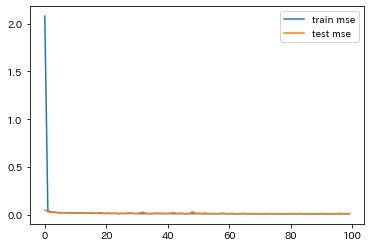

In [193]:
#結果の表示
import matplotlib.pyplot as plt #プロット用のライブラリを利用

print(model.evaluate(valid_X_nn, valid_y_nn))

train_acc = history.history['loss']
test_acc = history.history['val_loss']
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train mse')
plt.plot(x, test_acc, label = 'test mse')
plt.legend() #グラフの線の説明を表示

In [189]:
pred_y=model.predict(valid_X_nn)
score=mean_absolute_error(np.exp(valid_y_nn),np.exp(model.predict(valid_X_nn)))
print(f'MAE:{score:4f}')#standard

MAE:27.316623


In [194]:
pred_y=model.predict(valid_X_nn)
score=mean_absolute_error(np.exp(valid_y_nn),np.exp(model.predict(valid_X_nn)))
print(f'MAE:{score:4f}')#Maxmin

MAE:28.798778


# Stacking

In [110]:
import numpy as np
import pandas as pd
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
# tensorflowの警告抑制
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# xgboostによるモデル
class Model1Xgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = XGBRegressorCV(n_trials=20)
        self.model.fit(tr_x,tr_y)

    def predict(self, x):
        data = x
        pred = self.model.predict(data)
        return pred


# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd


# ---------------------------------
# スタッキング
# ----------------------------------
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# models.pyにModel1Xgb, Model1NN, Model2Linearを定義しているものとする
# 各クラスは、fitで学習し、predictで予測値の確率を出力する


# 学習データに対する「目的変数を知らない」予測値と、テストデータに対する予測値を返す関数
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test


# 1層目のモデル

model_1a =XGBRegressorCV(n_trials=20)
pred_train_1a, pred_test_1a = predict_cv(model_1a, X, y, test)

model_1b = LGBRegressorCV(n_trials=20)
pred_train_1b, pred_test_1b = predict_cv(model_1b, X, y, test)

model_1c = CatRegressor()
# pred_train_1c, pred_test_1c = predict_cv(model_1c, X, y, test)

model_1d = RFR(n_jobs=-1, random_state=2525)
pred_train_1d, pred_test_1d = predict_cv(model_1d, X, y, test)

model_1e = ensemble.BaggingRegressor()
pred_train_1e, pred_test_1e = predict_cv(model_1e, X, y, test)

# 1層目のモデルの評価
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1a))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1b))}')
# print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1c))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1d))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1e))}')

# 予測値を特徴量としてデータフレームを作成
# train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b,'pred_1c': pred_train_1c,'pred_1d': pred_train_1d,'pred_1e': pred_train_1e,})
# test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c, 'pred_1d': pred_test_1d, 'pred_1e': pred_test_1e})

train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b,'pred_1d': pred_train_1d,'pred_1e': pred_train_1e,})
test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1d': pred_test_1d, 'pred_1e': pred_test_1e})


# 2層目のモデル
# pred_train_2は、2層目のモデルの学習データのクロスバリデーションでの予測値
# pred_test_2は、2層目のモデルのテストデータの予測値
model_2 = XGBRegressorCV(n_trials=10)
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, y, test_x_2)
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2))}')

[I 2019-11-14 13:39:03,877] Finished trial#0 resulted in value: 0.8104394633624382. Current best value is 0.8104394633624382 with parameters: {'booster': 'dart', 'alpha': 0.00011293377507906297, 'max_depth': 1, 'eta': 1.7375239565875486e-06, 'gamma': 0.002536107727538811, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 3.429359361480553e-08, 'skip_drop': 8.40337847644675e-05}.
[I 2019-11-14 13:39:10,946] Finished trial#1 resulted in value: 0.8977167488379303. Current best value is 0.8977167488379303 with parameters: {'booster': 'dart', 'alpha': 0.11766977983048366, 'max_depth': 2, 'eta': 0.9939698768323555, 'gamma': 1.0874482106565069e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0013462510390446231, 'skip_drop': 4.841756376958102e-08}.
[I 2019-11-14 13:39:17,820] Finished trial#2 resulted in value: 0.897188839546426. Current best value is 0.8977167488379303 with parameters: {'booster'


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 1.7081347098828228e-07, 'max_depth': 9, 'eta': 0.001473968855146381, 'gamma': 1.2840222837324569e-08, 'grow_policy': 'depthwise'}

[13:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 13:41:50,377] Finished trial#0 resulted in value: 0.9147989375202339. Current best value is 0.9147989375202339 with parameters: {'booster': 'dart', 'alpha': 2.522710613761985e-08, 'max_depth': 3, 'eta': 7.853782514319501e-07, 'gamma': 0.7462810420806553, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.1405262268973824e-05, 'skip_drop': 0.006972112162294613}.
[I 2019-11-14 13:41:52,668] Finished trial#1 resulted in value: 0.8094670984335265. Current best value is 0.9147989375202339 with parameters: {'booster': 'dart', 'alpha': 2.522710613761985e-08, 'max_depth': 3, 'eta': 7.853782514319501e-07, 'gamma': 0.7462810420806553, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.1405262268973824e-05, 'skip_drop': 0.006972112162294613}.
[I 2019-11-14 13:42:30,408] Finished trial#2 resulted in value: 0.9577430820998559. Current best value is 0.9577430820998559 with parameters: {'booster': 


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 9.291013911791215e-07, 'max_depth': 9, 'eta': 1.0938092498145764e-08, 'gamma': 1.0298344451229732e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00022476965888723895, 'skip_drop': 2.78563232981623e-06}

[13:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 13:49:02,214] Finished trial#0 resulted in value: 0.9582943642341913. Current best value is 0.9582943642341913 with parameters: {'booster': 'gbtree', 'alpha': 0.007937757255703582, 'max_depth': 8, 'eta': 0.6089458550604848, 'gamma': 9.745546188992681e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:49:07,490] Finished trial#1 resulted in value: 0.8113971728102923. Current best value is 0.9582943642341913 with parameters: {'booster': 'gbtree', 'alpha': 0.007937757255703582, 'max_depth': 8, 'eta': 0.6089458550604848, 'gamma': 9.745546188992681e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:49:11,878] Finished trial#2 resulted in value: 0.9437453108191344. Current best value is 0.9582943642341913 with parameters: {'booster': 'gbtree', 'alpha': 0.007937757255703582, 'max_depth': 8, 'eta': 0.6089458550604848, 'gamma': 9.745546188992681e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:49:39,694] Finished trial#3 resulted in value: 0.9574243074563084. Current best value 


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.92490727409722, 'max_depth': 9, 'eta': 0.827773452051686, 'gamma': 1.566298263041189e-08, 'grow_policy': 'lossguide'}

[13:51:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 13:52:18,643] Finished trial#0 resulted in value: 0.3762911231866135. Current best value is 0.3762911231866135 with parameters: {'booster': 'dart', 'alpha': 0.002684789286762868, 'max_depth': 7, 'eta': 1.2232529549078364e-05, 'gamma': 0.006946288404052205, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0072562714149752355, 'skip_drop': 6.644049262014374e-08}.
[I 2019-11-14 13:52:23,265] Finished trial#1 resulted in value: 0.9515724459594376. Current best value is 0.9515724459594376 with parameters: {'booster': 'gbtree', 'alpha': 0.1352895421764017, 'max_depth': 5, 'eta': 0.05459793273306792, 'gamma': 0.019834097778185757, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:52:41,875] Finished trial#2 resulted in value: 0.9517218606440793. Current best value is 0.9517218606440793 with parameters: {'booster': 'dart', 'alpha': 1.1454838043842059e-07, 'max_depth': 5, 'eta': 0.001276940311196671, 'gamma': 8.18416641669354e-08, 'grow_


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 4.827876051675126e-06, 'max_depth': 9, 'eta': 3.8558869333630756e-05, 'gamma': 9.419142108230758e-05, 'grow_policy': 'depthwise'}

[13:55:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 13:55:54,744] Finished trial#0 resulted in value: 0.9523406607295953. Current best value is 0.9523406607295953 with parameters: {'iterations': 221, 'depth': 7, 'learning_rate': 0.04905339638949371, 'random_strength': 33, 'bagging_temperature': 0.025350803759247725, 'od_type': 'IncToDec', 'od_wait': 36}.
[I 2019-11-14 13:55:56,387] Finished trial#1 resulted in value: 0.9496973175618304. Current best value is 0.9523406607295953 with parameters: {'iterations': 221, 'depth': 7, 'learning_rate': 0.04905339638949371, 'random_strength': 33, 'bagging_temperature': 0.025350803759247725, 'od_type': 'IncToDec', 'od_wait': 36}.
[I 2019-11-14 13:55:57,645] Finished trial#2 resulted in value: 0.9546038832046637. Current best value is 0.9546038832046637 with parameters: {'iterations': 152, 'depth': 5, 'learning_rate': 0.35392399109871653, 'random_strength': 73, 'bagging_temperature': 13.667999574544067, 'od_type': 'IncToDec', 'od_wait': 19}.
[I 2019-11-14 13:55:58,968] Finished trial#3 


Best score: 0.96
Best params: {'iterations': 242, 'depth': 20, 'learning_rate': 0.10425563090347138, 'random_strength': 88, 'bagging_temperature': 0.47321792706407195, 'od_type': 'Iter', 'od_wait': 19}



[I 2019-11-14 13:56:31,098] Finished trial#0 resulted in value: 0.9483677432631241. Current best value is 0.9483677432631241 with parameters: {'iterations': 120, 'depth': 9, 'learning_rate': 0.5827597095042671, 'random_strength': 1, 'bagging_temperature': 0.7193638211875417, 'od_type': 'IncToDec', 'od_wait': 20}.
[I 2019-11-14 13:56:32,407] Finished trial#1 resulted in value: 0.9425280820639692. Current best value is 0.9483677432631241 with parameters: {'iterations': 120, 'depth': 9, 'learning_rate': 0.5827597095042671, 'random_strength': 1, 'bagging_temperature': 0.7193638211875417, 'od_type': 'IncToDec', 'od_wait': 20}.
[I 2019-11-14 13:56:33,692] Finished trial#2 resulted in value: 0.947051200837584. Current best value is 0.9483677432631241 with parameters: {'iterations': 120, 'depth': 9, 'learning_rate': 0.5827597095042671, 'random_strength': 1, 'bagging_temperature': 0.7193638211875417, 'od_type': 'IncToDec', 'od_wait': 20}.
[I 2019-11-14 13:56:35,288] Finished trial#3 resulted in


Best score: 0.96
Best params: {'iterations': 295, 'depth': 16, 'learning_rate': 0.12558175877778113, 'random_strength': 33, 'bagging_temperature': 0.07690959467770235, 'od_type': 'Iter', 'od_wait': 38}



[I 2019-11-14 13:57:05,006] Finished trial#0 resulted in value: 0.909016841125186. Current best value is 0.909016841125186 with parameters: {'iterations': 218, 'depth': 16, 'learning_rate': 0.022432018740070964, 'random_strength': 21, 'bagging_temperature': 21.959341871901763, 'od_type': 'IncToDec', 'od_wait': 30}.
[I 2019-11-14 13:57:06,155] Finished trial#1 resulted in value: 0.9457946240487534. Current best value is 0.9457946240487534 with parameters: {'iterations': 65, 'depth': 13, 'learning_rate': 0.6619173905107191, 'random_strength': 39, 'bagging_temperature': 0.36752771292536174, 'od_type': 'Iter', 'od_wait': 40}.
[I 2019-11-14 13:57:08,031] Finished trial#2 resulted in value: 0.9562817666984506. Current best value is 0.9562817666984506 with parameters: {'iterations': 164, 'depth': 14, 'learning_rate': 0.06782226561213528, 'random_strength': 80, 'bagging_temperature': 0.02705182517405296, 'od_type': 'IncToDec', 'od_wait': 46}.
[I 2019-11-14 13:57:10,322] Finished trial#3 result


Best score: 0.96
Best params: {'iterations': 295, 'depth': 6, 'learning_rate': 0.11834651627314778, 'random_strength': 23, 'bagging_temperature': 0.010040270381464331, 'od_type': 'Iter', 'od_wait': 18}



[I 2019-11-14 13:57:36,884] Finished trial#0 resulted in value: 0.957586531487814. Current best value is 0.957586531487814 with parameters: {'iterations': 258, 'depth': 7, 'learning_rate': 0.09182225185979917, 'random_strength': 45, 'bagging_temperature': 0.018986395758683595, 'od_type': 'IncToDec', 'od_wait': 30}.
[I 2019-11-14 13:57:38,955] Finished trial#1 resulted in value: 0.9579156148101451. Current best value is 0.9579156148101451 with parameters: {'iterations': 179, 'depth': 20, 'learning_rate': 0.113866116288114, 'random_strength': 78, 'bagging_temperature': 0.2853774794781667, 'od_type': 'Iter', 'od_wait': 31}.
[I 2019-11-14 13:57:42,070] Finished trial#2 resulted in value: 0.9581241440463589. Current best value is 0.9581241440463589 with parameters: {'iterations': 195, 'depth': 7, 'learning_rate': 0.11007907627019255, 'random_strength': 83, 'bagging_temperature': 28.02050937559946, 'od_type': 'Iter', 'od_wait': 46}.
[I 2019-11-14 13:57:44,245] Finished trial#3 resulted in va


Best score: 0.96
Best params: {'iterations': 259, 'depth': 14, 'learning_rate': 0.16194006410315853, 'random_strength': 31, 'bagging_temperature': 28.15210062871208, 'od_type': 'Iter', 'od_wait': 24}

logloss: 22.673849350217235
logloss: 23.010078141979793
logloss: 24.07142779162948
logloss: 24.006348978427717


[I 2019-11-14 13:58:38,495] Finished trial#0 resulted in value: 0.9592396587972545. Current best value is 0.9592396587972545 with parameters: {'booster': 'gbtree', 'alpha': 0.00010877696731240512, 'max_depth': 4, 'eta': 2.4555925579306898e-05, 'gamma': 1.0746215579959435e-05, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:58:42,471] Finished trial#1 resulted in value: 0.9587666144731288. Current best value is 0.9592396587972545 with parameters: {'booster': 'gbtree', 'alpha': 0.00010877696731240512, 'max_depth': 4, 'eta': 2.4555925579306898e-05, 'gamma': 1.0746215579959435e-05, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:58:50,762] Finished trial#2 resulted in value: 0.957078203508878. Current best value is 0.9592396587972545 with parameters: {'booster': 'gbtree', 'alpha': 0.00010877696731240512, 'max_depth': 4, 'eta': 2.4555925579306898e-05, 'gamma': 1.0746215579959435e-05, 'grow_policy': 'lossguide'}.
[I 2019-11-14 13:58:57,973] Finished trial#3 resulted in value: -5089.287989550269.


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.0012043193684795142, 'max_depth': 2, 'eta': 0.00023632105647706936, 'gamma': 0.0004923369814802885, 'grow_policy': 'depthwise'}

[13:59:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 14:00:07,617] Finished trial#0 resulted in value: -0.8869671573617961. Current best value is -0.8869671573617961 with parameters: {'booster': 'dart', 'alpha': 1.0820041439220917e-07, 'max_depth': 3, 'eta': 1.6837320819452125e-05, 'gamma': 1.0583830597935407e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.04354474945127543, 'skip_drop': 0.06219804405383651}.
[I 2019-11-14 14:00:11,570] Finished trial#1 resulted in value: 0.9594326723543972. Current best value is 0.9594326723543972 with parameters: {'booster': 'gbtree', 'alpha': 5.398242998708957e-08, 'max_depth': 6, 'eta': 0.07825899942811003, 'gamma': 0.0034156212591168753, 'grow_policy': 'depthwise'}.
[I 2019-11-14 14:00:13,051] Finished trial#2 resulted in value: 0.9572665912407023. Current best value is 0.9594326723543972 with parameters: {'booster': 'gbtree', 'alpha': 5.398242998708957e-08, 'max_depth': 6, 'eta': 0.07825899942811003, 'gamma': 0.0034156212591168753


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.12654543243760075, 'max_depth': 4, 'eta': 0.08482731194813795, 'gamma': 0.001179889551392233, 'grow_policy': 'depthwise'}

[14:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 14:00:58,460] Finished trial#0 resulted in value: 0.9588246792940041. Current best value is 0.9588246792940041 with parameters: {'booster': 'dart', 'alpha': 1.4172475946154874e-07, 'max_depth': 2, 'eta': 8.476295516405348e-06, 'gamma': 0.5525604587187359, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0031556974009594708, 'skip_drop': 0.00925675531405497}.
[I 2019-11-14 14:01:12,500] Finished trial#1 resulted in value: 0.9599454632952714. Current best value is 0.9599454632952714 with parameters: {'booster': 'dart', 'alpha': 0.0001404436408712232, 'max_depth': 7, 'eta': 0.004561820995651299, 'gamma': 4.548528129534597e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1825082089178602e-06, 'skip_drop': 6.6411224560372e-07}.
[I 2019-11-14 14:01:26,394] Finished trial#2 resulted in value: 0.960146147127295. Current best value is 0.960146147127295 with parameters: {'booster': 


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 6.626267269149461e-07, 'max_depth': 3, 'eta': 6.434550455512281e-06, 'gamma': 0.00013253201680758992, 'grow_policy': 'depthwise'}

[14:02:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-14 14:02:31,515] Finished trial#0 resulted in value: 0.9600693056291909. Current best value is 0.9600693056291909 with parameters: {'booster': 'dart', 'alpha': 0.017768876622902118, 'max_depth': 6, 'eta': 1.4666965079865058e-06, 'gamma': 4.347402571890859e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.8370192415018547e-07, 'skip_drop': 0.0013264684878214993}.
[I 2019-11-14 14:02:32,841] Finished trial#1 resulted in value: 0.9578682905004218. Current best value is 0.9600693056291909 with parameters: {'booster': 'dart', 'alpha': 0.017768876622902118, 'max_depth': 6, 'eta': 1.4666965079865058e-06, 'gamma': 4.347402571890859e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.8370192415018547e-07, 'skip_drop': 0.0013264684878214993}.
[I 2019-11-14 14:02:42,250] Finished trial#2 resulted in value: 0.9603634067186404. Current best value is 0.9603634067186404 with parameters: 


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.09338729887503777, 'max_depth': 4, 'eta': 0.08562497168471409, 'gamma': 9.895417479538594e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.0170331159287642e-05, 'skip_drop': 0.01949556184705827}

[14:03:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss: 22.37074458581918


In [109]:
model_1e = ensemble.BaggingRegressor()
pred_train_1e, pred_test_1e = predict_cv(model_1e, X, y, test)

In [260]:
len(pred_test_2)

9000

In [111]:
pred=np.exp(pred_test_2)

In [194]:
xgbr.fit(X, y)

pred=np.exp(xgbr.predict(test))

[I 2019-11-13 16:37:37,439] Finished trial#0 resulted in value: 0.9089870752721346. Current best value is 0.9089870752721346 with parameters: {'booster': 'dart', 'alpha': 3.5243702785803555e-08, 'max_depth': 2, 'eta': 0.020954954182432813, 'gamma': 6.6580359070594265e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.009837547444526595, 'skip_drop': 0.08231429796316754}.
[I 2019-11-13 16:37:44,656] Finished trial#1 resulted in value: 0.9585372334153813. Current best value is 0.9585372334153813 with parameters: {'booster': 'gbtree', 'alpha': 0.028931051791130723, 'max_depth': 6, 'eta': 0.00010703617500753365, 'gamma': 2.9366362160029843e-05, 'grow_policy': 'depthwise'}.
[I 2019-11-13 16:37:46,728] Finished trial#2 resulted in value: 0.8568819582609267. Current best value is 0.9585372334153813 with parameters: {'booster': 'gbtree', 'alpha': 0.028931051791130723, 'max_depth': 6, 'eta': 0.00010703617500753365, 'gamma': 2.9366362160029843e-


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.0007852505862073227, 'max_depth': 9, 'eta': 2.0328451395162648e-08, 'gamma': 1.663812571437705e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.3198421751709013e-07, 'skip_drop': 2.8456910056043334e-07}

[16:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [112]:
sub = pd.DataFrame(pd.read_csv("test_data.csv")['id'])
sub["y"] = list(pred)
sub.to_csv("submission.csv", index = False)

array([522.51654707, 265.16191919, 205.98771108, ..., 509.76707723,
       139.1592873 , 632.49789718])